In [2]:
# install the required packages
!pip install yfinance
!pip install yahoofinancials
!pip install ta
!pip install pmdarima
!pip install nbconvert
!pip install pandoc
!pip install Pyppeteer

  Created wheel for pandoc: filename=pandoc-2.2-py3-none-any.whl size=29561 sha256=041c9de9306acd00abd4b303d7c15e639a91e747e2d5e779b7b6d454ae9a7fb2
  Stored in directory: c:\users\shash\appdata\local\pip\cache\wheels\2d\da\b1\54ff0401ef9b07b60c7fc9cffe616f243cf27dc3d04bd5d5ef
Successfully built pandoc


# import packages

In [2]:
# import packages
import pandas as pd
import yfinance as yf
from yahoofinancials import YahooFinancials
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.tools import diff
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
# Load specific forecasting tools
from statsmodels.tsa.arima_model import ARIMA,ARIMAResults
#var model
from statsmodels.tsa.vector_ar.var_model import VAR
import pmdarima as pm
from statsmodels.tools.eval_measures import rmse #evaluation metric
from statsmodels.tsa.ar_model import AR, ARResults #for our model
from sklearn.metrics import mean_squared_error as MSE

# load data for 5 companies of Motors industry Maruti, Tata, Hero , TVS, Bajaj    Also load data for external variables INR to USD , S&P500, Nifty

In [3]:
# load data
maruti_df = yf.download('MARUTI.NS', 
                          start='2016-12-31', end="2022-04-29",
                          progress=False)
maruti_df.sort_index(ascending=False, inplace=True)
tatam_df = yf.download('TATAMOTORS.NS', 
                          start='2016-12-31', end="2022-04-29",
                          progress=False)
tatam_df.sort_index(ascending=False, inplace=True)
herom_df = yf.download('HEROMOTOCO.NS', 
                          start='2016-12-31', end="2022-04-29",
                          progress=False)
herom_df.sort_index(ascending=False, inplace=True)
tvsm_df = yf.download('TVSMOTOR.NS', 
                          start='2016-12-31', end="2022-04-29",
                          progress=False)
tvsm_df.sort_index(ascending=False, inplace=True)
bajajm_df = yf.download('BAJAJ-AUTO.NS', 
                          start='2016-12-31', end="2022-04-29",
                          progress=False)
bajajm_df.sort_index(ascending=False, inplace=True)

inrusd_df = yf.download('INR=X', 
                          start='2016-12-31', end="2022-04-29",
                          progress=False)
inrusd_df.sort_index(ascending=False, inplace=True)
sp500_df = yf.download('^GSPC', 
                          start='2016-12-31', end="2022-04-29",
                          progress=False)
sp500_df.sort_index(ascending=False, inplace=True)
nifty_df = yf.download('^NSEI', 
                          start='2016-12-31', end="2022-04-29",
                          progress=False)
nifty_df.sort_index(ascending=False, inplace=True)

In [4]:
# view dataframe shape
print('\n',maruti_df.shape)

print('\n',tatam_df.shape)

print('\n',herom_df.shape)

print('\n',tvsm_df.shape)

print('\n',bajajm_df.shape)

print('\n',inrusd_df.shape)

print('\n',sp500_df.shape)

print('\n',nifty_df.shape)


 (1315, 6)

 (1315, 6)

 (1315, 6)

 (1315, 6)

 (1315, 6)

 (1387, 6)

 (1341, 6)

 (1311, 6)


# create returns

In [5]:
# compute return
maruti_df["Return"] = maruti_df["Adj Close"].pct_change(1)
maruti_df["Return"]
tatam_df["Return"] = tatam_df["Adj Close"].pct_change(1)
tatam_df["Return"]
herom_df["Return"] = herom_df["Adj Close"].pct_change(1)
herom_df["Return"]
tvsm_df["Return"] = tvsm_df["Adj Close"].pct_change(1)
tvsm_df["Return"]
bajajm_df["Return"] = bajajm_df["Adj Close"].pct_change(1)
bajajm_df["Return"]
inrusd_df["Return"] = inrusd_df["Adj Close"].pct_change(1)
inrusd_df["Return"]
sp500_df["Return"] = sp500_df["Adj Close"].pct_change(1)
sp500_df["Return"]
nifty_df["Return"] = nifty_df["Adj Close"].pct_change(1)
nifty_df["Return"]

Date
2022-04-28         NaN
2022-04-27   -0.011983
2022-04-26    0.009531
2022-04-25   -0.014351
2022-04-22    0.012858
                ...   
2017-01-06    0.000941
2017-01-05    0.003639
2017-01-04   -0.010068
2017-01-03    0.000214
2017-01-02   -0.001556
Name: Return, Length: 1311, dtype: float64

In [6]:
#inrusd_df["Return"] = inrusd_df["Return"].abs()

# data information

In [7]:
# view dataframe info()
maruti_df.info()
print('\n')
tatam_df.info()
print('\n')
herom_df.info()
print('\n')
tvsm_df.info()
print('\n')
bajajm_df.info()
print('\n')
inrusd_df.info()
print('\n')
sp500_df.info()
print('\n')
nifty_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1315 entries, 2022-04-28 to 2017-01-02
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1315 non-null   float64
 1   High       1315 non-null   float64
 2   Low        1315 non-null   float64
 3   Close      1315 non-null   float64
 4   Adj Close  1315 non-null   float64
 5   Volume     1315 non-null   int64  
 6   Return     1314 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 82.2 KB


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1315 entries, 2022-04-28 to 2017-01-02
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1315 non-null   float64
 1   High       1315 non-null   float64
 2   Low        1315 non-null   float64
 3   Close      1315 non-null   float64
 4   Adj Close  1315 non-null   float64
 5   Volume     1315 non-null   int64  
 6   Return     131

# dropping null/nan

In [8]:
maruti_df.isnull().sum()
maruti_df = maruti_df.dropna()
print('\n')
maruti_df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Return       0
dtype: int64

In [9]:
tatam_df.isnull().sum()
tatam_df = tatam_df.dropna()
print('\n')
tatam_df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Return       0
dtype: int64

In [10]:
herom_df.isnull().sum()
herom_df = herom_df.dropna()
print('\n')
herom_df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Return       0
dtype: int64

In [11]:
tvsm_df.isnull().sum()
tvsm_df = tvsm_df.dropna()
print('\n')
tvsm_df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Return       0
dtype: int64

In [12]:
bajajm_df.isnull().sum()
bajajm_df = bajajm_df.dropna()
print('\n')
bajajm_df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Return       0
dtype: int64

In [13]:
inrusd_df.isnull().sum()
inrusd_df = inrusd_df.dropna()
print('\n')
inrusd_df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Return       0
dtype: int64

In [14]:
sp500_df.isnull().sum()
sp500_df = sp500_df.dropna()
print('\n')
sp500_df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Return       0
dtype: int64

In [15]:
nifty_df.isnull().sum()
nifty_df = nifty_df.dropna()
print('\n')
nifty_df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Return       0
dtype: int64

# data information

In [16]:
# view dataframe head
print('\n',maruti_df.head)

print('\n',tatam_df.head)

print('\n',herom_df.head)

print('\n',tvsm_df.head)

print('\n',bajajm_df.head)

print('\n',inrusd_df.head)

print('\n',sp500_df.head)

print('\n',nifty_df.head)


 <bound method NDFrame.head of                    Open         High          Low        Close    Adj Close  \
Date                                                                          
2022-04-27  7851.000000  7865.000000  7720.000000  7788.399902  7788.399902   
2022-04-26  8000.000000  8067.500000  7830.000000  7906.750000  7906.750000   
2022-04-25  7810.000000  7998.000000  7810.000000  7912.350098  7912.350098   
2022-04-22  7789.000000  8016.649902  7731.000000  7904.500000  7904.500000   
2022-04-21  7709.799805  7899.799805  7686.049805  7879.200195  7879.200195   
...                 ...          ...          ...          ...          ...   
2017-01-06  5650.000000  5657.299805  5597.000000  5615.549805  5305.674316   
2017-01-05  5525.100098  5649.899902  5525.100098  5634.950195  5324.004395   
2017-01-04  5530.000000  5554.700195  5494.000000  5502.149902  5198.532227   
2017-01-03  5466.000000  5524.200195  5432.600098  5508.399902  5204.437500   
2017-01-02  5320.049

In [17]:
# view dataframe shape
print('\n',maruti_df.shape)

print('\n',tatam_df.shape)

print('\n',herom_df.shape)

print('\n',tvsm_df.shape)

print('\n',bajajm_df.shape)

print('\n',inrusd_df.shape)

print('\n',sp500_df.shape)

print('\n',nifty_df.shape)


 (1314, 7)

 (1314, 7)

 (1314, 7)

 (1314, 7)

 (1314, 7)

 (1386, 7)

 (1340, 7)

 (1310, 7)


# correlation

In [18]:
# view dataframe corr()
maruti_df.corr()

,Open,High,Low,Close,Adj Close,Volume,Return
Open,1.000000,0.996316,0.996773,0.993226,0.983624,-0.424590,0.064589
High,0.996316,1.000000,0.995204,0.997439,0.989622,-0.385720,0.065406
Low,0.996773,0.995204,1.000000,0.996622,0.985720,-0.443799,0.060043
Close,0.993226,0.997439,0.996622,1.000000,0.990511,-0.409529,0.061620
Adj Close,0.983624,0.989622,0.985720,0.990511,1.000000,-0.369754,0.066362
Volume,-0.424590,-0.385720,-0.443799,-0.409529,-0.369754,1.000000,-0.017948
Return,0.064589,0.065406,0.060043,0.061620,0.066362,-0.017948,1.000000


In [19]:
tatam_df.corr()

,Open,High,Low,Close,Adj Close,Volume,Return
Open,1.000000,0.999419,0.999339,0.998823,0.998823,-0.385531,0.021952
High,0.999419,1.000000,0.999217,0.999553,0.999553,-0.370957,0.022382
Low,0.999339,0.999217,1.000000,0.999483,0.999483,-0.391483,0.022932
Close,0.998823,0.999553,0.999483,1.000000,1.000000,-0.378324,0.022857
Adj Close,0.998823,0.999553,0.999483,1.000000,1.000000,-0.378324,0.022857
Volume,-0.385531,-0.370957,-0.391483,-0.378324,-0.378324,1.000000,-0.012779
Return,0.021952,0.022382,0.022932,0.022857,0.022857,-0.012779,1.000000


In [20]:
herom_df.corr()

,Open,High,Low,Close,Adj Close,Volume,Return
Open,1.000000,0.997598,0.997607,0.995225,0.949821,-0.402127,0.036928
High,0.997598,1.000000,0.996860,0.998040,0.953271,-0.376449,0.039739
Low,0.997607,0.996860,1.000000,0.997886,0.952555,-0.412347,0.037506
Close,0.995225,0.998040,0.997886,1.000000,0.954670,-0.390704,0.040290
Adj Close,0.949821,0.953271,0.952555,0.954670,1.000000,-0.286400,0.053887
Volume,-0.402127,-0.376449,-0.412347,-0.390704,-0.286400,1.000000,-0.033965
Return,0.036928,0.039739,0.037506,0.040290,0.053887,-0.033965,1.000000


In [21]:
tvsm_df.corr()

,Open,High,Low,Close,Adj Close,Volume,Return
Open,1.000000,0.997304,0.997489,0.995206,0.994001,-0.127384,0.048223
High,0.997304,1.000000,0.996756,0.998151,0.997197,-0.092493,0.049941
Low,0.997489,0.996756,1.000000,0.997629,0.996105,-0.134849,0.045921
Close,0.995206,0.998151,0.997629,1.000000,0.998648,-0.110786,0.049028
Adj Close,0.994001,0.997197,0.996105,0.998648,1.000000,-0.098167,0.049190
Volume,-0.127384,-0.092493,-0.134849,-0.110786,-0.098167,1.000000,0.018585
Return,0.048223,0.049941,0.045921,0.049028,0.049190,0.018585,1.000000


In [22]:
bajajm_df.corr()

,Open,High,Low,Close,Adj Close,Volume,Return
Open,1.000000,0.996452,0.997133,0.994083,0.970229,-0.017289,0.047104
High,0.996452,1.000000,0.995426,0.997111,0.976204,0.022611,0.048137
Low,0.997133,0.995426,1.000000,0.997193,0.970055,-0.034388,0.046735
Close,0.994083,0.997111,0.997193,1.000000,0.975415,-0.004172,0.048997
Adj Close,0.970229,0.976204,0.970055,0.975415,1.000000,0.057963,0.039314
Volume,-0.017289,0.022611,-0.034388,-0.004172,0.057963,1.000000,0.034924
Return,0.047104,0.048137,0.046735,0.048997,0.039314,0.034924,1.000000


In [23]:
inrusd_df.corr()

,Open,High,Low,Close,Adj Close,Volume,Return
Open,1.000000,0.998485,0.998533,0.999353,0.999353,NaN,0.025878
High,0.998485,1.000000,0.997848,0.998433,0.998433,NaN,-0.003266
Low,0.998533,0.997848,1.000000,0.998442,0.998442,NaN,-0.000462
Close,0.999353,0.998433,0.998442,1.000000,1.000000,NaN,0.032874
Adj Close,0.999353,0.998433,0.998442,1.000000,1.000000,NaN,0.032874
Volume,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Return,0.025878,-0.003266,-0.000462,0.032874,0.032874,NaN,1.000000


In [24]:
sp500_df.corr()

,Open,High,Low,Close,Adj Close,Volume,Return
Open,1.000000,0.999692,0.999482,0.999191,0.999191,-0.005402,0.020865
High,0.999692,1.000000,0.999253,0.999512,0.999512,0.003188,0.022808
Low,0.999482,0.999253,1.000000,0.999574,0.999574,-0.020302,0.022111
Close,0.999191,0.999512,0.999574,1.000000,1.000000,-0.009557,0.026536
Adj Close,0.999191,0.999512,0.999574,1.000000,1.000000,-0.009557,0.026536
Volume,-0.005402,0.003188,-0.020302,-0.009557,-0.009557,1.000000,0.021872
Return,0.020865,0.022808,0.022111,0.026536,0.026536,0.021872,1.000000


In [25]:
nifty_df.corr()

,Open,High,Low,Close,Adj Close,Volume,Return
Open,1.000000,0.999635,0.999527,0.999186,0.999186,0.022599,0.020379
High,0.999635,1.000000,0.999300,0.999613,0.999613,0.030123,0.021284
Low,0.999527,0.999300,1.000000,0.999569,0.999569,0.012341,0.019606
Close,0.999186,0.999613,0.999569,1.000000,1.000000,0.021544,0.021774
Adj Close,0.999186,0.999613,0.999569,1.000000,1.000000,0.021544,0.021774
Volume,0.022599,0.030123,0.012341,0.021544,0.021544,1.000000,0.054451
Return,0.020379,0.021284,0.019606,0.021774,0.021774,0.054451,1.000000


In [26]:
# view dataframe describe()
maruti_df.describe()

,Open,High,Low,Close,Adj Close,Volume,Return
count,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1.314000e+03,1314.000000
mean,7289.275540,7370.810359,7197.766311,7280.914309,7098.104908,8.430295e+05,-0.000127
std,1056.347321,1049.335999,1058.713085,1050.186562,993.746896,5.539620e+05,0.019831
min,4150.000000,4267.000000,4001.100098,4011.500000,3950.550049,4.703300e+04,-0.119058
25%,6717.375000,6800.387451,6639.474854,6716.174805,6576.893066,4.571290e+05,-0.009315
50%,7200.000000,7277.250000,7113.725098,7199.500000,7064.490967,6.866855e+05,0.000110
75%,7802.250000,7898.962524,7711.450073,7794.887451,7647.341675,1.048214e+06,0.008688
max,9966.000000,9996.400391,9725.000000,9832.450195,9382.803711,4.892962e+06,0.203502


In [27]:
tatam_df.describe()

,Open,High,Low,Close,Adj Close,Volume,Return
count,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1.314000e+03,1314.000000
mean,286.265791,290.506279,281.312139,285.536415,285.536415,3.418936e+07,0.000536
std,134.315312,135.411593,132.746252,133.934947,133.934947,3.719566e+07,0.030052
min,66.500000,66.900002,63.500000,65.300003,65.300003,1.154721e+06,-0.169757
25%,169.912495,172.237499,166.562504,169.249996,169.249996,9.689098e+06,-0.012827
50%,290.449997,296.375000,285.625000,289.425003,289.425003,2.153205e+07,0.000000
75%,421.987503,424.862495,414.937500,419.600006,419.600006,4.632306e+07,0.014282
max,549.000000,552.000000,541.549988,548.900024,548.900024,3.905778e+08,0.213338


In [28]:
herom_df.describe()

,Open,High,Low,Close,Adj Close,Volume,Return
count,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1.314000e+03,1314.000000
mean,2986.475835,3020.225715,2945.586118,2981.106240,2743.955717,7.902101e+05,0.000195
std,507.732663,504.841991,508.416132,505.637647,385.711821,6.681608e+05,0.019155
min,1560.000000,1623.000000,1475.000000,1553.500000,1498.791016,2.421700e+04,-0.115495
25%,2632.750000,2670.000000,2593.300049,2628.375061,2451.869507,3.473295e+05,-0.009298
50%,2921.500000,2954.574951,2892.099976,2917.199951,2754.161743,5.815755e+05,0.000101
75%,3382.000000,3430.624939,3340.712524,3376.849976,3070.653259,1.010761e+06,0.009173
max,4084.000000,4091.949951,3995.000000,4048.949951,3498.810547,5.531848e+06,0.123577


In [29]:
tvsm_df.describe()

,Open,High,Low,Close,Adj Close,Volume,Return
count,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1.314000e+03,1314.000000
mean,531.993950,539.976295,523.201559,531.502930,521.543037,1.981725e+06,-0.000268
std,107.071390,107.182732,106.199591,106.365845,104.405213,2.343787e+06,0.021308
min,254.000000,277.950012,240.100006,252.949997,249.958893,6.567800e+04,-0.123103
25%,454.437508,461.500000,447.037498,453.599998,445.822144,8.957102e+05,-0.011296
50%,537.000000,544.825012,528.799988,536.875000,525.560486,1.441816e+06,0.000194
75%,613.000000,623.187500,605.612518,612.662506,606.677414,2.271628e+06,0.010462
max,786.000000,813.950012,777.000000,785.049988,762.771851,3.966339e+07,0.146220


In [30]:
bajajm_df.describe()

,Open,High,Low,Close,Adj Close,Volume,Return
count,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1.314000e+03,1314.000000
mean,3107.686829,3143.462358,3069.782884,3105.091134,2900.035100,5.276227e+05,-0.000264
std,438.025035,439.717606,437.228576,437.550588,508.238855,4.798168e+05,0.016731
min,1917.000000,1989.000000,1788.650024,1935.550049,1870.850708,2.070700e+04,-0.108024
25%,2810.000000,2834.000000,2777.162537,2808.512512,2501.093018,2.735392e+05,-0.008130
50%,2991.900024,3025.000000,2952.325073,2986.299927,2757.081055,3.984690e+05,-0.000422
75%,3308.937500,3344.400024,3274.262512,3302.924988,3200.287537,6.466100e+05,0.007498
max,4294.299805,4361.399902,4242.000000,4295.049805,4151.479980,8.537143e+06,0.158482


In [31]:
inrusd_df.describe()

,Open,High,Low,Close,Adj Close,Volume,Return
count,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.0,1386.000000
mean,70.734505,70.963659,70.511432,70.756435,70.756435,0.0,-0.000076
std,3.954999,3.998307,3.893105,3.951854,3.951854,0.0,0.004280
min,63.264999,63.419998,63.209999,63.264999,63.264999,0.0,-0.028942
25%,67.726749,67.989998,67.462000,67.823250,67.823250,0.0,-0.002219
50%,71.412502,71.611752,71.192501,71.456249,71.456249,0.0,0.000095
75%,74.136774,74.348352,73.858328,74.150274,74.150274,0.0,0.002285
max,77.684998,77.754997,76.730003,77.570000,77.570000,0.0,0.018889


In [32]:
sp500_df.describe()

,Open,High,Low,Close,Adj Close,Volume,Return
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1.340000e+03,1340.000000
mean,3199.476163,3216.168723,3181.014635,3199.700603,3199.700603,3.865628e+09,-0.000409
std,717.918616,722.322617,713.158208,717.878923,717.878923,1.045346e+09,0.012358
min,2251.570068,2253.580078,2191.860107,2237.399902,2237.399902,1.296540e+09,-0.085779
25%,2676.542419,2687.367432,2655.717407,2673.244934,2673.244934,3.246618e+09,-0.005779
50%,2918.505005,2931.284912,2904.165039,2919.385010,2919.385010,3.603725e+09,-0.000854
75%,3715.834900,3738.500061,3694.357605,3716.299988,3716.299988,4.126490e+09,0.003220
max,4804.509766,4818.620117,4780.040039,4796.560059,4796.560059,9.878040e+09,0.136158


In [33]:
nifty_df.describe()

,Open,High,Low,Close,Adj Close,Volume,Return
count,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1.310000e+03,1310.000000
mean,12133.921570,12192.718780,12050.307810,12123.701489,12123.701489,3.956119e+05,-0.000500
std,2679.196219,2690.034323,2660.239842,2677.663822,2677.663822,2.283810e+05,0.011868
min,7735.149902,8036.950195,7511.100098,7610.250000,7610.250000,0.000000e+00,-0.080571
25%,10348.475098,10397.624756,10294.700195,10344.862305,10344.862305,2.256250e+05,-0.006574
50%,11256.000000,11306.500000,11143.924805,11224.975098,11224.975098,3.277000e+05,-0.000987
75%,13813.962891,13949.699707,13703.324951,13859.287598,13859.287598,5.429500e+05,0.004529
max,18602.349609,18604.449219,18445.300781,18477.050781,18477.050781,1.811000e+06,0.149167


# skewness - All are mostly positively skewed except INR which is negative, also S&P and Nifty are highly skewed

In [34]:
# view dataframe skew()
maruti_df['Return'].skew()

0.7061963680958456

In [35]:
tatam_df['Return'].skew()

0.12847950516697731

In [36]:
herom_df['Return'].skew()

0.1167251297369347

In [37]:
tvsm_df['Return'].skew()

0.011726077034464748

In [38]:
bajajm_df['Return'].skew()

0.6141305933281275

In [39]:
inrusd_df['Return'].skew()

-0.43449787132682754

In [40]:
sp500_df['Return'].skew()

1.4502371907223053

In [41]:
nifty_df['Return'].skew()

2.0901327028087078

# kurtosis - All have high to very high kurtosis

In [42]:
# view dataframe kurt()
maruti_df['Return'].kurt()

13.332901038733556

In [43]:
tatam_df['Return'].kurt()

6.601058302429247

In [44]:
herom_df['Return'].kurt()

5.590173750031242

In [45]:
tvsm_df['Return'].kurt()

4.46361394362608

In [46]:
bajajm_df['Return'].kurt()

11.677654098737214

In [47]:
inrusd_df['Return'].kurt()

3.913567817830498

In [48]:
sp500_df['Return'].kurt()

22.131496057456562

In [49]:
nifty_df['Return'].kurt()

27.52381133608142

# Plots - Count, KDE, for Return values

# Maruti

# countplot 

<AxesSubplot:xlabel='Return', ylabel='count'>

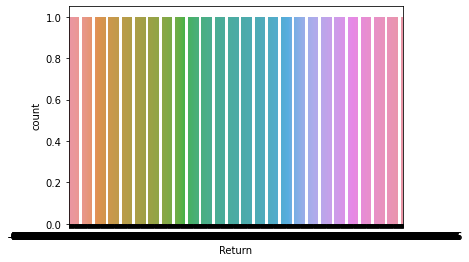

In [50]:
sns.countplot(maruti_df['Return'])

# kdeplot

<AxesSubplot:xlabel='Return', ylabel='Density'>

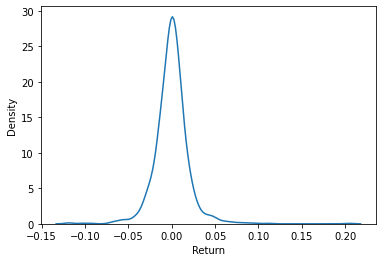

In [51]:
sns.kdeplot(maruti_df['Return'])

# plot for return

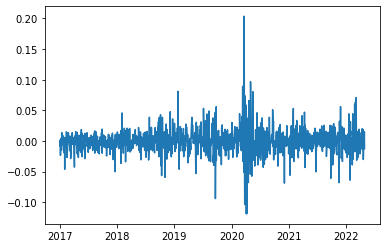

In [52]:
# matplotlib.rcParams["figure.dpi"] = 250
plt.plot(maruti_df['Return'])

# TATA Motors

<AxesSubplot:xlabel='Return', ylabel='count'>

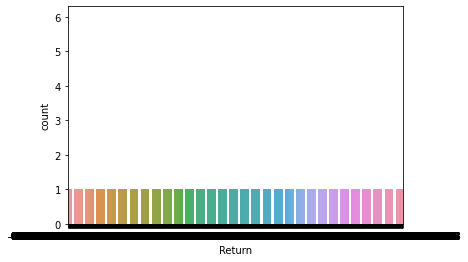

In [53]:
sns.countplot(tatam_df['Return'])

<AxesSubplot:xlabel='Return', ylabel='Density'>

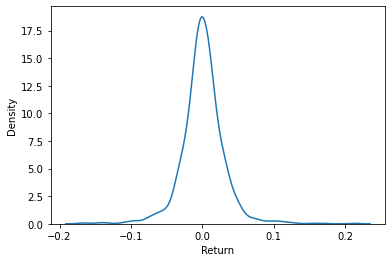

In [54]:
sns.kdeplot(tatam_df['Return'])

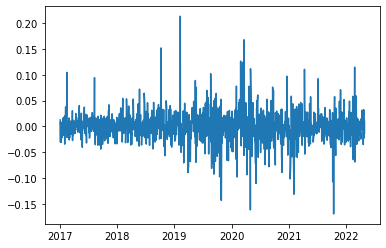

In [55]:
plt.plot(tatam_df['Return'])

# Hero Motors

<AxesSubplot:xlabel='Return', ylabel='count'>

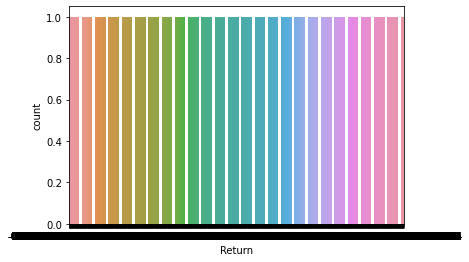

In [56]:
sns.countplot(herom_df['Return'])

<AxesSubplot:xlabel='Return', ylabel='Density'>

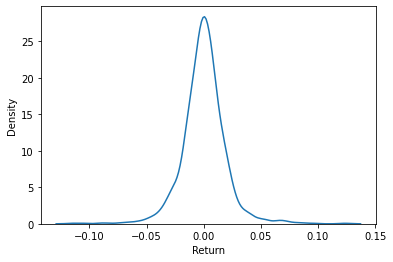

In [57]:
sns.kdeplot(herom_df['Return'])

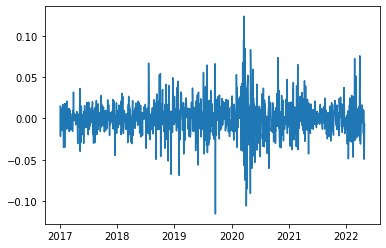

In [58]:
plt.plot(herom_df['Return'])

# TVS Motor

<AxesSubplot:xlabel='Return', ylabel='count'>

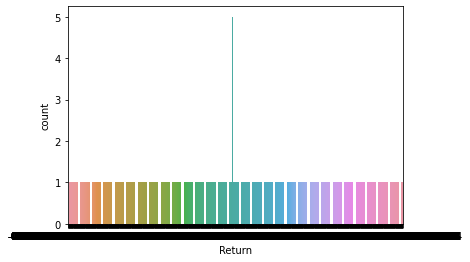

In [59]:
sns.countplot(tvsm_df['Return'])

<AxesSubplot:xlabel='Return', ylabel='Density'>

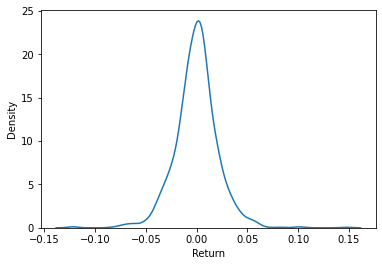

In [60]:
sns.kdeplot(tvsm_df['Return'])

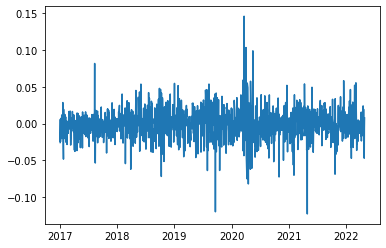

In [61]:
plt.plot(tvsm_df['Return'])

# Bajaj Motors

<AxesSubplot:xlabel='Return', ylabel='count'>

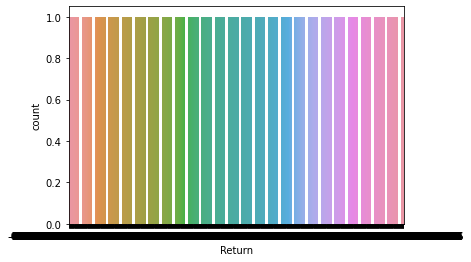

In [62]:
sns.countplot(bajajm_df['Return'])

<AxesSubplot:xlabel='Return', ylabel='Density'>

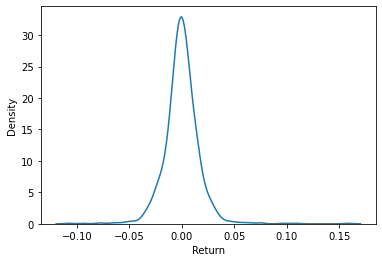

In [63]:
sns.kdeplot(bajajm_df['Return'])

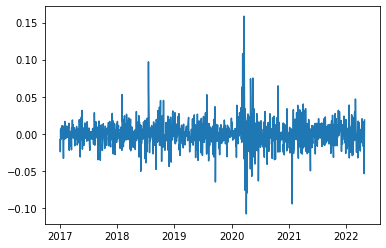

In [64]:
plt.plot(bajajm_df['Return'])

# INRUSD

<AxesSubplot:xlabel='Return', ylabel='count'>

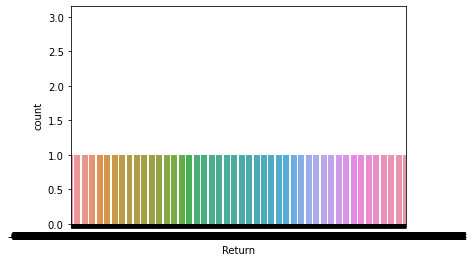

In [65]:
sns.countplot(inrusd_df['Return'])

<AxesSubplot:xlabel='Return', ylabel='Density'>

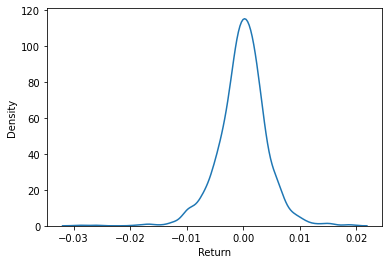

In [66]:
sns.kdeplot(inrusd_df['Return'])

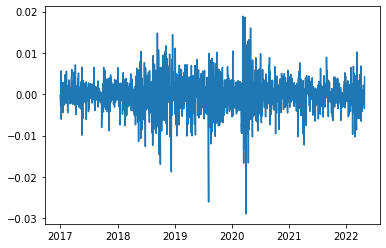

In [67]:
plt.plot(inrusd_df['Return'])

# S&P500

<AxesSubplot:xlabel='Return', ylabel='count'>

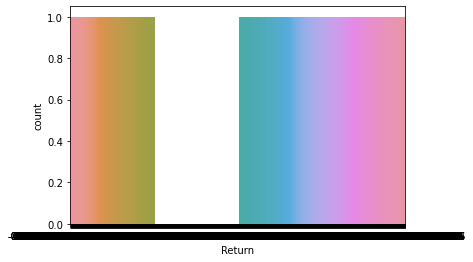

In [68]:
sns.countplot(sp500_df['Return'])

<AxesSubplot:xlabel='Return', ylabel='Density'>

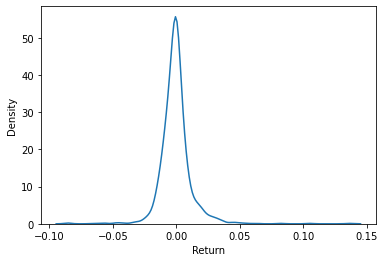

In [69]:
sns.kdeplot(sp500_df['Return'])

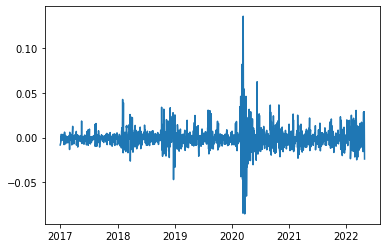

In [70]:
plt.plot(sp500_df['Return'])

# Nifty

<AxesSubplot:xlabel='Return', ylabel='count'>

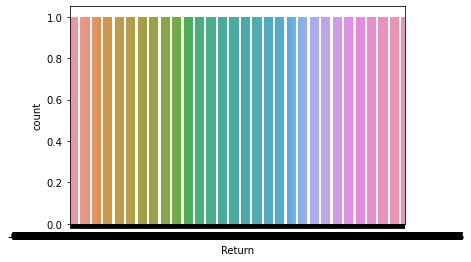

In [71]:
sns.countplot(nifty_df['Return'])

<AxesSubplot:xlabel='Return', ylabel='Density'>

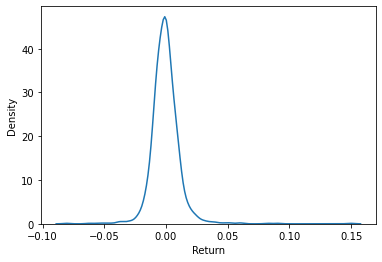

In [72]:
sns.kdeplot(nifty_df['Return'])

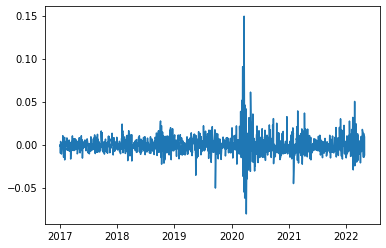

In [73]:
plt.plot(nifty_df['Return'])

In [74]:
# compute log-return and add it as a column in the dataframe
#maruti_df["Return"] = np.log(maruti_df["Adj Close"]) - np.log(maruti_df["Adj Close"].shift(1))
#maruti_df.head()

# Tests of Normality - States Data is not normal for all, Reject H0

In [75]:
# Tests of Normality

# Jarque–Bera Test
from scipy.stats import jarque_bera
statistic = jarque_bera(maruti_df["Return"])
print(statistic)

Jarque_beraResult(statistic=9761.18642122673, pvalue=0.0)


In [76]:
# Jarque–Bera Test
from scipy.stats import jarque_bera
statistic = jarque_bera(tatam_df["Return"])
print(statistic)

Jarque_beraResult(statistic=2367.895313149132, pvalue=0.0)


In [77]:
# Jarque–Bera Test
from scipy.stats import jarque_bera
statistic = jarque_bera(herom_df["Return"])
print(statistic)

Jarque_beraResult(statistic=1698.153370715763, pvalue=0.0)


In [78]:
# Jarque–Bera Test
from scipy.stats import jarque_bera
statistic = jarque_bera(tvsm_df["Return"])
print(statistic)

Jarque_beraResult(statistic=1080.3633047426288, pvalue=0.0)


In [79]:
# Jarque–Bera Test
from scipy.stats import jarque_bera
statistic = jarque_bera(bajajm_df["Return"])
print(statistic)

Jarque_beraResult(statistic=7486.072580568967, pvalue=0.0)


In [80]:
# Jarque–Bera Test
from scipy.stats import jarque_bera
statistic = jarque_bera(inrusd_df["Return"])
print(statistic)

Jarque_beraResult(statistic=919.7045163567144, pvalue=0.0)


In [81]:
# Jarque–Bera Test
from scipy.stats import jarque_bera
statistic = jarque_bera(sp500_df["Return"])
print(statistic)

Jarque_beraResult(statistic=27601.494649564618, pvalue=0.0)


In [82]:
# Jarque–Bera Test
from scipy.stats import jarque_bera
statistic = jarque_bera(nifty_df["Return"])
print(statistic)

Jarque_beraResult(statistic=41973.38990870251, pvalue=0.0)


# Maruti

In [83]:
# Anderson-Darling Normality Test
from scipy.stats import anderson
statistic = anderson(maruti_df["Return"])
print(statistic)
print('Statistic: %.3f' % statistic.statistic)
for i in range(len(statistic.critical_values)):
	sl, cv = statistic.significance_level[i], statistic.critical_values[i]
	if statistic.statistic < statistic.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

AndersonResult(statistic=25.16917382972042, critical_values=array([0.574, 0.654, 0.785, 0.915, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Statistic: 25.169
15.000: 0.574, data does not look normal (reject H0)
10.000: 0.654, data does not look normal (reject H0)
5.000: 0.785, data does not look normal (reject H0)
2.500: 0.915, data does not look normal (reject H0)
1.000: 1.089, data does not look normal (reject H0)


# Tata M

In [84]:
# Anderson-Darling Normality Test
from scipy.stats import anderson
statistic = anderson(tatam_df["Return"])
print(statistic)
print(statistic)
print('Statistic: %.3f' % statistic.statistic)
for i in range(len(statistic.critical_values)):
	sl, cv = statistic.significance_level[i], statistic.critical_values[i]
	if statistic.statistic < statistic.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

AndersonResult(statistic=20.871825732163643, critical_values=array([0.574, 0.654, 0.785, 0.915, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
AndersonResult(statistic=20.871825732163643, critical_values=array([0.574, 0.654, 0.785, 0.915, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Statistic: 20.872
15.000: 0.574, data does not look normal (reject H0)
10.000: 0.654, data does not look normal (reject H0)
5.000: 0.785, data does not look normal (reject H0)
2.500: 0.915, data does not look normal (reject H0)
1.000: 1.089, data does not look normal (reject H0)


# Hero M

In [85]:
# Anderson-Darling Normality Test
from scipy.stats import anderson
statistic = anderson(herom_df["Return"])
print(statistic)
print(statistic)
print('Statistic: %.3f' % statistic.statistic)
for i in range(len(statistic.critical_values)):
	sl, cv = statistic.significance_level[i], statistic.critical_values[i]
	if statistic.statistic < statistic.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

AndersonResult(statistic=17.417842024911124, critical_values=array([0.574, 0.654, 0.785, 0.915, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
AndersonResult(statistic=17.417842024911124, critical_values=array([0.574, 0.654, 0.785, 0.915, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Statistic: 17.418
15.000: 0.574, data does not look normal (reject H0)
10.000: 0.654, data does not look normal (reject H0)
5.000: 0.785, data does not look normal (reject H0)
2.500: 0.915, data does not look normal (reject H0)
1.000: 1.089, data does not look normal (reject H0)


# TVS

In [86]:
# Anderson-Darling Normality Test
from scipy.stats import anderson
statistic = anderson(tvsm_df["Return"])
print(statistic)
print(statistic)
print('Statistic: %.3f' % statistic.statistic)
for i in range(len(statistic.critical_values)):
	sl, cv = statistic.significance_level[i], statistic.critical_values[i]
	if statistic.statistic < statistic.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

AndersonResult(statistic=9.410523923455912, critical_values=array([0.574, 0.654, 0.785, 0.915, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
AndersonResult(statistic=9.410523923455912, critical_values=array([0.574, 0.654, 0.785, 0.915, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Statistic: 9.411
15.000: 0.574, data does not look normal (reject H0)
10.000: 0.654, data does not look normal (reject H0)
5.000: 0.785, data does not look normal (reject H0)
2.500: 0.915, data does not look normal (reject H0)
1.000: 1.089, data does not look normal (reject H0)


# Bajaj M

In [87]:
# Anderson-Darling Normality Test
from scipy.stats import anderson
statistic = anderson(bajajm_df["Return"])
print(statistic)
print(statistic)
print('Statistic: %.3f' % statistic.statistic)
for i in range(len(statistic.critical_values)):
	sl, cv = statistic.significance_level[i], statistic.critical_values[i]
	if statistic.statistic < statistic.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

AndersonResult(statistic=18.385853510974357, critical_values=array([0.574, 0.654, 0.785, 0.915, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
AndersonResult(statistic=18.385853510974357, critical_values=array([0.574, 0.654, 0.785, 0.915, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Statistic: 18.386
15.000: 0.574, data does not look normal (reject H0)
10.000: 0.654, data does not look normal (reject H0)
5.000: 0.785, data does not look normal (reject H0)
2.500: 0.915, data does not look normal (reject H0)
1.000: 1.089, data does not look normal (reject H0)


# INR USD

In [88]:
# Anderson-Darling Normality Test
from scipy.stats import anderson
statistic = anderson(inrusd_df["Return"])
print(statistic)
print(statistic)
print('Statistic: %.3f' % statistic.statistic)
for i in range(len(statistic.critical_values)):
	sl, cv = statistic.significance_level[i], statistic.critical_values[i]
	if statistic.statistic < statistic.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

AndersonResult(statistic=9.79276048161546, critical_values=array([0.574, 0.654, 0.785, 0.915, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
AndersonResult(statistic=9.79276048161546, critical_values=array([0.574, 0.654, 0.785, 0.915, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Statistic: 9.793
15.000: 0.574, data does not look normal (reject H0)
10.000: 0.654, data does not look normal (reject H0)
5.000: 0.785, data does not look normal (reject H0)
2.500: 0.915, data does not look normal (reject H0)
1.000: 1.089, data does not look normal (reject H0)


# S&P500

In [89]:
# Anderson-Darling Normality Test
from scipy.stats import anderson
statistic = anderson(sp500_df["Return"])
print(statistic)
print(statistic)
print('Statistic: %.3f' % statistic.statistic)
for i in range(len(statistic.critical_values)):
	sl, cv = statistic.significance_level[i], statistic.critical_values[i]
	if statistic.statistic < statistic.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

AndersonResult(statistic=48.87966947468067, critical_values=array([0.574, 0.654, 0.785, 0.915, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
AndersonResult(statistic=48.87966947468067, critical_values=array([0.574, 0.654, 0.785, 0.915, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Statistic: 48.880
15.000: 0.574, data does not look normal (reject H0)
10.000: 0.654, data does not look normal (reject H0)
5.000: 0.785, data does not look normal (reject H0)
2.500: 0.915, data does not look normal (reject H0)
1.000: 1.089, data does not look normal (reject H0)


# Nifty

In [90]:
# Anderson-Darling Normality Test
from scipy.stats import anderson
statistic = anderson(nifty_df["Return"])
print(statistic)
print(statistic)
print('Statistic: %.3f' % statistic.statistic)
for i in range(len(statistic.critical_values)):
	sl, cv = statistic.significance_level[i], statistic.critical_values[i]
	if statistic.statistic < statistic.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

AndersonResult(statistic=30.385044790285747, critical_values=array([0.574, 0.654, 0.785, 0.915, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
AndersonResult(statistic=30.385044790285747, critical_values=array([0.574, 0.654, 0.785, 0.915, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Statistic: 30.385
15.000: 0.574, data does not look normal (reject H0)
10.000: 0.654, data does not look normal (reject H0)
5.000: 0.785, data does not look normal (reject H0)
2.500: 0.915, data does not look normal (reject H0)
1.000: 1.089, data does not look normal (reject H0)


# Tests of Stationarity - All are stationary , no differencing is needed

In [91]:
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

# Maruti

In [92]:
# Tests of Stationarity

# Augmented Dickey Fuller Test
from statsmodels.tsa.stattools import adfuller
statistic = adfuller(maruti_df["Return"])
print(statistic)
adf_test(maruti_df["Return"], "maruti_df")

(-11.62438505331499, 2.3426825496999635e-21, 10, 1303, {'1%': -3.435378572037035, '5%': -2.863760700696655, '10%': -2.56795231450063}, -6442.908732558406)
Augmented Dickey-Fuller Test: maruti_df
ADF test statistic     -1.162439e+01
p-value                 2.342683e-21
# lags used             1.000000e+01
# observations          1.303000e+03
critical value (1%)    -3.435379e+00
critical value (5%)    -2.863761e+00
critical value (10%)   -2.567952e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data is stationary


# Tata M

In [93]:
# Augmented Dickey Fuller Test
from statsmodels.tsa.stattools import adfuller
statistic = adfuller(tatam_df["Return"])
print(statistic)
adf_test(tatam_df["Return"], "tatam_df")

(-24.15979980055837, 0.0, 1, 1312, {'1%': -3.4353440094155756, '5%': -2.8637454499962196, '10%': -2.5679441928400135}, -5364.043454301809)
Augmented Dickey-Fuller Test: tatam_df
ADF test statistic       -24.159800
p-value                    0.000000
# lags used                1.000000
# observations          1312.000000
critical value (1%)       -3.435344
critical value (5%)       -2.863745
critical value (10%)      -2.567944
Strong evidence against the null hypothesis
Reject the null hypothesis
Data is stationary


# Hero M

In [94]:
# Augmented Dickey Fuller Test
from statsmodels.tsa.stattools import adfuller
statistic = adfuller(herom_df["Return"])
print(statistic)
adf_test(herom_df["Return"], "herom_df")

(-27.58801365007813, 0.0, 1, 1312, {'1%': -3.4353440094155756, '5%': -2.8637454499962196, '10%': -2.5679441928400135}, -6557.6767460506)
Augmented Dickey-Fuller Test: herom_df
ADF test statistic       -27.588014
p-value                    0.000000
# lags used                1.000000
# observations          1312.000000
critical value (1%)       -3.435344
critical value (5%)       -2.863745
critical value (10%)      -2.567944
Strong evidence against the null hypothesis
Reject the null hypothesis
Data is stationary


# TVS

In [95]:
# Augmented Dickey Fuller Test
from statsmodels.tsa.stattools import adfuller
statistic = adfuller(tvsm_df["Return"])
print(statistic)
adf_test(tvsm_df["Return"], "tvsm_df")

(-36.18393318358563, 0.0, 0, 1313, {'1%': -3.435340198430096, '5%': -2.863743768394356, '10%': -2.567943297315671}, -6253.540782397555)
Augmented Dickey-Fuller Test: tvsm_df
ADF test statistic       -36.183933
p-value                    0.000000
# lags used                0.000000
# observations          1313.000000
critical value (1%)       -3.435340
critical value (5%)       -2.863744
critical value (10%)      -2.567943
Strong evidence against the null hypothesis
Reject the null hypothesis
Data is stationary


# Bajaj M

In [96]:
# Augmented Dickey Fuller Test
from statsmodels.tsa.stattools import adfuller
statistic = adfuller(bajajm_df["Return"])
print(statistic)
adf_test(bajajm_df["Return"], "bajajm_df")

(-37.56946480791999, 0.0, 0, 1313, {'1%': -3.435340198430096, '5%': -2.863743768394356, '10%': -2.567943297315671}, -6888.687257370151)
Augmented Dickey-Fuller Test: bajajm_df
ADF test statistic       -37.569465
p-value                    0.000000
# lags used                0.000000
# observations          1313.000000
critical value (1%)       -3.435340
critical value (5%)       -2.863744
critical value (10%)      -2.567943
Strong evidence against the null hypothesis
Reject the null hypothesis
Data is stationary


# INR USD

In [97]:
# Augmented Dickey Fuller Test
from statsmodels.tsa.stattools import adfuller
statistic = adfuller(inrusd_df["Return"])
print(statistic)
adf_test(inrusd_df["Return"], "inrusd_df")

(-11.035218635938337, 5.539095913591206e-20, 9, 1376, {'1%': -3.4351112943902695, '5%': -2.8636427603069, '10%': -2.5678895068491414}, -11017.878404660121)
Augmented Dickey-Fuller Test: inrusd_df
ADF test statistic     -1.103522e+01
p-value                 5.539096e-20
# lags used             9.000000e+00
# observations          1.376000e+03
critical value (1%)    -3.435111e+00
critical value (5%)    -2.863643e+00
critical value (10%)   -2.567890e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data is stationary


# S&P 500

In [98]:
# Augmented Dickey Fuller Test
from statsmodels.tsa.stattools import adfuller
statistic = adfuller(sp500_df["Return"])
print(statistic)
adf_test(sp500_df["Return"], "sp500_df")

(-11.027067271426302, 5.79219720424243e-20, 8, 1331, {'1%': -3.4352725818242713, '5%': -2.8637139321325344, '10%': -2.5679274082969763}, -8011.424842362805)
Augmented Dickey-Fuller Test: sp500_df
ADF test statistic     -1.102707e+01
p-value                 5.792197e-20
# lags used             8.000000e+00
# observations          1.331000e+03
critical value (1%)    -3.435273e+00
critical value (5%)    -2.863714e+00
critical value (10%)   -2.567927e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data is stationary


# Nifty

In [99]:
# Augmented Dickey Fuller Test
from statsmodels.tsa.stattools import adfuller
statistic = adfuller(nifty_df["Return"])
print(statistic)
adf_test(nifty_df["Return"], "nifty_df")

(-9.554985311489109, 2.5129000861362674e-16, 11, 1298, {'1%': -3.4353979810093374, '5%': -2.863769264797245, '10%': -2.5679568752685773}, -7810.252872975756)
Augmented Dickey-Fuller Test: nifty_df
ADF test statistic     -9.554985e+00
p-value                 2.512900e-16
# lags used             1.100000e+01
# observations          1.298000e+03
critical value (1%)    -3.435398e+00
critical value (5%)    -2.863769e+00
critical value (10%)   -2.567957e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data is stationary


In [100]:
# Ljung-Box Test
from statsmodels.stats.diagnostic import acorr_ljungbox
statistic = acorr_ljungbox(maruti_df["Return"], lags=[1])
print(statistic)

(array([0.25973675]), array([0.61030107]))


In [101]:
# Ljung-Box Test
from statsmodels.stats.diagnostic import acorr_ljungbox
statistic = acorr_ljungbox(tatam_df["Return"], lags=[1])
print(statistic)

(array([0.3499043]), array([0.55416731]))


In [102]:
# Ljung-Box Test
from statsmodels.stats.diagnostic import acorr_ljungbox
statistic = acorr_ljungbox(herom_df["Return"], lags=[1])
print(statistic)

(array([3.08348343]), array([0.07909096]))


In [103]:
# Ljung-Box Test
from statsmodels.stats.diagnostic import acorr_ljungbox
statistic = acorr_ljungbox(tvsm_df["Return"], lags=[1])
print(statistic)

(array([3.43760418e-05]), array([0.99532194]))


In [104]:
# Ljung-Box Test
from statsmodels.stats.diagnostic import acorr_ljungbox
statistic = acorr_ljungbox(bajajm_df["Return"], lags=[1])
print(statistic)

(array([1.75383796]), array([0.18539497]))


In [105]:
# Ljung-Box Test
from statsmodels.stats.diagnostic import acorr_ljungbox
statistic = acorr_ljungbox(inrusd_df["Return"], lags=[1])
print(statistic)

(array([47.80237829]), array([4.7141982e-12]))


In [106]:
# Ljung-Box Test
from statsmodels.stats.diagnostic import acorr_ljungbox
statistic = acorr_ljungbox(sp500_df["Return"], lags=[1])
print(statistic)

(array([58.79111693]), array([1.75331054e-14]))


In [107]:
# Ljung-Box Test
from statsmodels.stats.diagnostic import acorr_ljungbox
statistic = acorr_ljungbox(nifty_df["Return"], lags=[1])
print(statistic)

(array([3.75654581]), array([0.05260114]))


# ACF Plot - All Stocks are in range , except the external variables INR, S&P, Nifty

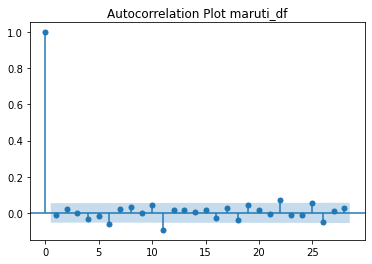

In [108]:
# ACF Plot
plot_acf(maruti_df["Return"],title="Autocorrelation Plot maruti_df",lags=28);

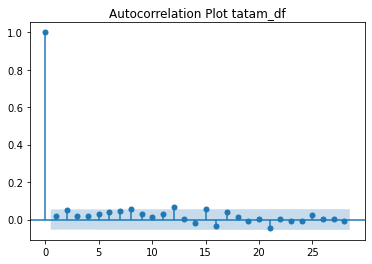

In [109]:
# ACF Plot
plot_acf(tatam_df["Return"],title="Autocorrelation Plot tatam_df",lags=28);

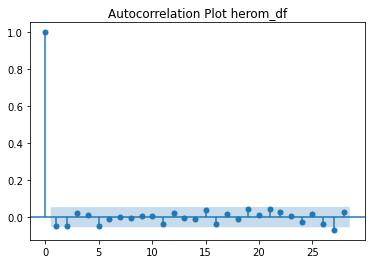

In [110]:
# ACF Plot
plot_acf(herom_df["Return"],title="Autocorrelation Plot herom_df",lags=28);

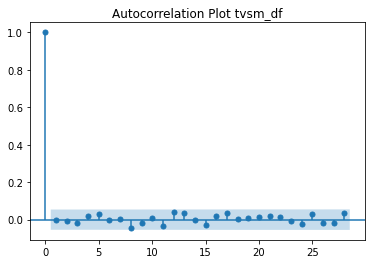

In [111]:
# ACF Plot
plot_acf(tvsm_df["Return"],title="Autocorrelation Plot tvsm_df",lags=28);

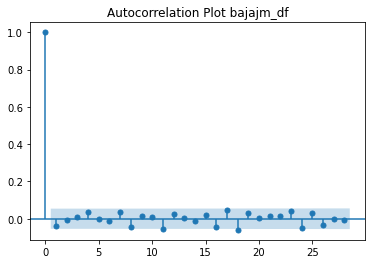

In [112]:
# ACF Plot
plot_acf(bajajm_df["Return"],title="Autocorrelation Plot bajajm_df",lags=28);

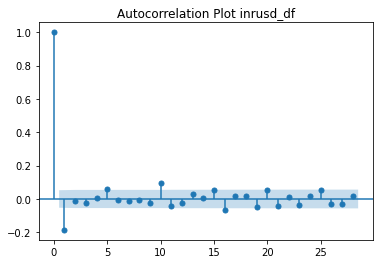

In [113]:
# ACF Plot
plot_acf(inrusd_df["Return"],title="Autocorrelation Plot inrusd_df",lags=28);

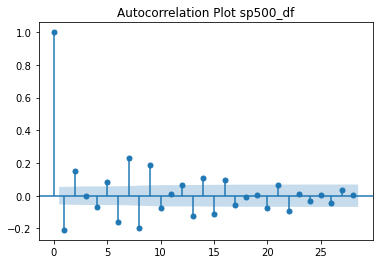

In [114]:
# ACF Plot
plot_acf(sp500_df["Return"],title="Autocorrelation Plot sp500_df",lags=28);

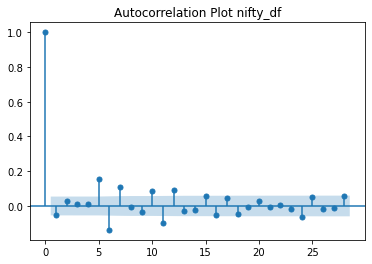

In [115]:
# ACF Plot
plot_acf(nifty_df["Return"],title="Autocorrelation Plot nifty_df",lags=28);

# PACF Plot - All Stocks are in range , except the external variables INR, S&P, Nifty

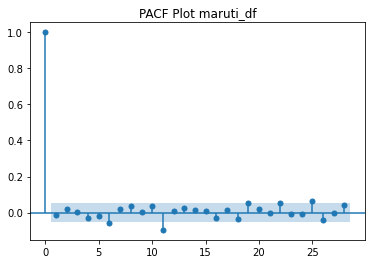

In [116]:
# PACF Plot
plot_pacf(maruti_df["Return"],title="PACF Plot maruti_df",lags=28);

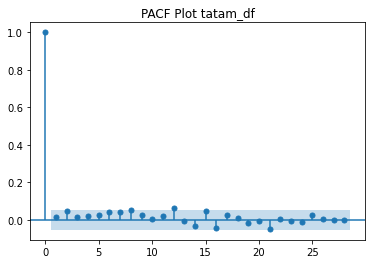

In [117]:
# PACF Plot
plot_pacf(tatam_df["Return"],title="PACF Plot tatam_df",lags=28);

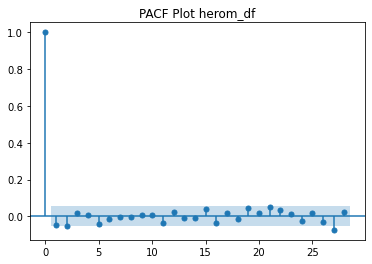

In [118]:
# PACF Plot
plot_pacf(herom_df["Return"],title="PACF Plot herom_df",lags=28);

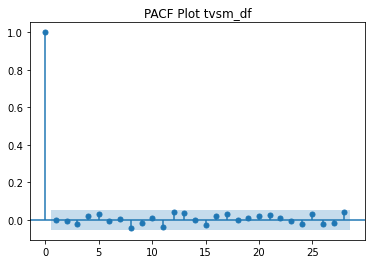

In [119]:
# PACF Plot
plot_pacf(tvsm_df["Return"],title="PACF Plot tvsm_df",lags=28);

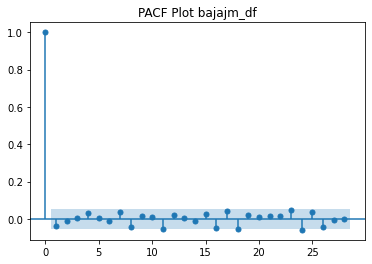

In [120]:
# PACF Plot
plot_pacf(bajajm_df["Return"],title="PACF Plot bajajm_df",lags=28);

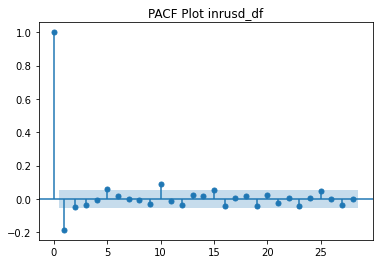

In [121]:
# PACF Plot
plot_pacf(inrusd_df["Return"],title="PACF Plot inrusd_df",lags=28);

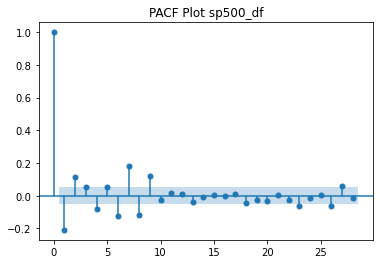

In [122]:
# PACF Plot
plot_pacf(sp500_df["Return"],title="PACF Plot sp500_df",lags=28);

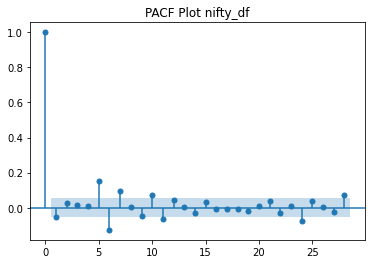

In [123]:
# PACF Plot
plot_pacf(nifty_df["Return"],title="PACF Plot nifty_df",lags=28);

# Auto Arima model statistics - use same for model fitting

# Maruti

In [124]:
model = pm.auto_arima(maruti_df["Return"], start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-6569.543, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-6573.122, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-6571.380, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-6571.369, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-6571.176, Time=0.15 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.600 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1314
Model:                        SARIMAX   Log Likelihood                3287.561
Date:                Tue, 03 May 2022   AIC                          -6573.122
Time:                        22:17:00   BIC                          -6567.941
Sample:                             0   HQIC                         -6571.179
                               - 1314                                  

# Tata M

In [125]:
model = pm.auto_arima(tatam_df["Return"], start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-5486.617, Time=0.27 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-5480.332, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-5478.695, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-5478.662, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-5478.522, Time=0.17 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-5479.196, Time=0.19 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-5479.711, Time=0.15 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-5479.877, Time=0.13 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-5482.989, Time=0.10 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-5477.828, Time=0.32 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 1.558 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1314
Model:               SARIMAX(1, 0, 1)   Log Likeliho

# Hero

In [126]:
model = pm.auto_arima(herom_df["Return"], start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-6664.822, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-6664.172, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-6665.237, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-6665.557, Time=0.09 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-6666.206, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-6664.085, Time=0.12 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=-6664.673, Time=0.17 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-6662.671, Time=0.23 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-6664.407, Time=0.36 sec

Best model:  ARIMA(0,0,2)(0,0,0)[0]          
Total fit time: 1.232 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1314
Model:               SARIMAX(0, 0, 2)   Log Likelihood                3336.103
Date:                Tue, 03 May 2022   

# TVS

In [127]:
model = pm.auto_arima(tvsm_df["Return"], start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-6380.107, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-6384.107, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-6382.107, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-6382.106, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-6382.316, Time=0.15 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.654 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1314
Model:                        SARIMAX   Log Likelihood                3193.054
Date:                Tue, 03 May 2022   AIC                          -6384.107
Time:                        22:17:04   BIC                          -6378.926
Sample:                             0   HQIC                         -6382.164
                               - 1314                                  

# Bajaj

In [128]:
model = pm.auto_arima(bajajm_df["Return"], start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-7017.319, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-7019.541, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-7019.267, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-7019.293, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-7017.867, Time=0.15 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.600 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1314
Model:                        SARIMAX   Log Likelihood                3510.770
Date:                Tue, 03 May 2022   AIC                          -7019.541
Time:                        22:17:04   BIC                          -7014.360
Sample:                             0   HQIC                         -7017.598
                               - 1314                                  

# INR USD

In [129]:
model = pm.auto_arima(inrusd_df["Return"], start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-11231.794, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-11183.085, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-11229.417, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-11233.156, Time=0.14 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-11231.716, Time=0.29 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-11229.667, Time=0.21 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-11231.870, Time=0.24 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 1.239 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1386
Model:               SARIMAX(0, 0, 1)   Log Likelihood                5618.578
Date:                Tue, 03 May 2022   AIC                         -11233.156
Time:                        22:17:05   BIC                         -11222.687
Sample:  

# S&P 500

In [130]:
model = pm.auto_arima(sp500_df["Return"], start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-8033.779, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-7969.197, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-8026.591, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-8013.872, Time=0.24 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-8037.692, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-8041.804, Time=0.12 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-8044.016, Time=0.25 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-8041.037, Time=0.23 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-8043.615, Time=0.43 sec

Best model:  ARIMA(3,0,0)(0,0,0)[0]          
Total fit time: 1.726 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1340
Model:               SARIMAX(3, 0, 0)   Log Likelihood                4026.008
Date:                Tue, 03 May 2022   

# Nifty

In [131]:
model = pm.auto_arima(nifty_df["Return"], start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-7895.889, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-7895.939, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-7897.439, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-7897.244, Time=0.14 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-7896.413, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-7897.589, Time=0.22 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-7892.823, Time=0.10 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-7892.449, Time=0.28 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-7894.442, Time=0.50 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-7894.804, Time=0.07 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-7904.141, Time=0.62 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=-7936.138, Time=0.75 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-7899.962, Time=0.72 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-7922.844, Time=1.45 sec

Best model:  ARIMA

# simple forecasting via AR model below suggests MSE is small for all and forecasting results against Test data is close but not that super close , hence the predictions for future might not be picture perfect

# Change the start date based on the last 28th date for model fitting under variable start_dt_ind in below cell

In [132]:
weekmask = 'Mon Tue Wed Thu Fri'
exclude = [pd.datetime(2022, 4, 15),
           pd.datetime(2022, 4, 14),
           pd.datetime(2022, 3, 18)]
start_dt_ind = '2022-03-23'
start_dt_ind

'2022-03-23'

In [133]:
# view dataframe shape
print('\n',maruti_df.shape)

print('\n',tatam_df.shape)

print('\n',herom_df.shape)

print('\n',tvsm_df.shape)

print('\n',bajajm_df.shape)

print('\n',inrusd_df.shape)

print('\n',sp500_df.shape)

print('\n',nifty_df.shape)


 (1314, 7)

 (1314, 7)

 (1314, 7)

 (1314, 7)

 (1314, 7)

 (1386, 7)

 (1340, 7)

 (1310, 7)


# Maruti

In [134]:
# simple forecasting 
maruti_df_train = maruti_df["Return"].iloc[int(0.022*(len(maruti_df["Return"]))):]
maruti_df_test = maruti_df["Return"].iloc[:int(0.022*(len(maruti_df["Return"])))]
print('\n',maruti_df.shape)
print('\n',maruti_df_train.shape)
print('\n',maruti_df_test.shape)
print('\n',maruti_df_train.isnull().sum())
print('\n',maruti_df_test.isnull().sum())
model = AR(maruti_df_train)
ARfit = model.fit(maxlag=10,method='mle') 
ARfit.summary()


 (1314, 7)

 (1286,)

 (28,)

 0

 0


C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               AR Model Results                               
==============================================================================
Dep. Variable:                      R  -                  e                  t
Model:                         AR(10)   Log Likelihood                3216.849
Method:                           mle   S.D. of innovations              0.020
Date:                Tue, 03 May 2022   AIC                             -7.822
Time:                        22:17:13   BIC                             -7.774
Sample:                             0   HQIC                            -7.804
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.692e-05      0.001     -0.157      0.875      -0.001       0.001
L1.Return     -0.0152      0.028     -0.545      0.586      -0.070       0.039
L2.Return      0.0174      0.028      0.625      0.532      -0.037       0.072
L3.Return      0.0032      0.028      0.113      0.910      -0.051       0.058
L4.Return     -0.0247      0.028     -0.888      0.375      -0.079       0.030
L5.Return     -0.0168      0.028     -0.603      0.547      -0.071       0.038
L6.Return     -0.0596      0.028     -2.142      0.032      -0.114      -0.005
L7.Return      0.0237      0.028      0.849      0.396      -0.031       0.078
L8.Return      0.0381      0.028      1.360      0.174      -0.017       0.093
L9.Return      0.0062      0.028      0.220      0.826      -0.049       0.061
L10.Return     0.0420      0.028      1.496      0.135      -0.013       0.097
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -1.4008           -0.0000j            1.4008           -0.5000
AR.2            -1.0659           -0.7661j            1.3127           -0.4008
AR.3            -1.0659           +0.7661j            1.3127            0.4008
AR.4             1.0143           -0.7951j            1.2888           -0.1058
AR.5             1.0143           +0.7951j            1.2888            0.1058
AR.6             1.3436           -0.0000j            1.3436           -0.0000
AR.7            -0.3445           -1.3681j            1.4108           -0.2893
AR.8            -0.3445           +1.3681j            1.4108            0.2893
AR.9             0.3512           -1.4476j            1.4896           -0.2121
AR.10            0.3512           +1.4476j            1.4896            0.2121
------------------------------------------------------------------------------
"""


MSE:  0.0002086771972432777


C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


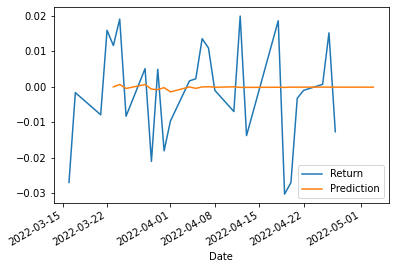

In [135]:
start=len(maruti_df_train)
end=len(maruti_df_train)+len(maruti_df_test)-1
prediction = ARfit.predict(start = start ,end = end, dynamic=False).rename('Prediction')
prediction.index = pd.bdate_range(start_dt_ind,periods=28,
               freq='C',
               weekmask = weekmask,
               holidays=exclude)
maruti_df_test.plot(legend=True)
prediction.plot(legend=True)
#prediction
error = MSE(maruti_df_test, prediction)
print('\nMSE: ',error)

C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


2022-03-23   -0.000071
2022-03-24    0.000680
2022-03-25   -0.000345
2022-03-28    0.000700
2022-03-29   -0.000557
2022-03-30   -0.000714
2022-03-31   -0.000159
2022-04-01   -0.001313
2022-04-04   -0.000051
2022-04-05   -0.000433
2022-04-06   -0.000077
2022-04-07   -0.000021
2022-04-08   -0.000143
2022-04-11   -0.000042
2022-04-12   -0.000173
2022-04-13   -0.000172
2022-04-18   -0.000140
2022-04-19   -0.000191
2022-04-20   -0.000122
2022-04-21   -0.000141
2022-04-22   -0.000122
2022-04-25   -0.000119
2022-04-26   -0.000130
2022-04-27   -0.000124
2022-04-28   -0.000133
2022-04-29   -0.000132
2022-05-02   -0.000130
2022-05-03   -0.000132
Freq: C, Name: Forecast, dtype: float64

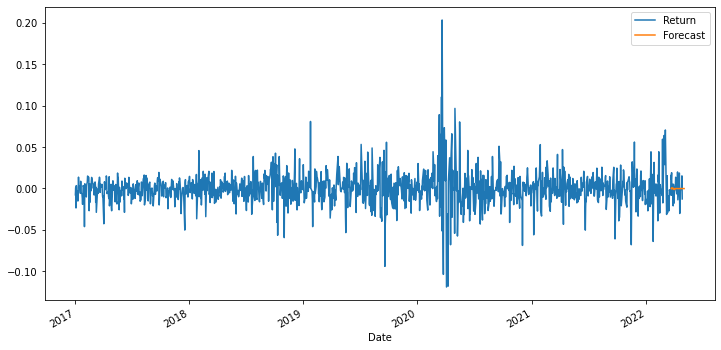

In [136]:
# Retrain the model on the complete dataset

model = AR(maruti_df["Return"])

# fit the model
ARfit = model.fit(maxlag=10,method='mle')

# Make predictions
forecast = ARfit.predict(start=len(maruti_df["Return"]), end=len(maruti_df["Return"])+28-1, dynamic=False).rename('Forecast')
forecast.index = pd.bdate_range(start_dt_ind,periods=28,
               freq='C',
               weekmask = weekmask,
               holidays=exclude)
# Plot the results
maruti_df["Return"].plot(legend=True)
forecast.plot(legend=True,figsize=(12,6));
forecast

# Tata Motors

In [137]:
# simple forecasting 
tatam_df_train = tatam_df["Return"].iloc[int(0.022*(len(tatam_df["Return"]))):]
tatam_df_test = tatam_df["Return"].iloc[:int(0.022*(len(tatam_df["Return"])))]
print('\n',tatam_df.shape)
print('\n',tatam_df_train.shape)
print('\n',tatam_df_test.shape)
print('\n',tatam_df_train.isnull().sum())
print('\n',tatam_df_test.isnull().sum())
model = AR(tatam_df_train)
ARfit = model.fit(maxlag=10,method='mle') 
ARfit.summary()

C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'



 (1314, 7)

 (1286,)

 (28,)

 0

 0


<class 'statsmodels.iolib.summary.Summary'>
"""
                               AR Model Results                               
==============================================================================
Dep. Variable:                      R  -                  e                  t
Model:                         AR(10)   Log Likelihood                2680.708
Method:                           mle   S.D. of innovations              0.030
Date:                Tue, 03 May 2022   AIC                             -6.988
Time:                        22:17:13   BIC                             -6.940
Sample:                             0   HQIC                            -6.970
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.001      0.482      0.630      -0.001       0.002
L1.Return      0.0081      0.028      0.292      0.770      -0.047       0.063
L2.Return      0.0434      0.028      1.557      0.120      -0.011       0.098
L3.Return      0.0097      0.028      0.348      0.728      -0.045       0.064
L4.Return      0.0143      0.028      0.513      0.608      -0.040       0.069
L5.Return      0.0232      0.028      0.836      0.403      -0.031       0.078
L6.Return      0.0344      0.028      1.234      0.217      -0.020       0.089
L7.Return      0.0409      0.028      1.470      0.142      -0.014       0.095
L8.Return      0.0536      0.028      1.922      0.055      -0.001       0.108
L9.Return      0.0241      0.028      0.865      0.387      -0.031       0.079
L10.Return     0.0033      0.028      0.116      0.907      -0.051       0.058
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             1.2397           -0.0000j            1.2397           -0.0000
AR.2             0.9497           -0.9713j            1.3584           -0.1268
AR.3             0.9497           +0.9713j            1.3584            0.1268
AR.4             0.0769           -1.5141j            1.5161           -0.2419
AR.5             0.0769           +1.5141j            1.5161            0.2419
AR.6            -1.0642           -1.2869j            1.6699           -0.3600
AR.7            -1.0642           +1.2869j            1.6699            0.3600
AR.8            -1.9182           -0.0000j            1.9182           -0.5000
AR.9            -2.9056           -0.0000j            2.9056           -0.5000
AR.10           -3.7610           -0.0000j            3.7610           -0.5000
------------------------------------------------------------------------------
"""


MSE:  0.0003018369728448684


C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


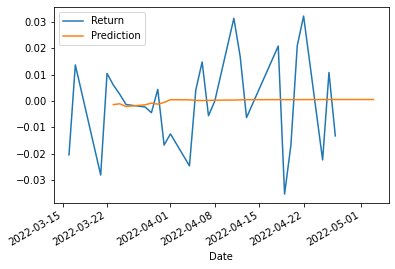

In [138]:
start=len(tatam_df_train)
end=len(tatam_df_train)+len(tatam_df_test)-1
prediction = ARfit.predict(start = start ,end = end, dynamic=False).rename('Prediction')
prediction.index = pd.bdate_range(start_dt_ind,periods=28,
               freq='C',
               weekmask = weekmask,
               holidays=exclude)
tatam_df_test.plot(legend=True)
prediction.plot(legend=True)
#prediction
error = MSE(tatam_df_test, prediction)
print('\nMSE: ',error)

C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


2022-03-23   -0.001451
2022-03-24   -0.001112
2022-03-25   -0.002016
2022-03-28   -0.001533
2022-03-29   -0.000885
2022-03-30   -0.001164
2022-03-31   -0.000578
2022-04-01    0.000427
2022-04-04    0.000378
2022-04-05    0.000184
2022-04-06    0.000150
2022-04-07    0.000188
2022-04-08    0.000259
2022-04-11    0.000319
2022-04-12    0.000383
2022-04-13    0.000443
2022-04-18    0.000463
2022-04-19    0.000461
2022-04-20    0.000462
2022-04-21    0.000470
2022-04-22    0.000481
2022-04-25    0.000491
2022-04-26    0.000500
2022-04-27    0.000506
2022-04-28    0.000510
2022-04-29    0.000511
2022-05-02    0.000513
2022-05-03    0.000514
Freq: C, Name: Forecast, dtype: float64

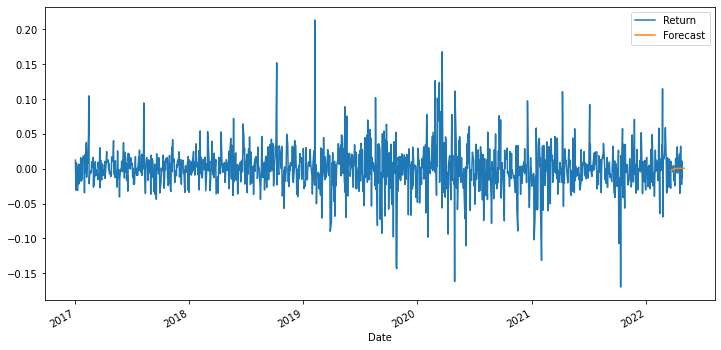

In [139]:
# Retrain the model on the complete dataset

model = AR(tatam_df["Return"])

# fit the model
ARfit = model.fit(maxlag=10,method='mle')

# Make predictions
forecast = ARfit.predict(start=len(tatam_df["Return"]), end=len(tatam_df["Return"])+28-1, dynamic=False).rename('Forecast')
forecast.index = pd.bdate_range(start_dt_ind,periods=28,
               freq='C',
               weekmask = weekmask,
               holidays=exclude)
# Plot the results
tatam_df["Return"].plot(legend=True)
forecast.plot(legend=True,figsize=(12,6));
forecast

# TVS

In [140]:
# simple forecasting 
tvsm_df_train = tvsm_df["Return"].iloc[int(0.022*(len(tvsm_df["Return"]))):]
tvsm_df_test = tvsm_df["Return"].iloc[:int(0.022*(len(tvsm_df["Return"])))]
print('\n',tvsm_df.shape)
print('\n',tvsm_df_train.shape)
print('\n',tvsm_df_test.shape)
print('\n',tvsm_df_train.isnull().sum())
print('\n',tvsm_df_test.isnull().sum())
model = AR(tvsm_df_train)
ARfit = model.fit(maxlag=10,method='mle') 
ARfit.summary()


 (1314, 7)

 (1286,)

 (28,)

 0

 0


C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               AR Model Results                               
==============================================================================
Dep. Variable:                      R  -                  e                  t
Model:                         AR(10)   Log Likelihood                3119.724
Method:                           mle   S.D. of innovations              0.021
Date:                Tue, 03 May 2022   AIC                             -7.671
Time:                        22:17:14   BIC                             -7.623
Sample:                             0   HQIC                            -7.653
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002      0.001     -0.317      0.751      -0.001       0.001
L1.Return      0.0005      0.028      0.017      0.987      -0.054       0.055
L2.Return     -0.0063      0.028     -0.225      0.822      -0.061       0.048
L3.Return     -0.0210      0.028     -0.754      0.451      -0.076       0.034
L4.Return      0.0185      0.028      0.662      0.508      -0.036       0.073
L5.Return      0.0306      0.028      1.098      0.272      -0.024       0.085
L6.Return     -0.0073      0.028     -0.261      0.794      -0.062       0.047
L7.Return      0.0044      0.028      0.157      0.875      -0.050       0.059
L8.Return     -0.0415      0.028     -1.486      0.137      -0.096       0.013
L9.Return     -0.0192      0.028     -0.685      0.493      -0.074       0.036
L10.Return     0.0058      0.028      0.207      0.836      -0.049       0.061
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -1.2939           -0.7570j            1.4991           -0.4157
AR.2            -1.2939           +0.7570j            1.4991            0.4157
AR.3            -1.8549           -0.0000j            1.8549           -0.5000
AR.4            -0.4106           -1.4076j            1.4663           -0.2952
AR.5            -0.4106           +1.4076j            1.4663            0.2952
AR.6             0.5519           -1.2754j            1.3897           -0.1850
AR.7             0.5519           +1.2754j            1.3897            0.1850
AR.8             1.3470           -0.5202j            1.4440           -0.0587
AR.9             1.3470           +0.5202j            1.4440            0.0587
AR.10            4.7744           -0.0000j            4.7744           -0.0000
------------------------------------------------------------------------------
"""


MSE:  0.00019320357426592445


C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


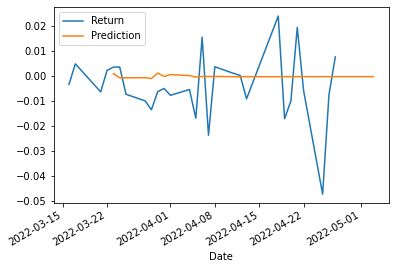

In [141]:
start=len(tvsm_df_train)
end=len(tvsm_df_train)+len(tvsm_df_test)-1
prediction = ARfit.predict(start = start ,end = end, dynamic=False).rename('Prediction')
prediction.index = pd.bdate_range(start_dt_ind,periods=28,
               freq='C',
               weekmask = weekmask,
               holidays=exclude)
tvsm_df_test.plot(legend=True)
prediction.plot(legend=True)
#prediction
error = MSE(tvsm_df_test, prediction)
print('\nMSE: ',error)

C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


2022-03-23    0.000903
2022-03-24   -0.000749
2022-03-25   -0.000736
2022-03-28   -0.000806
2022-03-29   -0.000920
2022-03-30    0.001100
2022-03-31   -0.000268
2022-04-01    0.000502
2022-04-04    0.000113
2022-04-05   -0.000456
2022-04-06   -0.000209
2022-04-07   -0.000240
2022-04-08   -0.000196
2022-04-11   -0.000316
2022-04-12   -0.000299
2022-04-13   -0.000285
2022-04-18   -0.000294
2022-04-19   -0.000258
2022-04-20   -0.000265
2022-04-21   -0.000271
2022-04-22   -0.000271
2022-04-25   -0.000266
2022-04-26   -0.000264
2022-04-27   -0.000266
2022-04-28   -0.000266
2022-04-29   -0.000267
2022-05-02   -0.000267
2022-05-03   -0.000267
Freq: C, Name: Forecast, dtype: float64

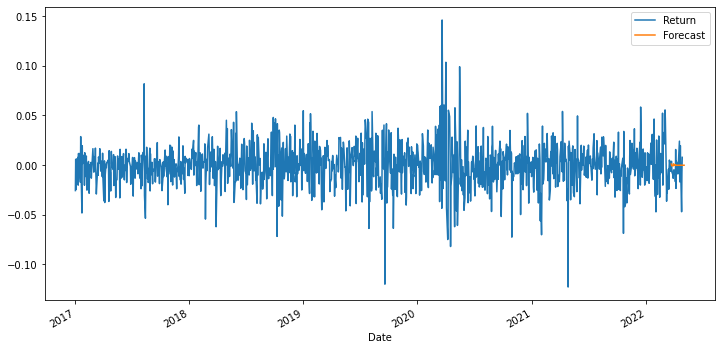

In [142]:
# Retrain the model on the complete dataset

model = AR(tvsm_df["Return"])

# fit the model
ARfit = model.fit(maxlag=10,method='mle')

# Make predictions
forecast = ARfit.predict(start=len(tvsm_df["Return"]), end=len(tvsm_df["Return"])+28-1, dynamic=False).rename('Forecast')
forecast.index = pd.bdate_range(start_dt_ind,periods=28,
               freq='C',
               weekmask = weekmask,
               holidays=exclude)
# Plot the results
tvsm_df["Return"].plot(legend=True)
forecast.plot(legend=True,figsize=(12,6));
forecast

# Hero

In [143]:
# simple forecasting 
herom_df_train = herom_df["Return"].iloc[int(0.022*(len(herom_df["Return"]))):]
herom_df_test = herom_df["Return"].iloc[:int(0.022*(len(herom_df["Return"])))]
print('\n',herom_df.shape)
print('\n',herom_df_train.shape)
print('\n',herom_df_test.shape)
print('\n',herom_df_train.isnull().sum())
print('\n',herom_df_test.isnull().sum())
model = AR(herom_df_train)
ARfit = model.fit(maxlag=10,method='mle') 
ARfit.summary()

C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'



 (1314, 7)

 (1286,)

 (28,)

 0

 0


<class 'statsmodels.iolib.summary.Summary'>
"""
                               AR Model Results                               
==============================================================================
Dep. Variable:                      R  -                  e                  t
Model:                         AR(10)   Log Likelihood                3272.303
Method:                           mle   S.D. of innovations              0.019
Date:                Tue, 03 May 2022   AIC                             -7.908
Time:                        22:17:14   BIC                             -7.860
Sample:                             0   HQIC                            -7.890
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.001      0.505      0.614      -0.001       0.001
L1.Return     -0.0507      0.028     -1.819      0.069      -0.105       0.004
L2.Return     -0.0491      0.028     -1.760      0.078      -0.104       0.006
L3.Return      0.0120      0.028      0.430      0.667      -0.043       0.067
L4.Return      0.0075      0.028      0.268      0.789      -0.047       0.062
L5.Return     -0.0402      0.028     -1.439      0.150      -0.095       0.015
L6.Return     -0.0109      0.028     -0.390      0.696      -0.066       0.044
L7.Return     -0.0005      0.028     -0.018      0.986      -0.055       0.054
L8.Return      0.0072      0.028      0.257      0.797      -0.048       0.062
L9.Return      0.0086      0.028      0.306      0.759      -0.046       0.064
L10.Return     0.0088      0.028      0.314      0.754      -0.046       0.064
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             1.5835           -0.0000j            1.5835           -0.0000
AR.2             1.1614           -0.9143j            1.4781           -0.1061
AR.3             1.1614           +0.9143j            1.4781            0.1061
AR.4             0.3127           -1.6115j            1.6416           -0.2195
AR.5             0.3127           +1.6115j            1.6416            0.2195
AR.6            -0.5221           -1.4904j            1.5793           -0.3036
AR.7            -0.5221           +1.4904j            1.5793            0.3036
AR.8            -1.6208           -0.0000j            1.6208           -0.5000
AR.9            -1.4221           -0.9988j            1.7378           -0.4026
AR.10           -1.4221           +0.9988j            1.7378            0.4026
------------------------------------------------------------------------------
"""


MSE:  0.0005133313370537672


C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


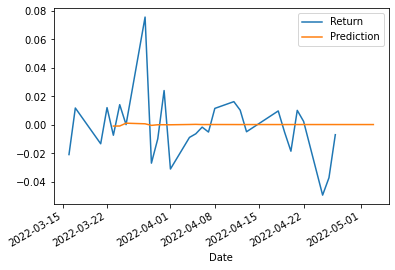

In [144]:
start=len(herom_df_train)
end=len(herom_df_train)+len(herom_df_test)-1
prediction = ARfit.predict(start = start ,end = end, dynamic=False).rename('Prediction')
prediction.index = pd.bdate_range(start_dt_ind,periods=28,
               freq='C',
               weekmask = weekmask,
               holidays=exclude)
herom_df_test.plot(legend=True)
prediction.plot(legend=True)
#prediction
error = MSE(herom_df_test, prediction)
print('\nMSE: ',error)

C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


2022-03-23   -0.000929
2022-03-24   -0.000759
2022-03-25    0.001358
2022-03-28    0.000656
2022-03-29   -0.000347
2022-03-30    0.000245
2022-03-31    0.000090
2022-04-01   -0.000066
2022-04-04    0.000266
2022-04-05    0.000297
2022-04-06    0.000169
2022-04-07    0.000201
2022-04-08    0.000225
2022-04-11    0.000194
2022-04-12    0.000189
2022-04-13    0.000198
2022-04-18    0.000194
2022-04-19    0.000194
2022-04-20    0.000198
2022-04-21    0.000198
2022-04-22    0.000197
2022-04-25    0.000197
2022-04-26    0.000197
2022-04-27    0.000197
2022-04-28    0.000197
2022-04-29    0.000197
2022-05-02    0.000197
2022-05-03    0.000197
Freq: C, Name: Forecast, dtype: float64

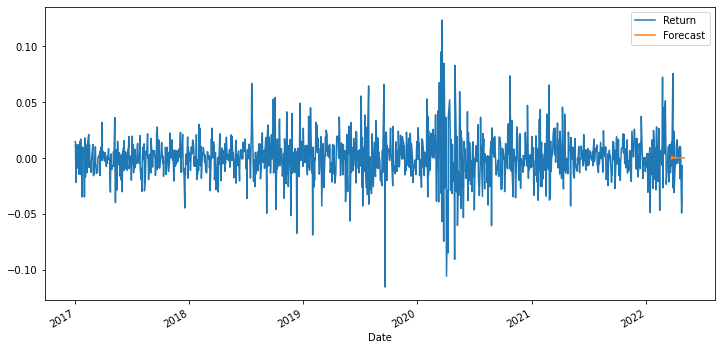

In [145]:
# Retrain the model on the complete dataset

model = AR(herom_df["Return"])

# fit the model
ARfit = model.fit(maxlag=10,method='mle')

# Make predictions
forecast = ARfit.predict(start=len(herom_df["Return"]), end=len(herom_df["Return"])+28-1, dynamic=False).rename('Forecast')
forecast.index = pd.bdate_range(start_dt_ind,periods=28,
               freq='C',
               weekmask = weekmask,
               holidays=exclude)
# Plot the results
herom_df["Return"].plot(legend=True)
forecast.plot(legend=True,figsize=(12,6));
forecast

# Bajaj

In [146]:
# simple forecasting 
bajajm_df_train = bajajm_df["Return"].iloc[int(0.022*(len(bajajm_df["Return"]))):]
bajajm_df_test = bajajm_df["Return"].iloc[:int(0.022*(len(bajajm_df["Return"])))]
print('\n',bajajm_df.shape)
print('\n',bajajm_df_train.shape)
print('\n',bajajm_df_test.shape)
print('\n',bajajm_df_train.isnull().sum())
print('\n',bajajm_df_test.isnull().sum())
model = AR(bajajm_df_train)
ARfit = model.fit(maxlag=10,method='mle') 
ARfit.summary()

C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'



 (1314, 7)

 (1286,)

 (28,)

 0

 0


<class 'statsmodels.iolib.summary.Summary'>
"""
                               AR Model Results                               
==============================================================================
Dep. Variable:                      R  -                  e                  t
Model:                         AR(10)   Log Likelihood                3438.827
Method:                           mle   S.D. of innovations              0.017
Date:                Tue, 03 May 2022   AIC                             -8.167
Time:                        22:17:15   BIC                             -8.119
Sample:                             0   HQIC                            -8.149
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002      0.000     -0.462      0.644      -0.001       0.001
L1.Return     -0.0364      0.028     -1.303      0.192      -0.091       0.018
L2.Return     -0.0025      0.028     -0.088      0.930      -0.057       0.052
L3.Return      0.0067      0.028      0.241      0.809      -0.048       0.061
L4.Return      0.0364      0.028      1.305      0.192      -0.018       0.091
L5.Return      0.0005      0.028      0.018      0.986      -0.054       0.055
L6.Return     -0.0105      0.028     -0.374      0.708      -0.065       0.044
L7.Return      0.0327      0.028      1.171      0.242      -0.022       0.087
L8.Return     -0.0364      0.028     -1.302      0.193      -0.091       0.018
L9.Return      0.0167      0.028      0.599      0.549      -0.038       0.072
L10.Return     0.0100      0.028      0.358      0.720      -0.045       0.065
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             1.5211           -0.0000j            1.5211           -0.0000
AR.2             1.2923           -0.9078j            1.5793           -0.0975
AR.3             1.2923           +0.9078j            1.5793            0.0975
AR.4             0.4470           -1.4209j            1.4896           -0.2015
AR.5             0.4470           +1.4209j            1.4896            0.2015
AR.6            -0.4799           -1.3118j            1.3968           -0.3058
AR.7            -0.4799           +1.3118j            1.3968            0.3058
AR.8            -1.2717           -0.5491j            1.3852           -0.4351
AR.9            -1.2717           +0.5491j            1.3852            0.4351
AR.10           -3.1694           -0.0000j            3.1694           -0.5000
------------------------------------------------------------------------------
"""


MSE:  0.00025630767364549073


C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


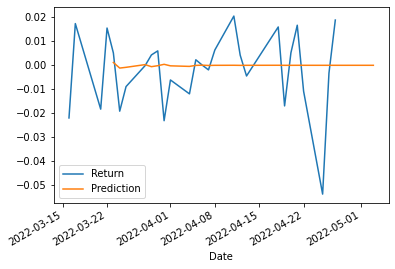

In [147]:
start=len(bajajm_df_train)
end=len(bajajm_df_train)+len(bajajm_df_test)-1
prediction = ARfit.predict(start = start ,end = end, dynamic=False).rename('Prediction')
prediction.index = pd.bdate_range(start_dt_ind,periods=28,
               freq='C',
               weekmask = weekmask,
               holidays=exclude)
bajajm_df_test.plot(legend=True)
prediction.plot(legend=True)
#prediction
error = MSE(bajajm_df_test, prediction)
print('\nMSE: ',error)

C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
C:\Shashwat\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


2022-03-23    0.001004
2022-03-24   -0.001417
2022-03-25   -0.001117
2022-03-28    0.000013
2022-03-29   -0.000907
2022-03-30   -0.000415
2022-03-31    0.000286
2022-04-01   -0.000400
2022-04-04   -0.000724
2022-04-05   -0.000296
2022-04-06   -0.000198
2022-04-07   -0.000332
2022-04-08   -0.000271
2022-04-11   -0.000249
2022-04-12   -0.000298
2022-04-13   -0.000272
2022-04-18   -0.000246
2022-04-19   -0.000272
2022-04-20   -0.000279
2022-04-21   -0.000264
2022-04-22   -0.000266
2022-04-25   -0.000270
2022-04-26   -0.000267
2022-04-27   -0.000267
2022-04-28   -0.000269
2022-04-29   -0.000268
2022-05-02   -0.000267
2022-05-03   -0.000268
Freq: C, Name: Forecast, dtype: float64

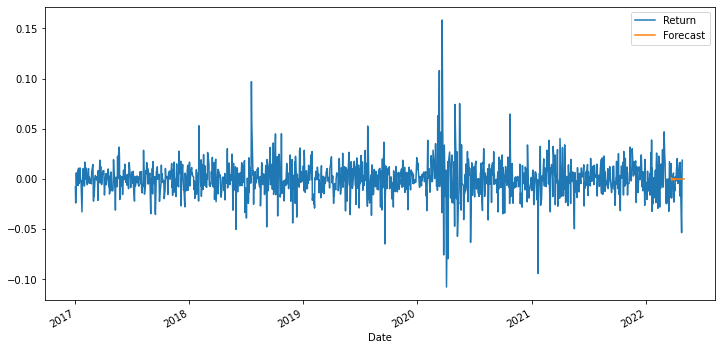

In [148]:
# Retrain the model on the complete dataset

model = AR(bajajm_df["Return"])

# fit the model
ARfit = model.fit(maxlag=10,method='mle')

# Make predictions
forecast = ARfit.predict(start=len(bajajm_df["Return"]), end=len(bajajm_df["Return"])+28-1, dynamic=False).rename('Forecast')
forecast.index = pd.bdate_range(start_dt_ind,periods=28,
               freq='C',
               weekmask = weekmask,
               holidays=exclude)
# Plot the results
bajajm_df["Return"].plot(legend=True)
forecast.plot(legend=True,figsize=(12,6));
forecast


# INR

In [149]:
# simple forecasting 
inrusd_df_train = inrusd_df["Return"].iloc[int(0.0205*(len(inrusd_df["Return"]))):]
inrusd_df_test = inrusd_df["Return"].iloc[:int(0.0205*(len(inrusd_df["Return"])))]
print('\n',inrusd_df.shape)
print('\n',inrusd_df_train.shape)
print('\n',inrusd_df_test.shape)
print('\n',inrusd_df_train.isnull().sum())
print('\n',inrusd_df_test.isnull().sum())
model = AR(inrusd_df_train)
ARfit = model.fit(maxlag=10,method='mle') 
ARfit.summary()

C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'



 (1386, 7)

 (1358,)

 (28,)

 0

 0


<class 'statsmodels.iolib.summary.Summary'>
"""
                               AR Model Results                               
==============================================================================
Dep. Variable:                      R  -                  e                  t
Model:                         AR(10)   Log Likelihood                5507.732
Method:                           mle   S.D. of innovations              0.004
Date:                Tue, 03 May 2022   AIC                            -10.932
Time:                        22:17:16   BIC                            -10.886
Sample:                             0   HQIC                           -10.915
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.188e-05      0.000     -0.718      0.472      -0.000       0.000
L1.Return     -0.1939      0.027     -7.174      0.000      -0.247      -0.141
L2.Return     -0.0531      0.028     -1.928      0.054      -0.107       0.001
L3.Return     -0.0315      0.028     -1.143      0.253      -0.086       0.023
L4.Return      0.0048      0.028      0.174      0.862      -0.049       0.059
L5.Return      0.0552      0.028      2.001      0.045       0.001       0.109
L6.Return      0.0180      0.028      0.653      0.514      -0.036       0.072
L7.Return     -0.0034      0.028     -0.123      0.902      -0.057       0.051
L8.Return     -0.0067      0.028     -0.243      0.808      -0.061       0.047
L9.Return     -0.0127      0.028     -0.460      0.646      -0.067       0.041
L10.Return     0.0883      0.027      3.258      0.001       0.035       0.141
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -1.2462           -0.0000j            1.2462           -0.5000
AR.2            -1.0014           -0.7161j            1.2311           -0.4012
AR.3            -1.0014           +0.7161j            1.2311            0.4012
AR.4            -0.4115           -1.2091j            1.2773           -0.3022
AR.5            -0.4115           +1.2091j            1.2773            0.3022
AR.6             0.3716           -1.1851j            1.2420           -0.2016
AR.7             0.3716           +1.1851j            1.2420            0.2016
AR.8             1.0809           -0.8054j            1.3479           -0.1019
AR.9             1.0809           +0.8054j            1.3479            0.1019
AR.10            1.3108           -0.0000j            1.3108           -0.0000
------------------------------------------------------------------------------
"""


MSE:  9.977824634941373e-06


C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


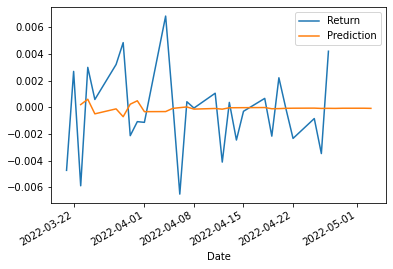

In [150]:
start=len(inrusd_df_train)
end=len(inrusd_df_train)+len(inrusd_df_test)-1
prediction = ARfit.predict(start = start ,end = end, dynamic=False).rename('Prediction')
prediction.index = pd.bdate_range(start_dt_ind,periods=28,
               freq='C',
               weekmask = weekmask,
               holidays=exclude)
inrusd_df_test.plot(legend=True)
prediction.plot(legend=True)
#prediction
error = MSE(inrusd_df_test, prediction)
print('\nMSE: ',error)

C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


2022-03-23    0.000224
2022-03-24    0.000591
2022-03-25   -0.000497
2022-03-28   -0.000128
2022-03-29   -0.000687
2022-03-30    0.000240
2022-03-31    0.000473
2022-04-01   -0.000331
2022-04-04   -0.000317
2022-04-05   -0.000083
2022-04-06   -0.000022
2022-04-07    0.000020
2022-04-08   -0.000138
2022-04-11   -0.000091
2022-04-12   -0.000137
2022-04-13   -0.000035
2022-04-18   -0.000023
2022-04-19   -0.000109
2022-04-20   -0.000098
2022-04-21   -0.000078
2022-04-22   -0.000069
2022-04-25   -0.000065
2022-04-26   -0.000086
2022-04-27   -0.000079
2022-04-28   -0.000083
2022-04-29   -0.000071
2022-05-02   -0.000072
2022-05-03   -0.000081
Freq: C, Name: Forecast, dtype: float64

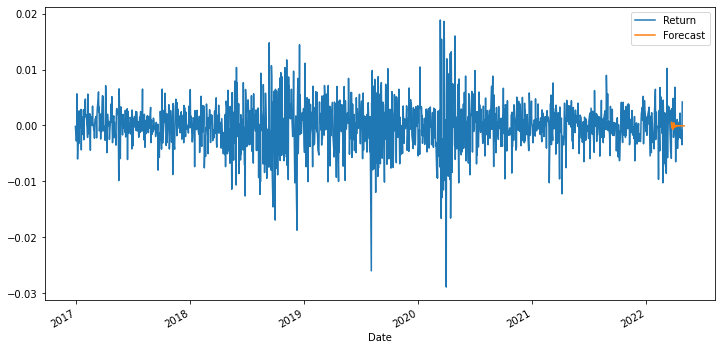

In [151]:
# Retrain the model on the complete dataset

model = AR(inrusd_df["Return"])

# fit the model
ARfit = model.fit(maxlag=10,method='mle')

# Make predictions
forecast = ARfit.predict(start=len(inrusd_df["Return"]), end=len(inrusd_df["Return"])+28-1, dynamic=False).rename('Forecast')
forecast.index = pd.bdate_range(start_dt_ind,periods=28,
               freq='C',
               weekmask = weekmask,
               holidays=exclude)
# Plot the results
inrusd_df["Return"].plot(legend=True)
forecast.plot(legend=True,figsize=(12,6));
forecast


# S&P

In [152]:
# simple forecasting 
sp500_df_train = sp500_df["Return"].iloc[int(0.021*(len(sp500_df["Return"]))):]
sp500_df_test = sp500_df["Return"].iloc[:int(0.021*(len(sp500_df["Return"])))]
print('\n',sp500_df.shape)
print('\n',sp500_df_train.shape)
print('\n',sp500_df_test.shape)
print('\n',sp500_df_train.isnull().sum())
print('\n',sp500_df_test.isnull().sum())
model = AR(sp500_df_train)
ARfit = model.fit(maxlag=10,method='mle') 
ARfit.summary()

C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'



 (1340, 7)

 (1312,)

 (28,)

 0

 0


C:\Shashwat\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               AR Model Results                               
==============================================================================
Dep. Variable:                      R  -                  e                  t
Model:                         AR(10)   Log Likelihood                4002.817
Method:                           mle   S.D. of innovations              0.011
Date:                Tue, 03 May 2022   AIC                             -8.922
Time:                        22:17:16   BIC                             -8.875
Sample:                             0   HQIC                            -8.904
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0004      0.000     -1.376      0.169      -0.001       0.000
L1.Return     -0.1186      0.028     -4.297      0.000      -0.173      -0.065
L2.Return      0.0876      0.028      3.173      0.002       0.033       0.142
L3.Return      0.0565      0.028      2.047      0.041       0.002       0.111
L4.Return     -0.0739      0.027     -2.696      0.007      -0.128      -0.020
L5.Return      0.0308      0.027      1.126      0.260      -0.023       0.084
L6.Return     -0.0858      0.027     -3.130      0.002      -0.140      -0.032
L7.Return      0.1389      0.027      5.065      0.000       0.085       0.193
L8.Return     -0.1009      0.028     -3.645      0.000      -0.155      -0.047
L9.Return      0.1212      0.028      4.377      0.000       0.067       0.176
L10.Return    -0.0254      0.028     -0.913      0.361      -0.080       0.029
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -0.9965           -0.4389j            1.0889           -0.4340
AR.2            -0.9965           +0.4389j            1.0889            0.4340
AR.3            -0.5742           -1.1168j            1.2557           -0.3256
AR.4            -0.5742           +1.1168j            1.2557            0.3256
AR.5             0.2175           -1.4164j            1.4330           -0.2257
AR.6             0.2175           +1.4164j            1.4330            0.2257
AR.7             1.0102           -0.8954j            1.3499           -0.1154
AR.8             1.0102           +0.8954j            1.3499            0.1154
AR.9             1.3790           -0.0000j            1.3790           -0.0000
AR.10            4.0856           -0.0000j            4.0856           -0.0000
------------------------------------------------------------------------------
"""

C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


<AxesSubplot:xlabel='Date'>

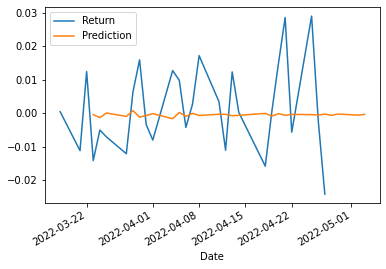

In [153]:
start=len(sp500_df_train)
end=len(sp500_df_train)+len(sp500_df_test)-1
prediction = ARfit.predict(start = start ,end = end, dynamic=False).rename('Prediction')
prediction.index = pd.bdate_range(start_dt_ind,periods=28,
               freq='C',
               weekmask = weekmask,
               holidays=exclude)
sp500_df_test.plot(legend=True)
prediction.plot(legend=True)
#prediction

In [154]:
error = MSE(sp500_df_test, prediction)
error

0.00016499618219835568

C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


2022-03-23   -0.000441
2022-03-24   -0.001256
2022-03-25    0.000086
2022-03-28   -0.000937
2022-03-29    0.000856
2022-03-30   -0.001187
2022-03-31   -0.000777
2022-04-01   -0.000108
2022-04-04   -0.001575
2022-04-05    0.000236
2022-04-06   -0.000889
2022-04-07   -0.000006
2022-04-08   -0.000648
2022-04-11   -0.000293
2022-04-12   -0.000309
2022-04-13   -0.000747
2022-04-18   -0.000029
2022-04-19   -0.000801
2022-04-20   -0.000119
2022-04-21   -0.000583
2022-04-22   -0.000329
2022-04-25   -0.000382
2022-04-26   -0.000518
2022-04-27   -0.000235
2022-04-28   -0.000608
2022-04-29   -0.000226
2022-05-02   -0.000544
2022-05-03   -0.000332
Freq: C, Name: Forecast, dtype: float64

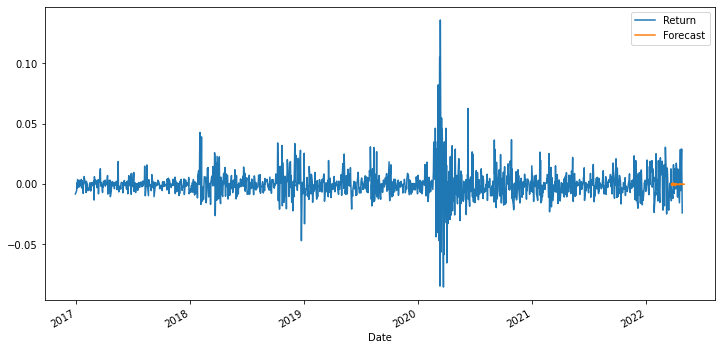

In [155]:
# Retrain the model on the complete dataset

model = AR(sp500_df["Return"])

# fit the model
ARfit = model.fit(maxlag=10,method='mle')

# Make predictions
forecast = ARfit.predict(start=len(sp500_df["Return"]), end=len(sp500_df["Return"])+28-1, dynamic=False).rename('Forecast')
forecast.index = pd.bdate_range(start_dt_ind,periods=28,
               freq='C',
               weekmask = weekmask,
               holidays=exclude)
# Plot the results
sp500_df["Return"].plot(legend=True)
forecast.plot(legend=True,figsize=(12,6));
forecast

# Nifty

In [156]:
# simple forecasting 
nifty_df_train = nifty_df["Return"].iloc[int(0.022*(len(nifty_df["Return"]))):]
nifty_df_test = nifty_df["Return"].iloc[:int(0.022*(len(nifty_df["Return"])))]
print('\n',nifty_df.shape)
print('\n',nifty_df_train.shape)
print('\n',nifty_df_test.shape)
print('\n',nifty_df_train.isnull().sum())
print('\n',nifty_df_test.isnull().sum())
model = AR(nifty_df_train)
ARfit = model.fit(maxlag=10,method='mle') 
ARfit.summary()

C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'



 (1310, 7)

 (1282,)

 (28,)

 0

 0


C:\Shashwat\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               AR Model Results                               
==============================================================================
Dep. Variable:                      R  -                  e                  t
Model:                         AR(10)   Log Likelihood                3902.567
Method:                           mle   S.D. of innovations              0.012
Date:                Tue, 03 May 2022   AIC                             -8.908
Time:                        22:17:17   BIC                             -8.859
Sample:                             0   HQIC                            -8.890
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0004      0.000     -1.291      0.197      -0.001       0.000
L1.Return     -0.0208      0.028     -0.746      0.456      -0.075       0.034
L2.Return      0.0216      0.028      0.777      0.437      -0.033       0.076
L3.Return     -0.0063      0.028     -0.227      0.820      -0.061       0.048
L4.Return      0.0366      0.028      1.320      0.187      -0.018       0.091
L5.Return      0.1352      0.028      4.913      0.000       0.081       0.189
L6.Return     -0.1275      0.028     -4.630      0.000      -0.181      -0.074
L7.Return      0.0943      0.028      3.395      0.001       0.040       0.149
L8.Return      0.0105      0.028      0.375      0.707      -0.044       0.065
L9.Return     -0.0416      0.028     -1.488      0.137      -0.096       0.013
L10.Return     0.0730      0.028      2.611      0.009       0.018       0.128
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -0.9638           -0.6253j            1.1489           -0.4084
AR.2            -0.9638           +0.6253j            1.1489            0.4084
AR.3            -1.4278           -0.0000j            1.4278           -0.5000
AR.4            -0.2365           -1.2494j            1.2716           -0.2798
AR.5            -0.2365           +1.2494j            1.2716            0.2798
AR.6             0.4361           -1.2818j            1.3539           -0.1978
AR.7             0.4361           +1.2818j            1.3539            0.1978
AR.8             1.2676           -0.0000j            1.2676           -0.0000
AR.9             1.1291           -0.8117j            1.3906           -0.0992
AR.10            1.1291           +0.8117j            1.3906            0.0992
------------------------------------------------------------------------------
"""

In [157]:
#nifty_df["Return"].head(28)

In [158]:
#nifty_df_test_tmp = nifty_df_test
#nifty_df_test_tmp

C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


<AxesSubplot:xlabel='Date'>

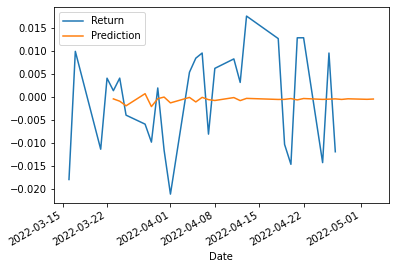

In [159]:
start=len(nifty_df_train)
end=len(nifty_df_train)+len(nifty_df_test)-1
prediction = ARfit.predict(start = start ,end = end, dynamic=False).rename('Prediction')
prediction.index = pd.bdate_range(start_dt_ind,periods=28,
               freq='C',
               weekmask = weekmask,
               holidays=exclude)
nifty_df_test.plot(legend=True)
prediction.plot(legend=True)
#prediction

In [160]:
#prediction_tmp = prediction
#prediction_tmp.shape
#prediction_tmp.index = pd.to_datetime(prediction_tmp.index).date
#prediction_tmp.index = pd.to_datetime(prediction_tmp.index).date_range('2022-03-17', periods=28, freq='B')
#prediction_tmp.index = pd.date_range('2022-03-17', periods=28, freq='B')
#weekmask = 'Mon Tue Wed Thu Fri'
#exclude = [pd.datetime(2022, 4, 15),           pd.datetime(2022, 4, 14),           pd.datetime(2022, 3, 18)]
#pd.bdate_range(start='2022-03-17', periods=28, freq='B', holidays=['2022-04-17', '2015-07-04', '2015-07-06', '2015-07-07','2015-07-08'])
#pd.bdate_range('2022-03-17',periods=28,               freq='C',               weekmask = weekmask,               holidays=exclude)
#prediction_tmp.index = pd.bdate_range('2022-03-17',periods=28,               freq='C',               weekmask = weekmask,               holidays=exclude)

In [161]:
#nifty_df_test.plot(legend=True)

In [162]:
#prediction.plot(legend=True)

In [163]:
error = MSE(nifty_df_test, prediction)
error

0.00011628633090436868

C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
C:\Shashwat\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


2022-03-23   -0.000511
2022-03-24   -0.000861
2022-03-25   -0.001892
2022-03-28    0.000693
2022-03-29   -0.002145
2022-03-30   -0.000365
2022-03-31   -0.000031
2022-04-01   -0.001304
2022-04-04   -0.000140
2022-04-05   -0.001095
2022-04-06   -0.000117
2022-04-07   -0.000619
2022-04-08   -0.000784
2022-04-11   -0.000171
2022-04-12   -0.000818
2022-04-13   -0.000345
2022-04-18   -0.000572
2022-04-19   -0.000544
2022-04-20   -0.000392
2022-04-21   -0.000667
2022-04-22   -0.000375
2022-04-25   -0.000562
2022-04-26   -0.000510
2022-04-27   -0.000457
2022-04-28   -0.000566
2022-04-29   -0.000439
2022-05-02   -0.000546
2022-05-03   -0.000487
Freq: C, Name: Forecast, dtype: float64

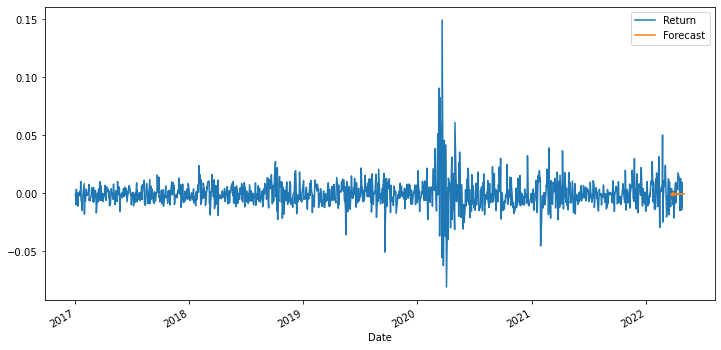

In [164]:
# Retrain the model on the complete dataset

model = AR(nifty_df["Return"])

# fit the model
ARfit = model.fit(maxlag=10,method='mle')

# Make predictions
forecast = ARfit.predict(start=len(nifty_df["Return"]), end=len(nifty_df["Return"])+28-1, dynamic=False).rename('Forecast')
forecast.index = pd.bdate_range(start_dt_ind,periods=28,
               freq='C',
               weekmask = weekmask,
               holidays=exclude)
# Plot the results
nifty_df["Return"].plot(legend=True)
forecast.plot(legend=True,figsize=(12,6));
forecast

# ARIMA Data modelling , measures and forecasting using Auto Arima predicted order for p d q

# Maruti

In [165]:
# ARIMA
maruti_df_train = maruti_df["Return"].iloc[int(0.022*(len(maruti_df["Return"]))):]
maruti_df_test = maruti_df["Return"].iloc[:int(0.022*(len(maruti_df["Return"])))]
print('\n',maruti_df.shape)
print('\n',maruti_df_train.shape)
print('\n',maruti_df_test.shape)
print('\n',maruti_df_train.isnull().sum())
print('\n',maruti_df_test.isnull().sum())

arima_model = ARIMA(maruti_df_train,order=(0,0,0))
model = arima_model.fit()
model.summary()



 (1314, 7)

 (1286,)

 (28,)

 0

 0


C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 Return   No. Observations:                 1286
Model:                     ARMA(0, 0)   Log Likelihood                3211.003
Method:                           css   S.D. of innovations              0.020
Date:                Tue, 03 May 2022   AIC                          -6418.006
Time:                        22:17:18   BIC                          -6407.688
Sample:                             0   HQIC                         -6414.133
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9.141e-05      0.001     -0.165      0.869      -0.001       0.001
==============================================================================
"""


 RMSE:  0.014450071343759707


C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


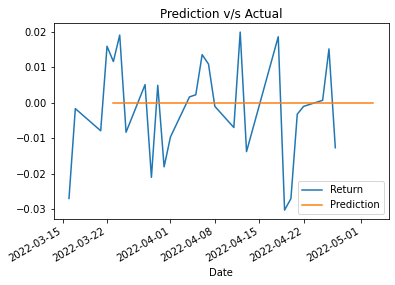

In [166]:
start=len(maruti_df_train)
end=len(maruti_df_train)+len(maruti_df_test)-1
prediction = model.predict(start = start ,end = end, dynamic=False).rename('Prediction')

prediction.index = pd.bdate_range(start_dt_ind,periods=28,
               freq='C',
               weekmask = weekmask,
               holidays=exclude)
maruti_df_test.plot(legend=True,title="Prediction v/s Actual")
prediction.plot(legend=True)
#prediction
RMSE = rmse(maruti_df_test, prediction)
print('\n RMSE: ',RMSE)

C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


2022-03-23   -0.000127
2022-03-24   -0.000127
2022-03-25   -0.000127
2022-03-28   -0.000127
2022-03-29   -0.000127
2022-03-30   -0.000127
2022-03-31   -0.000127
2022-04-01   -0.000127
2022-04-04   -0.000127
2022-04-05   -0.000127
2022-04-06   -0.000127
2022-04-07   -0.000127
2022-04-08   -0.000127
2022-04-11   -0.000127
2022-04-12   -0.000127
2022-04-13   -0.000127
2022-04-18   -0.000127
2022-04-19   -0.000127
2022-04-20   -0.000127
2022-04-21   -0.000127
2022-04-22   -0.000127
2022-04-25   -0.000127
2022-04-26   -0.000127
2022-04-27   -0.000127
2022-04-28   -0.000127
2022-04-29   -0.000127
2022-05-02   -0.000127
2022-05-03   -0.000127
Freq: C, Name: Forecast, dtype: float64

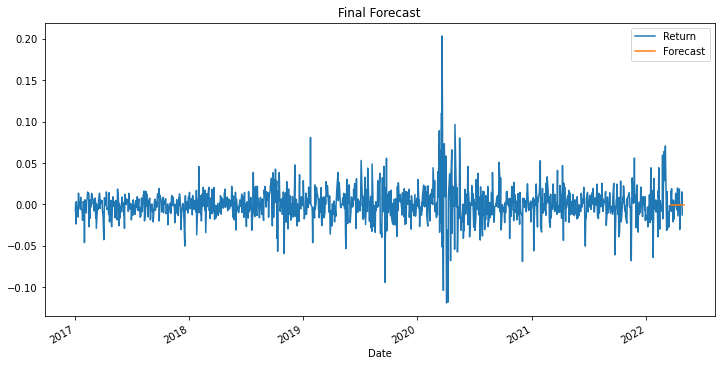

In [167]:
# Retrain the model on the complete dataset

f_model = ARIMA(maruti_df["Return"],order=(0,0,0))
# fit the model
arima_final = f_model.fit()
# Make predictions
forecast = arima_final.predict(len(maruti_df["Return"]),len(maruti_df["Return"])+28-1,typ='levels').rename('Forecast')
forecast.index = pd.bdate_range(start_dt_ind,periods=28,
               freq='C',
               weekmask = weekmask,
               holidays=exclude)
# Plot the results			   
maruti_df["Return"].plot(legend=True,figsize=(12,6),title="Final Forecast")
forecast.plot(legend=True)
forecast

# Tata Motors

In [168]:
# ARIMA
tatam_df_train = tatam_df["Return"].iloc[int(0.022*(len(tatam_df["Return"]))):]
tatam_df_test = tatam_df["Return"].iloc[:int(0.022*(len(tatam_df["Return"])))]
print('\n',tatam_df.shape)
print('\n',tatam_df_train.shape)
print('\n',tatam_df_test.shape)
print('\n',tatam_df_train.isnull().sum())
print('\n',tatam_df_test.isnull().sum())

arima_model = ARIMA(tatam_df_train,order=(1,0,1))
model = arima_model.fit()
model.summary()

C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'



 (1314, 7)

 (1286,)

 (28,)

 0

 0


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 Return   No. Observations:                 1286
Model:                     ARMA(1, 1)   Log Likelihood                2678.826
Method:                       css-mle   S.D. of innovations              0.030
Date:                Tue, 03 May 2022   AIC                          -5349.652
Time:                        22:17:18   BIC                          -5329.015
Sample:                             0   HQIC                         -5341.905
                                                                              
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0006      0.001      0.453      0.650      -0.002       0.003
ar.L1.Return     0.9296      0.039     24.043      0.000       0.854       1.005
ma.L1.Return    -0.8968      0.046    -19.630      0.000      -0.986      -0.807
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0758           +0.0000j            1.0758            0.0000
MA.1            1.1151           +0.0000j            1.1151            0.0000
-----------------------------------------------------------------------------
"""


 RMSE:  0.017421887405543755


C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


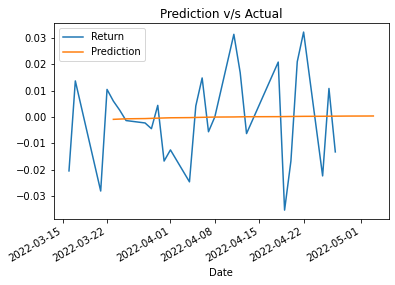

In [169]:
start=len(tatam_df_train)
end=len(tatam_df_train)+len(tatam_df_test)-1
prediction = model.predict(start = start ,end = end, dynamic=False).rename('Prediction')

prediction.index = pd.bdate_range(start_dt_ind,periods=28,
               freq='C',
               weekmask = weekmask,
               holidays=exclude)
tatam_df_test.plot(legend=True,title="Prediction v/s Actual")
prediction.plot(legend=True)
#prediction
RMSE = rmse(tatam_df_test, prediction)
print('\n RMSE: ',RMSE)

C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


2022-03-23   -0.000935
2022-03-24   -0.000831
2022-03-25   -0.000735
2022-03-28   -0.000645
2022-03-29   -0.000562
2022-03-30   -0.000485
2022-03-31   -0.000414
2022-04-01   -0.000347
2022-04-04   -0.000285
2022-04-05   -0.000228
2022-04-06   -0.000175
2022-04-07   -0.000125
2022-04-08   -0.000079
2022-04-11   -0.000036
2022-04-12    0.000003
2022-04-13    0.000040
2022-04-18    0.000074
2022-04-19    0.000106
2022-04-20    0.000136
2022-04-21    0.000163
2022-04-22    0.000188
2022-04-25    0.000212
2022-04-26    0.000234
2022-04-27    0.000254
2022-04-28    0.000273
2022-04-29    0.000291
2022-05-02    0.000307
2022-05-03    0.000322
Freq: C, Name: Forecast, dtype: float64

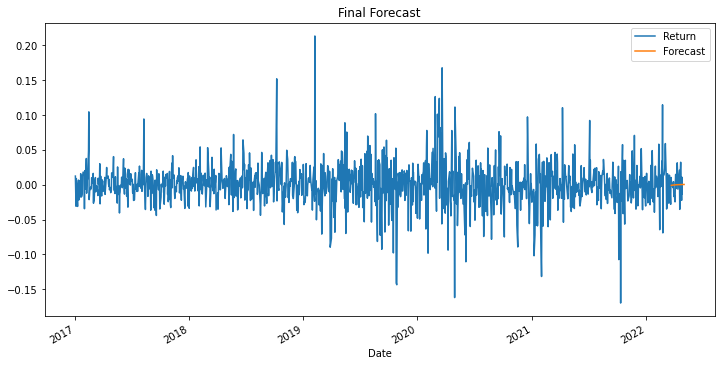

In [170]:
# Retrain the model on the complete dataset

f_model = ARIMA(tatam_df["Return"],order=(1,0,1))
# fit the model
arima_final = f_model.fit()
# Make predictions
forecast = arima_final.predict(len(tatam_df["Return"]),len(tatam_df["Return"])+28-1,typ='levels').rename('Forecast')
forecast.index = pd.bdate_range(start_dt_ind,periods=28,
               freq='C',
               weekmask = weekmask,
               holidays=exclude)
# Plot the results			   
tatam_df["Return"].plot(legend=True,figsize=(12,6),title="Final Forecast")
forecast.plot(legend=True)
forecast

# Hero

In [171]:
# ARIMA
herom_df_train = herom_df["Return"].iloc[int(0.022*(len(herom_df["Return"]))):]
herom_df_test = herom_df["Return"].iloc[:int(0.022*(len(herom_df["Return"])))]
print('\n',herom_df.shape)
print('\n',herom_df_train.shape)
print('\n',herom_df_test.shape)
print('\n',herom_df_train.isnull().sum())
print('\n',herom_df_test.isnull().sum())

arima_model = ARIMA(herom_df_train,order=(0,0,2))
model = arima_model.fit()
model.summary()


 (1314, 7)

 (1286,)

 (28,)

 0

 0


C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 Return   No. Observations:                 1286
Model:                     ARMA(0, 2)   Log Likelihood                3270.808
Method:                       css-mle   S.D. of innovations              0.019
Date:                Tue, 03 May 2022   AIC                          -6533.616
Time:                        22:17:19   BIC                          -6512.978
Sample:                             0   HQIC                         -6525.868
                                                                              
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0002      0.000      0.503      0.615      -0.001       0.001
ma.L1.Return    -0.0497      0.028     -1.783      0.075      -0.104       0.005
ma.L2.Return    -0.0464      0.028     -1.670      0.095      -0.101       0.008
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            4.1367           +0.0000j            4.1367            0.0000
MA.2           -5.2079           +0.0000j            5.2079            0.5000
-----------------------------------------------------------------------------
"""


 RMSE:  0.02260960907846438


C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


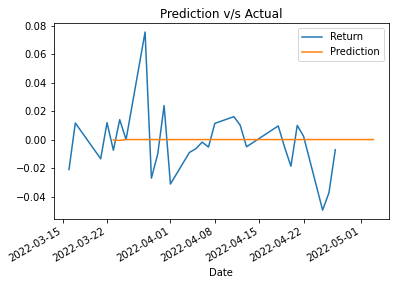

In [172]:
start=len(herom_df_train)
end=len(herom_df_train)+len(herom_df_test)-1
prediction = model.predict(start = start ,end = end, dynamic=False).rename('Prediction')

prediction.index = pd.bdate_range(start_dt_ind,periods=28,
               freq='C',
               weekmask = weekmask,
               holidays=exclude)
herom_df_test.plot(legend=True,title="Prediction v/s Actual")
prediction.plot(legend=True)
#prediction
RMSE = rmse(herom_df_test, prediction)
print('\n RMSE: ',RMSE)

C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


2022-03-23   -0.000122
2022-03-24   -0.000403
2022-03-25    0.000196
2022-03-28    0.000196
2022-03-29    0.000196
2022-03-30    0.000196
2022-03-31    0.000196
2022-04-01    0.000196
2022-04-04    0.000196
2022-04-05    0.000196
2022-04-06    0.000196
2022-04-07    0.000196
2022-04-08    0.000196
2022-04-11    0.000196
2022-04-12    0.000196
2022-04-13    0.000196
2022-04-18    0.000196
2022-04-19    0.000196
2022-04-20    0.000196
2022-04-21    0.000196
2022-04-22    0.000196
2022-04-25    0.000196
2022-04-26    0.000196
2022-04-27    0.000196
2022-04-28    0.000196
2022-04-29    0.000196
2022-05-02    0.000196
2022-05-03    0.000196
Freq: C, Name: Forecast, dtype: float64

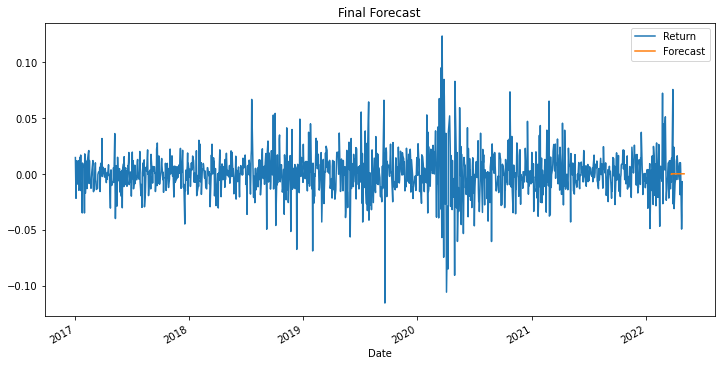

In [173]:
# Retrain the model on the complete dataset

f_model = ARIMA(herom_df["Return"],order=(0,0,2))
# fit the model
arima_final = f_model.fit()
# Make predictions
forecast = arima_final.predict(len(herom_df["Return"]),len(herom_df["Return"])+28-1,typ='levels').rename('Forecast')
forecast.index = pd.bdate_range(start_dt_ind,periods=28,
               freq='C',
               weekmask = weekmask,
               holidays=exclude)
# Plot the results			   
herom_df["Return"].plot(legend=True,figsize=(12,6),title="Final Forecast")
forecast.plot(legend=True)
forecast

# TVS

In [174]:
# ARIMA
tvsm_df_train = tvsm_df["Return"].iloc[int(0.022*(len(tvsm_df["Return"]))):]
tvsm_df_test = tvsm_df["Return"].iloc[:int(0.022*(len(tvsm_df["Return"])))]
print('\n',tvsm_df.shape)
print('\n',tvsm_df_train.shape)
print('\n',tvsm_df_test.shape)
print('\n',tvsm_df_train.isnull().sum())
print('\n',tvsm_df_test.isnull().sum())

arima_model = ARIMA(tvsm_df_train,order=(0,0,0))
model = arima_model.fit()
model.summary()


 (1314, 7)

 (1286,)

 (28,)

 0

 0


C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 Return   No. Observations:                 1286
Model:                     ARMA(0, 0)   Log Likelihood                3117.157
Method:                           css   S.D. of innovations              0.021
Date:                Tue, 03 May 2022   AIC                          -6230.314
Time:                        22:17:19   BIC                          -6219.996
Sample:                             0   HQIC                         -6226.441
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002      0.001     -0.310      0.757      -0.001       0.001
==============================================================================
"""


 RMSE:  0.01394750198555509


C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


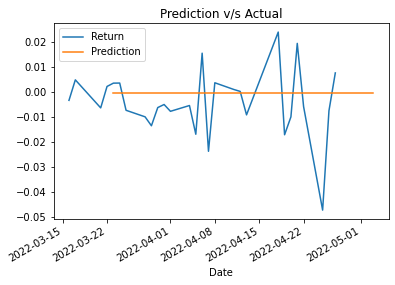

In [175]:

start=len(tvsm_df_train)
end=len(tvsm_df_train)+len(tvsm_df_test)-1
prediction = model.predict(start = start ,end = end, dynamic=False).rename('Prediction')

prediction.index = pd.bdate_range(start_dt_ind,periods=28,
               freq='C',
               weekmask = weekmask,
               holidays=exclude)
tvsm_df_test.plot(legend=True,title="Prediction v/s Actual")
prediction.plot(legend=True)
#prediction
RMSE = rmse(tvsm_df_test, prediction)
print('\n RMSE: ',RMSE)

C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


2022-03-23   -0.000268
2022-03-24   -0.000268
2022-03-25   -0.000268
2022-03-28   -0.000268
2022-03-29   -0.000268
2022-03-30   -0.000268
2022-03-31   -0.000268
2022-04-01   -0.000268
2022-04-04   -0.000268
2022-04-05   -0.000268
2022-04-06   -0.000268
2022-04-07   -0.000268
2022-04-08   -0.000268
2022-04-11   -0.000268
2022-04-12   -0.000268
2022-04-13   -0.000268
2022-04-18   -0.000268
2022-04-19   -0.000268
2022-04-20   -0.000268
2022-04-21   -0.000268
2022-04-22   -0.000268
2022-04-25   -0.000268
2022-04-26   -0.000268
2022-04-27   -0.000268
2022-04-28   -0.000268
2022-04-29   -0.000268
2022-05-02   -0.000268
2022-05-03   -0.000268
Freq: C, Name: Forecast, dtype: float64

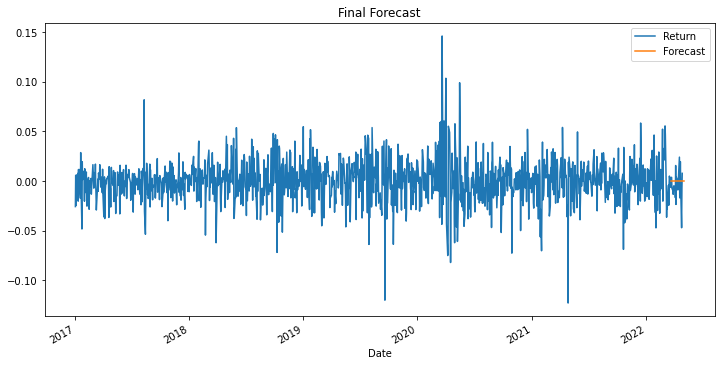

In [176]:

# Retrain the model on the complete dataset

f_model = ARIMA(tvsm_df["Return"],order=(0,0,0))
# fit the model
arima_final = f_model.fit()
# Make predictions
forecast = arima_final.predict(len(tvsm_df["Return"]),len(tvsm_df["Return"])+28-1,typ='levels').rename('Forecast')
forecast.index = pd.bdate_range(start_dt_ind,periods=28,
               freq='C',
               weekmask = weekmask,
               holidays=exclude)
# Plot the results			   
tvsm_df["Return"].plot(legend=True,figsize=(12,6),title="Final Forecast")
forecast.plot(legend=True)
forecast

# Bajaj

In [177]:
# ARIMA
bajajm_df_train = bajajm_df["Return"].iloc[int(0.022*(len(bajajm_df["Return"]))):]
bajajm_df_test = bajajm_df["Return"].iloc[:int(0.022*(len(bajajm_df["Return"])))]
print('\n',bajajm_df.shape)
print('\n',bajajm_df_train.shape)
print('\n',bajajm_df_test.shape)
print('\n',bajajm_df_train.isnull().sum())
print('\n',bajajm_df_test.isnull().sum())

arima_model = ARIMA(bajajm_df_train,order=(0,0,0))
model = arima_model.fit()
model.summary()


 (1314, 7)

 (1286,)

 (28,)

 0

 0


C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 Return   No. Observations:                 1286
Model:                     ARMA(0, 0)   Log Likelihood                3435.113
Method:                           css   S.D. of innovations              0.017
Date:                Tue, 03 May 2022   AIC                          -6866.227
Time:                        22:17:20   BIC                          -6855.908
Sample:                             0   HQIC                         -6862.353
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002      0.000     -0.464      0.642      -0.001       0.001
==============================================================================
"""


 RMSE:  0.016115243997865396


C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


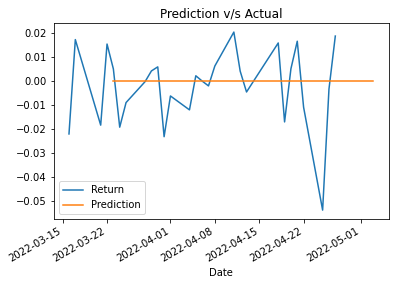

In [178]:
start=len(bajajm_df_train)
end=len(bajajm_df_train)+len(bajajm_df_test)-1
prediction = model.predict(start = start ,end = end, dynamic=False).rename('Prediction')

prediction.index = pd.bdate_range(start_dt_ind,periods=28,
               freq='C',
               weekmask = weekmask,
               holidays=exclude)
bajajm_df_test.plot(legend=True,title="Prediction v/s Actual")
prediction.plot(legend=True)
#prediction
RMSE = rmse(bajajm_df_test, prediction)
print('\n RMSE: ',RMSE)

C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


2022-03-23   -0.000264
2022-03-24   -0.000264
2022-03-25   -0.000264
2022-03-28   -0.000264
2022-03-29   -0.000264
2022-03-30   -0.000264
2022-03-31   -0.000264
2022-04-01   -0.000264
2022-04-04   -0.000264
2022-04-05   -0.000264
2022-04-06   -0.000264
2022-04-07   -0.000264
2022-04-08   -0.000264
2022-04-11   -0.000264
2022-04-12   -0.000264
2022-04-13   -0.000264
2022-04-18   -0.000264
2022-04-19   -0.000264
2022-04-20   -0.000264
2022-04-21   -0.000264
2022-04-22   -0.000264
2022-04-25   -0.000264
2022-04-26   -0.000264
2022-04-27   -0.000264
2022-04-28   -0.000264
2022-04-29   -0.000264
2022-05-02   -0.000264
2022-05-03   -0.000264
Freq: C, Name: Forecast, dtype: float64

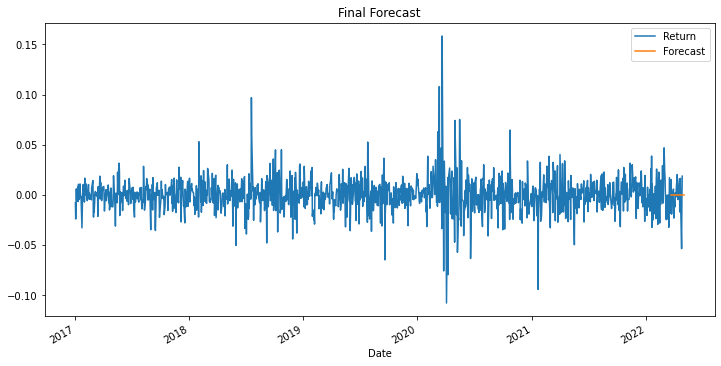

In [179]:
# Retrain the model on the complete dataset

f_model = ARIMA(bajajm_df["Return"],order=(0,0,0))
# fit the model
arima_final = f_model.fit()
# Make predictions
forecast = arima_final.predict(len(bajajm_df["Return"]),len(bajajm_df["Return"])+28-1,typ='levels').rename('Forecast')
forecast.index = pd.bdate_range(start_dt_ind,periods=28,
               freq='C',
               weekmask = weekmask,
               holidays=exclude)
# Plot the results			   
bajajm_df["Return"].plot(legend=True,figsize=(12,6),title="Final Forecast")
forecast.plot(legend=True)
forecast

# INR USD

In [180]:
# ARIMA
inrusd_df_train = inrusd_df["Return"].iloc[int(0.0205*(len(inrusd_df["Return"]))):]
inrusd_df_test = inrusd_df["Return"].iloc[:int(0.0205*(len(inrusd_df["Return"])))]
print('\n',inrusd_df.shape)
print('\n',inrusd_df_train.shape)
print('\n',inrusd_df_test.shape)
print('\n',inrusd_df_train.isnull().sum())
print('\n',inrusd_df_test.isnull().sum())

arima_model = ARIMA(inrusd_df_train,order=(0,0,1))
model = arima_model.fit()
model.summary()

C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'



 (1386, 7)

 (1358,)

 (28,)

 0

 0


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 Return   No. Observations:                 1358
Model:                     ARMA(0, 1)   Log Likelihood                5498.663
Method:                       css-mle   S.D. of innovations              0.004
Date:                Tue, 03 May 2022   AIC                         -10991.327
Time:                        22:17:20   BIC                         -10975.685
Sample:                             0   HQIC                        -10985.471
                                                                              
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -7.288e-05   9.17e-05     -0.795      0.427      -0.000       0.000
ma.L1.Return    -0.1993      0.027     -7.329      0.000      -0.253      -0.146
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            5.0185           +0.0000j            5.0185            0.0000
-----------------------------------------------------------------------------
"""


 RMSE:  0.0031179922547562855


C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


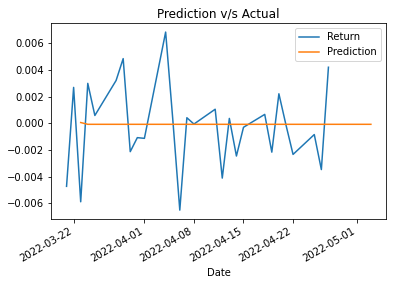

In [181]:
start=len(inrusd_df_train)
end=len(inrusd_df_train)+len(inrusd_df_test)-1
prediction = model.predict(start = start ,end = end, dynamic=False).rename('Prediction')

prediction.index = pd.bdate_range(start_dt_ind,periods=28,
               freq='C',
               weekmask = weekmask,
               holidays=exclude)
inrusd_df_test.plot(legend=True,title="Prediction v/s Actual")
prediction.plot(legend=True)
#prediction
RMSE = rmse(inrusd_df_test, prediction)
print('\n RMSE: ',RMSE)

C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


2022-03-23    0.000057
2022-03-24   -0.000077
2022-03-25   -0.000077
2022-03-28   -0.000077
2022-03-29   -0.000077
2022-03-30   -0.000077
2022-03-31   -0.000077
2022-04-01   -0.000077
2022-04-04   -0.000077
2022-04-05   -0.000077
2022-04-06   -0.000077
2022-04-07   -0.000077
2022-04-08   -0.000077
2022-04-11   -0.000077
2022-04-12   -0.000077
2022-04-13   -0.000077
2022-04-18   -0.000077
2022-04-19   -0.000077
2022-04-20   -0.000077
2022-04-21   -0.000077
2022-04-22   -0.000077
2022-04-25   -0.000077
2022-04-26   -0.000077
2022-04-27   -0.000077
2022-04-28   -0.000077
2022-04-29   -0.000077
2022-05-02   -0.000077
2022-05-03   -0.000077
Freq: C, Name: Forecast, dtype: float64

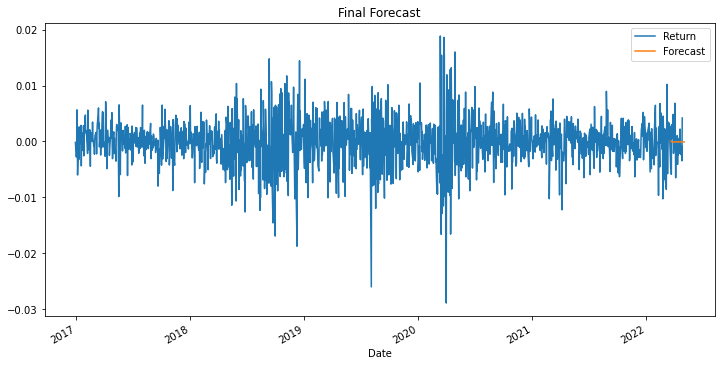

In [182]:
# Retrain the model on the complete dataset

f_model = ARIMA(inrusd_df["Return"],order=(0,0,1))
# fit the model
arima_final = f_model.fit()
# Make predictions
forecast = arima_final.predict(len(inrusd_df["Return"]),len(inrusd_df["Return"])+28-1,typ='levels').rename('Forecast')
forecast.index = pd.bdate_range(start_dt_ind,periods=28,
               freq='C',
               weekmask = weekmask,
               holidays=exclude)
# Plot the results			   
inrusd_df["Return"].plot(legend=True,figsize=(12,6),title="Final Forecast")
forecast.plot(legend=True)
forecast

# S&P 500

In [183]:
# ARIMA
sp500_df_train = sp500_df["Return"].iloc[int(0.021*(len(sp500_df["Return"]))):]
sp500_df_test = sp500_df["Return"].iloc[:int(0.021*(len(sp500_df["Return"])))]
print('\n',sp500_df.shape)
print('\n',sp500_df_train.shape)
print('\n',sp500_df_test.shape)
print('\n',sp500_df_train.isnull().sum())
print('\n',sp500_df_test.isnull().sum())

arima_model = ARIMA(sp500_df_train,order=(3,0,0))
model = arima_model.fit()
model.summary()


 (1340, 7)

 (1312,)

 (28,)

 0

 0


C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 Return   No. Observations:                 1312
Model:                     ARMA(3, 0)   Log Likelihood                3946.113
Method:                       css-mle   S.D. of innovations              0.012
Date:                Tue, 03 May 2022   AIC                          -7882.226
Time:                        22:17:20   BIC                          -7856.329
Sample:                             0   HQIC                         -7872.514
                                                                              
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0005      0.000     -1.392      0.164      -0.001       0.000
ar.L1.Return    -0.1948      0.028     -7.064      0.000      -0.249      -0.141
ar.L2.Return     0.1274      0.028      4.567      0.000       0.073       0.182
ar.L3.Return     0.0537      0.028      1.944      0.052      -0.000       0.108
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3939           -0.0000j            2.3939           -0.0000
AR.2           -2.3838           -1.4497j            2.7900           -0.4130
AR.3           -2.3838           +1.4497j            2.7900            0.4130
-----------------------------------------------------------------------------
"""


 RMSE:  0.013053254396321823


C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


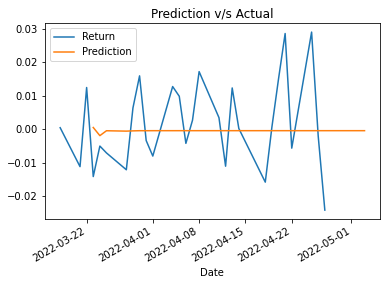

In [184]:
start=len(sp500_df_train)
end=len(sp500_df_train)+len(sp500_df_test)-1
prediction = model.predict(start = start ,end = end, dynamic=False).rename('Prediction')

prediction.index = pd.bdate_range(start_dt_ind,periods=28,
               freq='C',
               weekmask = weekmask,
               holidays=exclude)
sp500_df_test.plot(legend=True,title="Prediction v/s Actual")
prediction.plot(legend=True)
#prediction
RMSE = rmse(sp500_df_test, prediction)
print('\n RMSE: ',RMSE)

C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


2022-03-23    0.000554
2022-03-24   -0.001861
2022-03-25   -0.000452
2022-03-28   -0.000524
2022-03-29   -0.000472
2022-03-30   -0.000413
2022-03-31   -0.000422
2022-04-01   -0.000410
2022-04-04   -0.000410
2022-04-05   -0.000409
2022-04-06   -0.000409
2022-04-07   -0.000409
2022-04-08   -0.000409
2022-04-11   -0.000409
2022-04-12   -0.000409
2022-04-13   -0.000409
2022-04-18   -0.000409
2022-04-19   -0.000409
2022-04-20   -0.000409
2022-04-21   -0.000409
2022-04-22   -0.000409
2022-04-25   -0.000409
2022-04-26   -0.000409
2022-04-27   -0.000409
2022-04-28   -0.000409
2022-04-29   -0.000409
2022-05-02   -0.000409
2022-05-03   -0.000409
Freq: C, Name: Forecast, dtype: float64

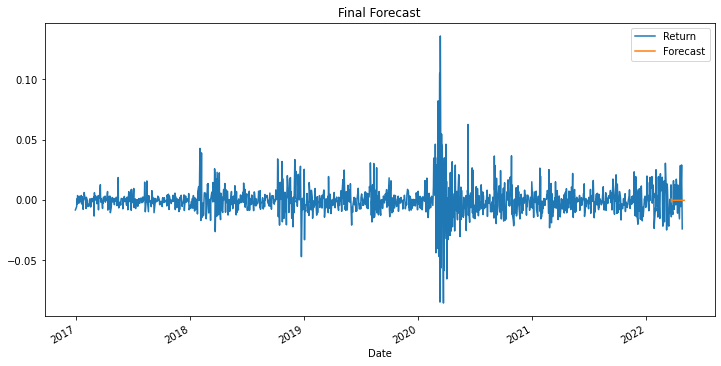

In [185]:
# Retrain the model on the complete dataset

f_model = ARIMA(sp500_df["Return"],order=(3,0,0))
# fit the model
arima_final = f_model.fit()
# Make predictions
forecast = arima_final.predict(len(sp500_df["Return"]),len(sp500_df["Return"])+28-1,typ='levels').rename('Forecast')
forecast.index = pd.bdate_range(start_dt_ind,periods=28,
               freq='C',
               weekmask = weekmask,
               holidays=exclude)
# Plot the results			   
sp500_df["Return"].plot(legend=True,figsize=(12,6),title="Final Forecast")
forecast.plot(legend=True)
forecast

# Nifty

In [186]:
# ARIMA
nifty_df_train = nifty_df["Return"].iloc[int(0.022*(len(nifty_df["Return"]))):]
nifty_df_test = nifty_df["Return"].iloc[:int(0.022*(len(nifty_df["Return"])))]
print('\n',nifty_df.shape)
print('\n',nifty_df_train.shape)
print('\n',nifty_df_test.shape)
print('\n',nifty_df_train.isnull().sum())
print('\n',nifty_df_test.isnull().sum())

arima_model = ARIMA(nifty_df_train,order=(2,0,1))
model = arima_model.fit()
model.summary()


 (1310, 7)

 (1282,)

 (28,)

 0

 0


C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 Return   No. Observations:                 1282
Model:                     ARMA(2, 1)   Log Likelihood                3868.031
Method:                       css-mle   S.D. of innovations              0.012
Date:                Tue, 03 May 2022   AIC                          -7726.061
Time:                        22:17:21   BIC                          -7700.280
Sample:                             0   HQIC                         -7716.381
                                                                              
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0005      0.000     -1.618      0.106      -0.001       0.000
ar.L1.Return    -0.9232      0.071    -13.063      0.000      -1.062      -0.785
ar.L2.Return    -0.0806      0.028     -2.862      0.004      -0.136      -0.025
ma.L1.Return     0.8705      0.066     13.252      0.000       0.742       0.999
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.2114           +0.0000j            1.2114            0.5000
AR.2          -10.2416           +0.0000j           10.2416            0.5000
MA.1           -1.1488           +0.0000j            1.1488            0.5000
-----------------------------------------------------------------------------
"""


 RMSE:  0.010735781318766093


C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


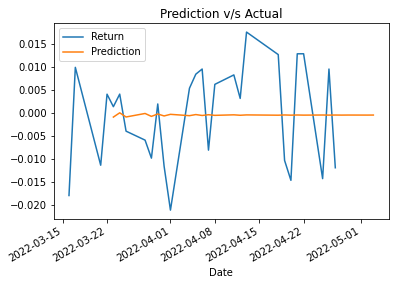

In [187]:
start=len(nifty_df_train)
end=len(nifty_df_train)+len(nifty_df_test)-1
prediction = model.predict(start = start ,end = end, dynamic=False).rename('Prediction')

prediction.index = pd.bdate_range(start_dt_ind,periods=28,
               freq='C',
               weekmask = weekmask,
               holidays=exclude)
nifty_df_test.plot(legend=True,title="Prediction v/s Actual")
prediction.plot(legend=True)
#prediction
RMSE = rmse(nifty_df_test, prediction)
print('\n RMSE: ',RMSE)

C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


2022-03-23   -0.000988
2022-03-24    0.000039
2022-03-25   -0.000958
2022-03-28   -0.000119
2022-03-29   -0.000814
2022-03-30   -0.000240
2022-03-31   -0.000715
2022-04-01   -0.000322
2022-04-04   -0.000647
2022-04-05   -0.000378
2022-04-06   -0.000600
2022-04-07   -0.000417
2022-04-08   -0.000568
2022-04-11   -0.000443
2022-04-12   -0.000547
2022-04-13   -0.000461
2022-04-18   -0.000532
2022-04-19   -0.000473
2022-04-20   -0.000522
2022-04-21   -0.000482
2022-04-22   -0.000515
2022-04-25   -0.000487
2022-04-26   -0.000510
2022-04-27   -0.000491
2022-04-28   -0.000507
2022-04-29   -0.000494
2022-05-02   -0.000505
2022-05-03   -0.000496
Freq: C, Name: Forecast, dtype: float64

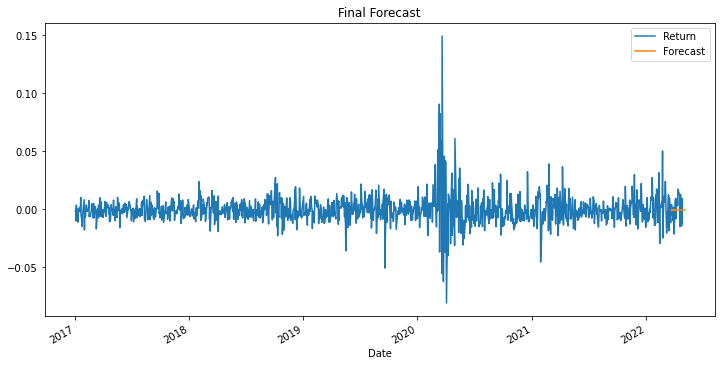

In [188]:
# Retrain the model on the complete dataset

f_model = ARIMA(nifty_df["Return"],order=(2,0,1))
# fit the model
arima_final = f_model.fit()
# Make predictions
forecast = arima_final.predict(len(nifty_df["Return"]),len(nifty_df["Return"])+28-1,typ='levels').rename('Forecast')
forecast.index = pd.bdate_range(start_dt_ind,periods=28,
               freq='C',
               weekmask = weekmask,
               holidays=exclude)
# Plot the results			   
nifty_df["Return"].plot(legend=True,figsize=(12,6),title="Final Forecast")
forecast.plot(legend=True)
forecast

# Multivariate Analysis

# Joining Return columns of all Stocks and External Variables into 1

In [189]:
maruti_df.rename(columns = {'Return':'Maruti_Return'}, inplace = True)
tatam_df.rename(columns = {'Return':'TataM_Return'}, inplace = True)
herom_df.rename(columns = {'Return':'HeroM_Return'}, inplace = True)
tvsm_df.rename(columns = {'Return':'TVSM_Return'}, inplace = True)
bajajm_df.rename(columns = {'Return':'BajajM_Return'}, inplace = True)
inrusd_df.rename(columns = {'Return':'INRUSD_Return'}, inplace = True)
sp500_df.rename(columns = {'Return':'S&P500_Return'}, inplace = True)
nifty_df.rename(columns = {'Return':'Nifty_Return'}, inplace = True)

In [190]:
returns = pd.merge(maruti_df["Maruti_Return"],tatam_df["TataM_Return"], how = 'inner', on = 'Date')
returns = pd.merge(returns,herom_df["HeroM_Return"], how = 'inner', on = 'Date')
returns = pd.merge(returns,tvsm_df["TVSM_Return"], how = 'inner', on = 'Date')
returns = pd.merge(returns,bajajm_df["BajajM_Return"], how = 'inner', on = 'Date')
returns = pd.merge(returns,inrusd_df["INRUSD_Return"], how = 'inner', on = 'Date')
returns = pd.merge(returns,sp500_df["S&P500_Return"], how = 'inner', on = 'Date')
returns = pd.merge(returns,nifty_df["Nifty_Return"], how = 'inner', on = 'Date')
#,herom_df["Return"],tvsm_df["Return"],bajajm_df["Return"],inrusd_df["Return"],sp500_df["Return"],nifty_df["Return"]

In [191]:
returns.head(28)

,Maruti_Return,TataM_Return,HeroM_Return,TVSM_Return,BajajM_Return,INRUSD_Return,S&P500_Return,Nifty_Return
Date,,,,,,,,
2022-04-27,-0.012646,-0.013301,-0.006872,0.007705,0.018582,0.004209,-0.024149,-0.011983
2022-04-26,0.015196,0.010808,-0.037100,-0.007428,-0.003469,-0.003468,-0.002094,0.009531
2022-04-25,0.000708,-0.022419,-0.049289,-0.047175,-0.053737,-0.000840,0.028961,-0.014351
2022-04-22,-0.000992,0.032224,0.002469,-0.005775,-0.010983,-0.002332,-0.005666,0.012858
2022-04-21,-0.003201,0.020964,0.010199,0.019517,0.016431,-0.000118,0.028532,0.012849
2022-04-20,-0.026970,-0.016739,-0.018467,-0.009875,0.004970,0.002218,0.014974,-0.014722
2022-04-19,-0.030209,-0.035410,-0.005099,-0.017032,-0.017093,-0.002161,0.000619,-0.010381
2022-04-18,0.018614,0.020826,0.009787,0.024040,0.015709,0.000671,-0.015804,0.012678
2022-04-13,-0.013732,-0.006339,-0.004813,-0.009070,-0.004657,0.000369,0.012293,0.017585


# Correlation between the Returns of all are not high

In [192]:
returns.corr()

,Maruti_Return,TataM_Return,HeroM_Return,TVSM_Return,BajajM_Return,INRUSD_Return,S&P500_Return,Nifty_Return
Maruti_Return,1.000000,0.468747,0.564217,0.529448,0.519608,-0.089373,0.203251,0.652254
TataM_Return,0.468747,1.000000,0.408942,0.430919,0.394207,-0.121238,0.136358,0.584845
HeroM_Return,0.564217,0.408942,1.000000,0.531196,0.639507,-0.061914,0.172802,0.567156
TVSM_Return,0.529448,0.430919,0.531196,1.000000,0.503425,-0.044900,0.126584,0.506122
BajajM_Return,0.519608,0.394207,0.639507,0.503425,1.000000,-0.108387,0.167655,0.571937
INRUSD_Return,-0.089373,-0.121238,-0.061914,-0.044900,-0.108387,1.000000,0.067820,-0.131899
S&P500_Return,0.203251,0.136358,0.172802,0.126584,0.167655,0.067820,1.000000,0.348582
Nifty_Return,0.652254,0.584845,0.567156,0.506122,0.571937,-0.131899,0.348582,1.000000


In [193]:
# view dataframe shape
print('\n',returns.shape)


 (1272, 8)


In [194]:
# view dataframe info()
returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1272 entries, 2022-04-27 to 2017-01-03
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Maruti_Return  1272 non-null   float64
 1   TataM_Return   1272 non-null   float64
 2   HeroM_Return   1272 non-null   float64
 3   TVSM_Return    1272 non-null   float64
 4   BajajM_Return  1272 non-null   float64
 5   INRUSD_Return  1272 non-null   float64
 6   S&P500_Return  1272 non-null   float64
 7   Nifty_Return   1272 non-null   float64
dtypes: float64(8)
memory usage: 89.4 KB


In [195]:
# view dataframe describe()
returns.describe()

,Maruti_Return,TataM_Return,HeroM_Return,TVSM_Return,BajajM_Return,INRUSD_Return,S&P500_Return,Nifty_Return
count,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000
mean,-0.000216,0.000481,0.000122,-0.000309,-0.000269,-0.000079,-0.000472,-0.000550
std,0.019863,0.029737,0.019225,0.021327,0.016885,0.004358,0.012383,0.011957
min,-0.119058,-0.169757,-0.115495,-0.123103,-0.108024,-0.028942,-0.085779,-0.080571
25%,-0.009385,-0.012891,-0.009313,-0.011277,-0.008177,-0.002277,-0.005725,-0.006684
50%,0.000131,-0.000178,-0.000029,0.000187,-0.000354,0.000147,-0.000882,-0.001045
75%,0.008709,0.013903,0.009047,0.010380,0.007505,0.002357,0.003205,0.004535
max,0.203502,0.213338,0.123577,0.146220,0.158482,0.018889,0.136158,0.149167


<AxesSubplot:xlabel='Maruti_Return', ylabel='count'>

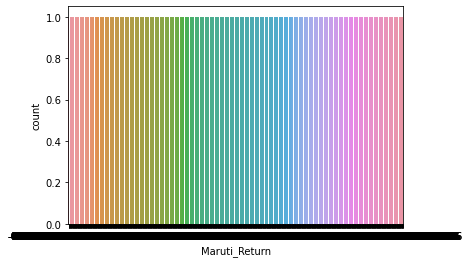

In [196]:
sns.countplot(returns['Maruti_Return'])

<AxesSubplot:xlabel='Maruti_Return', ylabel='Density'>

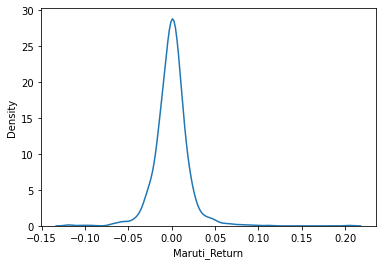

In [197]:
sns.kdeplot(returns['Maruti_Return'])

# The Granger values in the table are the P-Values. P-Values lesser than the significance level (0.05), implies the Null Hypothesis that the coefficients of the corresponding past values is zero, that is, the X does not cause Y can be rejected. Hence its rejected for all except Bajaj Motors

In [198]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(returns, variables = returns.columns)        

,Maruti_Return_x,TataM_Return_x,HeroM_Return_x,TVSM_Return_x,BajajM_Return_x,INRUSD_Return_x,S&P500_Return_x,Nifty_Return_x
Maruti_Return_y,1.0000,0.0124,0.0077,0.0965,0.0646,0.0000,0.0000,0.0000
TataM_Return_y,0.0000,1.0000,0.2715,0.0039,0.0137,0.0001,0.0009,0.0000
HeroM_Return_y,0.0140,0.1066,1.0000,0.0369,0.0157,0.0000,0.0000,0.0000
TVSM_Return_y,0.0261,0.1184,0.2781,1.0000,0.0036,0.0000,0.0003,0.0001
BajajM_Return_y,0.3440,0.0669,0.0003,0.0104,1.0000,0.0000,0.0000,0.0001
INRUSD_Return_y,0.0002,0.3301,0.0000,0.0008,0.0025,1.0000,0.0027,0.0000
S&P500_Return_y,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000
Nifty_Return_y,0.0026,0.0014,0.0000,0.0000,0.0845,0.0000,0.0000,1.0000


In [199]:
# Train Test
returns_train = returns.iloc[int((1-.9777)*(len(returns))):]
returns_test = returns.iloc[:int((1-.9777)*(len(returns)))]
print('\n',returns.shape)
print('\n',returns_train.shape)
print('\n',returns_test.shape)
print('\n',returns_train.isnull().sum())
print('\n',returns_test.isnull().sum())


 (1272, 8)

 (1244, 8)

 (28, 8)

 Maruti_Return    0
TataM_Return     0
HeroM_Return     0
TVSM_Return      0
BajajM_Return    0
INRUSD_Return    0
S&P500_Return    0
Nifty_Return     0
dtype: int64

 Maruti_Return    0
TataM_Return     0
HeroM_Return     0
TVSM_Return      0
BajajM_Return    0
INRUSD_Return    0
S&P500_Return    0
Nifty_Return     0
dtype: int64


In [200]:
returns_train.head(5)

,Maruti_Return,TataM_Return,HeroM_Return,TVSM_Return,BajajM_Return,INRUSD_Return,S&P500_Return,Nifty_Return
Date,,,,,,,,
2022-03-15,-0.008777,-0.026477,-0.021566,-0.024438,-0.032425,0.002940,-0.021894,-0.018400
2022-03-14,-0.013928,-0.004714,0.010136,-0.004287,-0.000434,0.003446,-0.020960,0.012501
2022-03-11,-0.029275,0.015667,-0.004569,-0.017982,-0.008559,-0.005777,0.007476,-0.014276
2022-03-10,0.015382,0.003468,-0.004483,-0.028112,-0.000190,-0.002299,0.013132,-0.002138
2022-03-09,-0.025645,-0.032650,-0.013035,-0.017337,-0.024355,0.010240,0.004310,-0.015038


In [201]:
returns_test

,Maruti_Return,TataM_Return,HeroM_Return,TVSM_Return,BajajM_Return,INRUSD_Return,S&P500_Return,Nifty_Return
Date,,,,,,,,
2022-04-27,-0.012646,-0.013301,-0.006872,0.007705,0.018582,0.004209,-0.024149,-0.011983
2022-04-26,0.015196,0.010808,-0.037100,-0.007428,-0.003469,-0.003468,-0.002094,0.009531
2022-04-25,0.000708,-0.022419,-0.049289,-0.047175,-0.053737,-0.000840,0.028961,-0.014351
2022-04-22,-0.000992,0.032224,0.002469,-0.005775,-0.010983,-0.002332,-0.005666,0.012858
2022-04-21,-0.003201,0.020964,0.010199,0.019517,0.016431,-0.000118,0.028532,0.012849
2022-04-20,-0.026970,-0.016739,-0.018467,-0.009875,0.004970,0.002218,0.014974,-0.014722
2022-04-19,-0.030209,-0.035410,-0.005099,-0.017032,-0.017093,-0.002161,0.000619,-0.010381
2022-04-18,0.018614,0.020826,0.009787,0.024040,0.015709,0.000671,-0.015804,0.012678
2022-04-13,-0.013732,-0.006339,-0.004813,-0.009070,-0.004657,0.000369,0.012293,0.017585


# AIC at order of 6 is the lowest among the 10 orders.

In [202]:
for i in [1,2,3,4,5,6,7,8,9,10]:
    model = VAR(returns_train)
    results = model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)    
    print('FPE : ', results.fpe)
    print('HQIC: ', results.hqic)
    print()

Order = 1
AIC:  -70.28091044714665
BIC:  -69.9840316196416
FPE :  3.0018520860929695e-31
HQIC:  -70.16927285914903

Order = 2
AIC:  -70.35351819080262
BIC:  -69.79238369507064
FPE :  2.79165153919078e-31
HQIC:  -70.14250214633671

Order = 3
AIC:  -70.3643364141356
BIC:  -69.53860349145958
FPE :  2.7616962685446373e-31
HQIC:  -70.05380509002842

Order = 4
AIC:  -70.33887873516342
BIC:  -69.24820389817135
FPE :  2.8330665617478364e-31
HQIC:  -69.92869500942841

Order = 5
AIC:  -70.38856316865346
BIC:  -69.03260219918263
FPE :  2.6959970497536855e-31
HQIC:  -69.87858961960056

Order = 6
AIC:  -70.39999257252403
BIC:  -68.77840051947729
FPE :  2.6657256633619583e-31
HQIC:  -69.79009147786647

Order = 7
AIC:  -70.37865274824726
BIC:  -68.4910839254413
FPE :  2.7237445667745534e-31
HQIC:  -69.66868608420502

Order = 8
AIC:  -70.40221723819178
BIC:  -68.24832522219731
FPE :  2.6609883547612116e-31
HQIC:  -69.59204667859159

Order = 9
AIC:  -70.39142038531953
BIC:  -67.97085801329341
FPE :  2.

C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Shashwat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A dat

In [203]:
x = model.select_order(maxlags=12)
x.summary()

,AIC,BIC,FPE,HQIC
0,-69.99,-69.95,4.023e-31,-69.98
1,-70.31,-70.01*,2.923e-31,-70.19*
2,-70.38,-69.81,2.730e-31,-70.16
3,-70.39,-69.56,2.692e-31,-70.08
4,-70.37,-69.27,2.758e-31,-69.95
5,-70.42,-69.06,2.609e-31,-69.91
6,-70.43*,-68.81,2.577e-31*,-69.82
7,-70.41,-68.52,2.636e-31,-69.70
8,-70.41,-68.25,2.636e-31,-69.60
9,-70.40,-67.97,2.672e-31,-69.49


In [204]:
#Fit VAR(1) Model
result = model.fit(6)
result.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 03, May, 2022
Time:                     22:17:36
--------------------------------------------------------------------
No. of Equations:         8.00000    BIC:                   -68.7784
Nobs:                     1238.00    HQIC:                  -69.7901
Log likelihood:           29916.4    FPE:                2.66573e-31
AIC:                     -70.4000    Det(Omega_mle):     1.95412e-31
--------------------------------------------------------------------
Results for equation Maruti_Return
                      coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------
const                   -0.000459         0.000563           -0.816           0.414
L1.Maruti_Return         0.038798         0.040860            0.950           0.342
L1.TataM_Return          0.039080       

In [205]:
# Get the lag order
lag_order = result.k_ar
print(lag_order)  

# Input data for forecasting
forecast_input = returns_train.values[-lag_order:]
forecast_input

6


array([[-0.01518465, -0.00577756, -0.0081867 ,  0.00775313,  0.00816615,
        -0.00323488, -0.00282165, -0.01098373],
       [-0.00288131, -0.03118645, -0.0090063 ,  0.00339016, -0.00642159,
         0.00066965,  0.        , -0.00634001],
       [-0.00759038, -0.00479855,  0.01190842,  0.00610778, -0.00580216,
        -0.00601091,  0.00356123,  0.00094099],
       [ 0.00345481,  0.00883977,  0.00136924, -0.0059416 ,  0.00590991,
         0.00225143, -0.00350463,  0.0036391 ],
       [-0.02356725, -0.03086727, -0.02176284, -0.02481799, -0.01441237,
         0.00566101,  0.00077126, -0.0100679 ],
       [ 0.00113595, -0.01140448, -0.00610668,  0.00572934, -0.02417949,
        -0.00199055, -0.00568972,  0.00021366]])

In [206]:
# Forecast
# Maruti_Return	TataM_Return	HeroM_Return	TVSM_Return	BajajM_Return	INRUSD_Return	S&P500_Return	Nifty_Return
fc = result.forecast(y=forecast_input, steps=28)
df_forecast = pd.DataFrame(fc, index=returns_test.index, columns=returns_train.columns )
df_forecast

,Maruti_Return,TataM_Return,HeroM_Return,TVSM_Return,BajajM_Return,INRUSD_Return,S&P500_Return,Nifty_Return
Date,,,,,,,,
2022-04-27,0.003601,0.013565,0.003483,0.007795,0.002778,0.000087,0.003940,0.000589
2022-04-26,-0.001232,-0.002818,-0.000884,-0.000780,0.001153,-0.001183,-0.004225,-0.000296
2022-04-25,0.000310,-0.001608,-0.000771,-0.001888,-0.001812,0.000859,0.002969,0.000882
2022-04-22,-0.000467,-0.002381,0.000436,-0.003886,-0.001104,0.000213,-0.002859,-0.003827
2022-04-21,0.002244,0.002641,-0.000722,0.002145,0.002312,-0.000472,0.002049,0.000922
2022-04-20,-0.003072,-0.004675,-0.000293,-0.001942,-0.002106,-0.000309,-0.002039,-0.002324
2022-04-19,0.002228,0.004015,0.002386,0.001532,0.002148,-0.000158,-0.000417,0.001060
2022-04-18,-0.001146,0.000793,0.000254,-0.000552,-0.000551,0.000049,-0.000271,-0.000716
2022-04-13,-0.000677,-0.001889,-0.001141,-0.001159,-0.000911,-0.000118,-0.000934,-0.001419


In [207]:
#check rmse
#Maruti_Return	TataM_Return	HeroM_Return	TVSM_Return	BajajM_Return	INRUSD_Return	S&P500_Return	Nifty_Return
RMSE = rmse(returns_test["Maruti_Return"], df_forecast["Maruti_Return"])
print('\n RMSE Maruti_Return: ',RMSE)  
RMSE = rmse(returns_test["TataM_Return"], df_forecast["TataM_Return"])
print('\n RMSE TataM_Return: ',RMSE)  
RMSE = rmse(returns_test["HeroM_Return"], df_forecast["HeroM_Return"])
print('\n RMSE HeroM_Return: ',RMSE)  
RMSE = rmse(returns_test["TVSM_Return"], df_forecast["TVSM_Return"])
print('\n RMSE TVSM_Return: ',RMSE)  
RMSE = rmse(returns_test["BajajM_Return"], df_forecast["BajajM_Return"])
print('\n RMSE BajajM_Return: ',RMSE)  
RMSE = rmse(returns_test["INRUSD_Return"], df_forecast["INRUSD_Return"])
print('\n RMSE INRUSD_Return: ',RMSE)  
RMSE = rmse(returns_test["S&P500_Return"], df_forecast["S&P500_Return"])
print('\n RMSE S&P500_Return: ',RMSE)  
RMSE = rmse(returns_test["Nifty_Return"], df_forecast["Nifty_Return"])
print('\n RMSE Nifty_Return: ',RMSE)  


 RMSE Maruti_Return:  0.014655398669264647

 RMSE TataM_Return:  0.018062758222862286

 RMSE HeroM_Return:  0.022568720379120912

 RMSE TVSM_Return:  0.013539509734000855

 RMSE BajajM_Return:  0.015820076989871496

 RMSE INRUSD_Return:  0.0031308353615333785

 RMSE S&P500_Return:  0.01327135958694669

 RMSE Nifty_Return:  0.01101764982203812


<AxesSubplot:title={'center':'Final Forecast'}, xlabel='Date'>

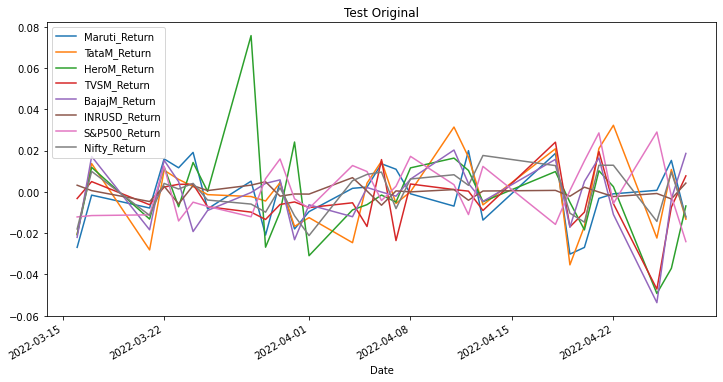

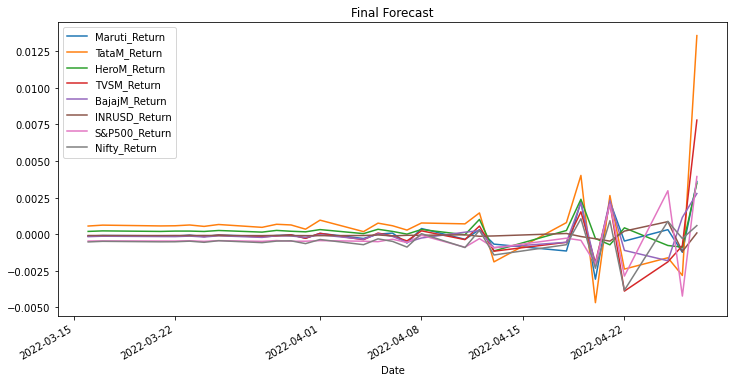

In [208]:
# Plot the results			   
returns_test.plot(legend=True,figsize=(12,6),title="Test Original")
df_forecast.plot(legend=True,figsize=(12,6),title="Final Forecast")

# Please find below comparison of all RMS for all 5 stocks and 3 external variables, All most all have same RMSE across 3 Algo- AR, ARIMA, VAR

In [278]:
# 					Maruti			Tata			Hero			TVS				Bajaj
# RMSE		AR		0.014142136		0.017320508		0.02236068		0.013784049		0.014142136
# RMSE		ARIMA	0.014			0.017			0.022			0.013			0.016
# RMSE		VAR		0.014			0.018			0.022			0.013			0.0158
												
												
												
												
#                   INR USD		S&P500			Nifty				
# RMSE		AR		3.16E-03	0.012649111		0.010488088				
# RMSE		ARIMA	0.003		0.013			0.01				
# RMSE		VAR		0.003		0.013			0.01				

# Renaming columns back to original for Indicator analysis

In [209]:
maruti_df.rename(columns = {'Maruti_Return':'Return'}, inplace = True)
tatam_df.rename(columns = {'TataM_Return':'Return'}, inplace = True)
herom_df.rename(columns = {'HeroM_Return':'Return'}, inplace = True)
tvsm_df.rename(columns = {'TVSM_Return':'Return'}, inplace = True)
bajajm_df.rename(columns = {'BajajM_Return':'Return'}, inplace = True)
inrusd_df.rename(columns = {'INRUSD_Return':'Return'}, inplace = True)
sp500_df.rename(columns = {'S&P500_Return':'Return'}, inplace = True)
nifty_df.rename(columns = {'Nifty_Return':'Return'}, inplace = True)

# Indicators for Maruti

In [210]:
tilist, bestnarlist, bestsrlist = [], [], []

# Simple Moving Average

duration in trade: 2.0353
net average return: -0.0812
sharpe ratio: -0.6244
sma1: 25
sma2: 45
nar: 0.3889455075167296
sma1: 25
sma2: 45
sr: 1.0936408966730597


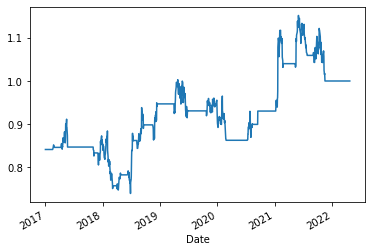

In [211]:
from ta.trend import SMAIndicator
bajajdf = bajajm_df
bajajdf["sma20"] = SMAIndicator(close=bajajdf["Adj Close"], window=20, fillna=True).sma_indicator()
bajajdf["sma50"] = SMAIndicator(close=bajajdf["Adj Close"], window=50, fillna=True).sma_indicator()
bajajdf["signal"] = np.where(bajajdf["sma20"]>bajajdf["sma50"], 1, 0)
bajajdf["signal"] = bajajdf["signal"].shift(1)
bajajdf.dropna(inplace=True)
bajajdf["signal"].describe()






bajajdf["ROC"] = np.log(bajajdf["Adj Close"] / bajajdf["Adj Close"].shift(1))
bajajdf["Return"] = bajajdf["ROC"]*bajajdf["signal"]
bajajdf["portfolio"] = np.exp(bajajdf["Return"].cumsum())
bajajdf.dropna(inplace=True)
bajajdf.tail(3)





bajajdf["portfolio"].plot()







duration_days = bajajdf.index.max()-bajajdf.index.min()
duration_years = duration_days.days/365.25
duration_in_trade = duration_years * bajajdf["signal"].mean()
print(f"duration in trade: {duration_in_trade:.4f}")

net_avg_return = bajajdf.iloc[-1]["portfolio"]**(1/duration_in_trade)-1
print(f"net average return: {net_avg_return:.4f}")

returns = bajajdf[bajajdf["Return"]!=0]["Return"]
sharpe_ratio = (returns.mean()*250 - 0.05)/(returns.std()*np.sqrt(250))
print(f"sharpe ratio: {sharpe_ratio:.4f}")







from ta.trend import SMAIndicator
import copy

iilist = []
jjlist = []
narlist = []
srlist = []

df = yf.download("MARUTI.NS", start="2010-12-31", progress=False)


for ii in range(10, 295, 5):
  for jj in range(ii+5, 300, 5):
    bajajdf = copy.deepcopy(df)
    bajajdf["sma1"] = SMAIndicator(close=bajajdf["Adj Close"], window=ii, fillna=True).sma_indicator()
    bajajdf["sma2"] = SMAIndicator(close=bajajdf["Adj Close"], window=jj, fillna=True).sma_indicator()
    bajajdf["signal"] = np.where(bajajdf["sma1"]>bajajdf["sma2"], 1, 0)
    bajajdf["signal"] = bajajdf["signal"].shift(1)
    bajajdf.dropna(inplace=True)
    bajajdf["ROC"] = np.log(bajajdf["Adj Close"] / bajajdf["Adj Close"].shift(1))
    bajajdf["Return"] = bajajdf["ROC"]*bajajdf["signal"]
    bajajdf["portfolio"] = np.exp(bajajdf["Return"].cumsum())
    bajajdf.dropna(inplace=True)
    duration_days = bajajdf.index.max()-bajajdf.index.min()
    duration_years = duration_days.days/365.25
    duration_in_trade = duration_years * bajajdf["signal"].mean()

    if (duration_in_trade!=0):
      net_avg_return = bajajdf.iloc[-1]["portfolio"]**(1/duration_in_trade)-1
      returns = bajajdf[bajajdf["Return"]!=0]["Return"]
      sharpe_ratio = (returns.mean()*250 - 0.05)/(returns.std()*np.sqrt(250))

    iilist.append(ii)
    jjlist.append(jj)
    narlist.append(net_avg_return)
    srlist.append(sharpe_ratio)

    
    
# net average return based
print(f"sma1: {iilist[np.argmax(narlist)]}")
print(f"sma2: {jjlist[np.argmax(narlist)]}")
print(f"nar: {max(narlist)}")

# sharpe ratio based
print(f"sma1: {iilist[np.argmax(srlist)]}")
print(f"sma2: {jjlist[np.argmax(srlist)]}")
print(f"sr: {max(srlist)}")

# resultdf = pd.DataFrame(np.column_stack([iilist, jjlist, narlist, srlist]), columns=["sma1", "sma2", "nar", "sr"])
# resultdf[(resultdf["sma1"]==10) & (resultdf["sma2"]==20)]

tilist.append("sma")
bestnarlist.append(max(narlist))
bestsrlist.append(max(srlist))








# Exponential Moving Average

In [212]:
from ta.trend import SMAIndicator, EMAIndicator
import copy

iilist = []
jjlist = []
narlist = []
srlist = []

#df = yf.download("MARUTI.NS", start="2010-12-31", progress=False)


for ii in range(10, 295, 5):
  for jj in range(ii+5, 300, 5):
    bajajdf = copy.deepcopy(df)
    bajajdf["sma1"] = EMAIndicator(close=bajajdf["Adj Close"], window=ii, fillna=True).ema_indicator()
    bajajdf["sma2"] = EMAIndicator(close=bajajdf["Adj Close"], window=jj, fillna=True).ema_indicator()
    bajajdf["signal"] = np.where(bajajdf["sma1"]>bajajdf["sma2"], 1, 0)
    bajajdf["signal"] = bajajdf["signal"].shift(1)
    bajajdf.dropna(inplace=True)
    bajajdf["ROC"] = np.log(bajajdf["Adj Close"] / bajajdf["Adj Close"].shift(1))
    bajajdf["Return"] = bajajdf["ROC"]*bajajdf["signal"]
    bajajdf["portfolio"] = np.exp(bajajdf["Return"].cumsum())
    bajajdf.dropna(inplace=True)
    duration_days = bajajdf.index.max()-bajajdf.index.min()
    duration_years = duration_days.days/365.25
    duration_in_trade = duration_years * bajajdf["signal"].mean()

    if (duration_in_trade!=0):
      net_avg_return = bajajdf.iloc[-1]["portfolio"]**(1/duration_in_trade)-1
      returns = bajajdf[bajajdf["Return"]!=0]["Return"]
      sharpe_ratio = (returns.mean()*250 - 0.05)/(returns.std()*np.sqrt(250))

    iilist.append(ii)
    jjlist.append(jj)
    narlist.append(net_avg_return)
    srlist.append(sharpe_ratio)

    
# net average return based
print(f"sma1: {iilist[np.argmax(narlist)]}")
print(f"sma2: {jjlist[np.argmax(narlist)]}")
print(f"nar: {max(narlist)}")

# sharpe ratio based
print(f"sma1: {iilist[np.argmax(srlist)]}")
print(f"sma2: {jjlist[np.argmax(srlist)]}")
print(f"sr: {max(srlist)}")

# resultdf = pd.DataFrame(np.column_stack([iilist, jjlist, narlist, srlist]), columns=["sma1", "sma2", "nar", "sr"])
# resultdf[(resultdf["sma1"]==10) & (resultdf["sma2"]==20)]

tilist.append("ema")
bestnarlist.append(max(narlist))
bestsrlist.append(max(srlist))





sma1: 15
sma2: 105
nar: 0.3079622285225796
sma1: 15
sma2: 105
sr: 0.8807112605051278


# Moving Average Convergence Divergence

In [213]:
import copy

iilist = []
jjlist = []
kklist = []
narlist = []
srlist = []

#df = yf.download("MARUTI.NS", start="2010-12-31", progress=False)


for ii in range(4, 40, 2):
  for jj in range(ii+8, 80, 2):
    for kk in range(3, 20, 1):
      bajajdf = copy.deepcopy(df)
      bajajdf["macd line"] = bajajdf["Adj Close"].ewm(span=ii).mean() - bajajdf["Adj Close"].ewm(span=jj).mean()
      bajajdf["signal line"] = bajajdf["macd line"].ewm(span=kk).mean()
      bajajdf["signal"] = np.where(bajajdf["macd line"]>=bajajdf["signal line"], 1, 0)
      bajajdf["signal"] = bajajdf["signal"].shift(1)
      bajajdf["ROC"] = np.log(bajajdf["Adj Close"] / bajajdf["Adj Close"].shift(1))
      bajajdf["Return"] = bajajdf["ROC"]*bajajdf["signal"]
      bajajdf["portfolio"] = np.exp(bajajdf["Return"].cumsum())
      bajajdf.dropna(inplace=True)
      duration_days = bajajdf.index.max()-bajajdf.index.min()
      duration_years = duration_days.days/365.25
      duration_in_trade = duration_years * bajajdf["signal"].mean()

      if (duration_in_trade!=0):
        net_avg_return = bajajdf.iloc[-1]["portfolio"]**(1/duration_in_trade)-1
        returns = bajajdf[bajajdf["Return"]!=0]["Return"]
        sharpe_ratio = (returns.mean()*250 - 0.05)/(returns.std()*np.sqrt(250))

      iilist.append(ii)
      jjlist.append(jj)
      kklist.append(kk)
      narlist.append(net_avg_return)
      srlist.append(sharpe_ratio)

    
# net average return based
print(f"nfast: {iilist[np.argmax(narlist)]}")
print(f"nslow: {jjlist[np.argmax(narlist)]}")
print(f"nsig: {kklist[np.argmax(narlist)]}")
print(f"nar: {max(narlist)}")

# sharpe ratio based
print(f"nfast: {iilist[np.argmax(srlist)]}")
print(f"nslow: {jjlist[np.argmax(srlist)]}")
print(f"nsig: {kklist[np.argmax(srlist)]}")
print(f"sr: {max(srlist)}")

# resultdf = pd.DataFrame(np.column_stack([iilist, jjlist, kklist, narlist, srlist]), columns=["nfast", "nslow", "nsig", "nar", "sr"])
# resultdf[(resultdf["nfast"]==36) & (resultdf["nslow"]==44) & (resultdf["nsig"]==8)]

tilist.append("macd")
bestnarlist.append(max(narlist))
bestsrlist.append(max(srlist))




nfast: 22
nslow: 44
nsig: 17
nar: 0.4177841192866145
nfast: 22
nslow: 44
nsig: 17
sr: 1.0935462582191957


# Bollinger Bands

n_ema: 5
n_sigma: 2.00
nar: 0.5799982317537611
n_ema: 5
n_sigma: 2.00
sr: 1.7374230254764558


<AxesSubplot:xlabel='Date'>

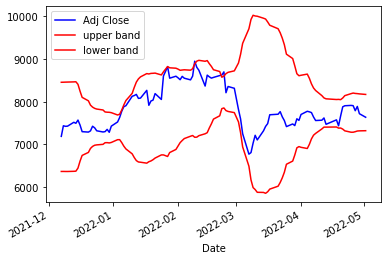

In [214]:
import copy

iilist = []
jjlist = []
narlist = []
srlist = []

#df = yf.download("MARUTI.NS", start="2016-12-31", progress=False)


for ii in range(2, 50):
  for jj in np.arange(0.5, 3, 0.1):
    bajajdf = copy.deepcopy(df)
    bajajdf["20EMA"] = bajajdf["Adj Close"].ewm(span=ii).mean()
    bajajdf["upper band"] = bajajdf["20EMA"] + jj*bajajdf["Adj Close"].rolling(window=20).std()
    bajajdf["lower band"] = bajajdf["20EMA"] - jj*bajajdf["Adj Close"].rolling(window=20).std()
    bajajdf.dropna(inplace=True)
    bajajdf["signal"] = np.where(bajajdf["Adj Close"]>bajajdf["upper band"], 0, 
                                np.where(bajajdf["Adj Close"]<bajajdf["lower band"], 1,
                                          np.nan))

    if (np.isnan(bajajdf["signal"][0])):
      bajajdf["signal"][0] = 0

    bajajdf.signal.fillna(method="ffill", inplace=True)
    bajajdf["signal"] = bajajdf["signal"].shift(1)
    bajajdf.dropna(inplace=True)
    bajajdf["ROC"] = np.log(bajajdf["Adj Close"] / bajajdf["Adj Close"].shift(1))
    bajajdf["Return"] = bajajdf["ROC"]*bajajdf["signal"]
    bajajdf["portfolio"] = np.exp(bajajdf["Return"].cumsum())
    bajajdf.dropna(inplace=True)
    duration_days = bajajdf.index.max()-bajajdf.index.min()
    duration_years = duration_days.days/365.25
    duration_in_trade = duration_years * bajajdf["signal"].mean()

    if (duration_in_trade!=0):
      net_avg_return = bajajdf.iloc[-1]["portfolio"]**(1/duration_in_trade)-1
      returns = bajajdf[bajajdf["Return"]!=0]["Return"]
      sharpe_ratio = (returns.mean()*250 - 0.05)/(returns.std()*np.sqrt(250))

    iilist.append(ii)
    jjlist.append(jj)
    kklist.append(kk)
    narlist.append(net_avg_return)
    srlist.append(sharpe_ratio)

    
    
# net average return based
print(f"n_ema: {iilist[np.argmax(narlist)]}")
print(f"n_sigma: {jjlist[np.argmax(narlist)]:0.2f}")
print(f"nar: {max(narlist)}")

# sharpe ratio return based
print(f"n_ema: {iilist[np.argmax(srlist)]}")
print(f"n_sigma: {jjlist[np.argmax(srlist)]:0.2f}")
print(f"sr: {max(srlist)}")

# resultdf = pd.DataFrame(np.column_stack([iilist, jjlist, narlist, srlist]), columns=["n_ema", "n_sig", "nar", "sr"])
# resultdf[(resultdf["n_ema"]==49) & (resultdf["n_sig"]>2.89) & (resultdf["n_sig"]<2.91) | (resultdf["n_ema"]==11) & (resultdf["n_sig"]>2.69) & (resultdf["n_sig"]<2.71)]
# resultdf[(resultdf["n_ema"]==49) | (resultdf["n_ema"]==11)]

tilist.append("bbands")
bestnarlist.append(max(narlist))
bestsrlist.append(max(srlist))









bajajdf[["Adj Close", "upper band", "lower band"]].tail(100).plot(color=('b','r','r'))







# Relative Strength Index

In [215]:
from ta.momentum import RSIIndicator
import copy

iilist = []
jjlist = []
kklist = []
narlist = []
srlist = []

#df = yf.download("MARUTI.NS", start="2016-12-31", progress=False)


for ii in range(10, 50, 2):
  for jj in range(10, 40, 2):
    for kk in range(60, 90, 2):
      bajajdf = copy.deepcopy(df)
      bajajdf["rsi"] = RSIIndicator(close=bajajdf["Adj Close"], window=ii).rsi()
      bajajdf.dropna(inplace=True)
      bajajdf["signal"] = np.where(bajajdf["rsi"]<jj, 1,
                                  np.where(bajajdf["rsi"]>kk, 0,
                                            np.nan))
      if(np.isnan(bajajdf["signal"][0])):
        bajajdf["signal"][0] = 0

      bajajdf.signal.fillna(method='ffill', inplace=True)
      bajajdf["signal"] = bajajdf["signal"].shift(1)
      bajajdf.dropna(inplace=True)
      bajajdf["ROC"] = np.log(bajajdf["Adj Close"] / bajajdf["Adj Close"].shift(1))
      bajajdf["Return"] = bajajdf["ROC"]*bajajdf["signal"]
      bajajdf["portfolio"] = np.exp(bajajdf["Return"].cumsum())
      bajajdf.dropna(inplace=True)
      duration_days = bajajdf.index.max()-bajajdf.index.min()
      duration_years = duration_days.days/365.25
      duration_in_trade = duration_years * bajajdf["signal"].mean()

      if (duration_in_trade!=0):
        net_avg_return = bajajdf.iloc[-1]["portfolio"]**(1/duration_in_trade)-1
        returns = bajajdf[bajajdf["Return"]!=0]["Return"]
        sharpe_ratio = (returns.mean()*250 - 0.05)/(returns.std()*np.sqrt(250))

      iilist.append(ii)
      jjlist.append(jj)
      kklist.append(kk)
      narlist.append(net_avg_return)
      srlist.append(sharpe_ratio)

    
    
# net average return based
print(f"n_window: {iilist[np.argmax(narlist)]}")
print(f"n_low: {jjlist[np.argmax(narlist)]}")
print(f"n_high: {kklist[np.argmax(narlist)]}")
print(f"nar: {max(narlist)}")

# sharpe ratio based
print(f"n_window: {iilist[np.argmax(srlist)]}")
print(f"n_low: {jjlist[np.argmax(srlist)]}")
print(f"n_high: {kklist[np.argmax(srlist)]}")
print(f"sr: {max(srlist)}")

# resultdf = pd.DataFrame(np.column_stack([iilist, jjlist, kklist, narlist, srlist]), columns=["n_window", "n_low", "n_high", "nar", "sr"])
# resultdf[(resultdf["n_window"]==10) & (resultdf["n_low"]==10) & (resultdf["n_high"]==84)]

tilist.append("rsi")
bestnarlist.append(max(narlist))
bestsrlist.append(max(srlist))








n_window: 44
n_low: 30
n_high: 60
nar: 2.500946000594003
n_window: 36
n_low: 28
n_high: 64
sr: 2.2526575541045175


In [216]:
comparisondf = pd.DataFrame(np.column_stack([tilist, bestnarlist, bestsrlist]), columns=["Technical Indicator", "Best NAR", "Best SR"])
comparisondf

,Technical Indicator,Best NAR,Best SR
0,sma,0.3889455075167296,1.0936408966730597
1,ema,0.3079622285225796,0.8807112605051278
2,macd,0.4177841192866145,1.0935462582191957
3,bbands,0.5799982317537611,1.7374230254764558
4,rsi,2.500946000594003,2.2526575541045175


# Indicators for Tata Motors

In [217]:
tilist, bestnarlist, bestsrlist = [], [], []

# Simple Moving Average

duration in trade: 2.0584
net average return: -0.0967
sharpe ratio: -0.6984
sma1: 15
sma2: 40
nar: 0.49560074931368914
sma1: 15
sma2: 40
sr: 0.8483386502961664


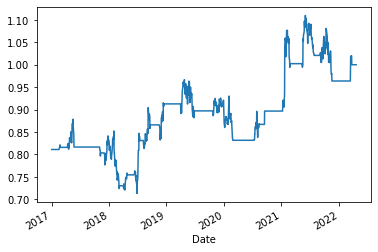

In [218]:
from ta.trend import SMAIndicator
bajajdf = bajajm_df
bajajdf["sma20"] = SMAIndicator(close=bajajdf["Adj Close"], window=20, fillna=True).sma_indicator()
bajajdf["sma50"] = SMAIndicator(close=bajajdf["Adj Close"], window=50, fillna=True).sma_indicator()
bajajdf["signal"] = np.where(bajajdf["sma20"]>bajajdf["sma50"], 1, 0)
bajajdf["signal"] = bajajdf["signal"].shift(1)
bajajdf.dropna(inplace=True)
bajajdf["signal"].describe()






bajajdf["ROC"] = np.log(bajajdf["Adj Close"] / bajajdf["Adj Close"].shift(1))
bajajdf["Return"] = bajajdf["ROC"]*bajajdf["signal"]
bajajdf["portfolio"] = np.exp(bajajdf["Return"].cumsum())
bajajdf.dropna(inplace=True)
bajajdf.tail(3)





bajajdf["portfolio"].plot()







duration_days = bajajdf.index.max()-bajajdf.index.min()
duration_years = duration_days.days/365.25
duration_in_trade = duration_years * bajajdf["signal"].mean()
print(f"duration in trade: {duration_in_trade:.4f}")

net_avg_return = bajajdf.iloc[-1]["portfolio"]**(1/duration_in_trade)-1
print(f"net average return: {net_avg_return:.4f}")

returns = bajajdf[bajajdf["Return"]!=0]["Return"]
sharpe_ratio = (returns.mean()*250 - 0.05)/(returns.std()*np.sqrt(250))
print(f"sharpe ratio: {sharpe_ratio:.4f}")







from ta.trend import SMAIndicator
import copy

iilist = []
jjlist = []
narlist = []
srlist = []

df = yf.download("TATAMOTORS.NS", start="2010-12-31", progress=False)


for ii in range(10, 295, 5):
  for jj in range(ii+5, 300, 5):
    bajajdf = copy.deepcopy(df)
    bajajdf["sma1"] = SMAIndicator(close=bajajdf["Adj Close"], window=ii, fillna=True).sma_indicator()
    bajajdf["sma2"] = SMAIndicator(close=bajajdf["Adj Close"], window=jj, fillna=True).sma_indicator()
    bajajdf["signal"] = np.where(bajajdf["sma1"]>bajajdf["sma2"], 1, 0)
    bajajdf["signal"] = bajajdf["signal"].shift(1)
    bajajdf.dropna(inplace=True)
    bajajdf["ROC"] = np.log(bajajdf["Adj Close"] / bajajdf["Adj Close"].shift(1))
    bajajdf["Return"] = bajajdf["ROC"]*bajajdf["signal"]
    bajajdf["portfolio"] = np.exp(bajajdf["Return"].cumsum())
    bajajdf.dropna(inplace=True)
    duration_days = bajajdf.index.max()-bajajdf.index.min()
    duration_years = duration_days.days/365.25
    duration_in_trade = duration_years * bajajdf["signal"].mean()

    if (duration_in_trade!=0):
      net_avg_return = bajajdf.iloc[-1]["portfolio"]**(1/duration_in_trade)-1
      returns = bajajdf[bajajdf["Return"]!=0]["Return"]
      sharpe_ratio = (returns.mean()*250 - 0.05)/(returns.std()*np.sqrt(250))

    iilist.append(ii)
    jjlist.append(jj)
    narlist.append(net_avg_return)
    srlist.append(sharpe_ratio)

    
    
# net average return based
print(f"sma1: {iilist[np.argmax(narlist)]}")
print(f"sma2: {jjlist[np.argmax(narlist)]}")
print(f"nar: {max(narlist)}")

# sharpe ratio based
print(f"sma1: {iilist[np.argmax(srlist)]}")
print(f"sma2: {jjlist[np.argmax(srlist)]}")
print(f"sr: {max(srlist)}")

# resultdf = pd.DataFrame(np.column_stack([iilist, jjlist, narlist, srlist]), columns=["sma1", "sma2", "nar", "sr"])
# resultdf[(resultdf["sma1"]==10) & (resultdf["sma2"]==20)]

tilist.append("sma")
bestnarlist.append(max(narlist))
bestsrlist.append(max(srlist))









# Exponential Moving Average

In [219]:
from ta.trend import SMAIndicator, EMAIndicator
import copy

iilist = []
jjlist = []
narlist = []
srlist = []

#df = yf.download("TATAMOTORS.NS", start="2010-12-31", progress=False)


for ii in range(10, 295, 5):
  for jj in range(ii+5, 300, 5):
    bajajdf = copy.deepcopy(df)
    bajajdf["sma1"] = EMAIndicator(close=bajajdf["Adj Close"], window=ii, fillna=True).ema_indicator()
    bajajdf["sma2"] = EMAIndicator(close=bajajdf["Adj Close"], window=jj, fillna=True).ema_indicator()
    bajajdf["signal"] = np.where(bajajdf["sma1"]>bajajdf["sma2"], 1, 0)
    bajajdf["signal"] = bajajdf["signal"].shift(1)
    bajajdf.dropna(inplace=True)
    bajajdf["ROC"] = np.log(bajajdf["Adj Close"] / bajajdf["Adj Close"].shift(1))
    bajajdf["Return"] = bajajdf["ROC"]*bajajdf["signal"]
    bajajdf["portfolio"] = np.exp(bajajdf["Return"].cumsum())
    bajajdf.dropna(inplace=True)
    duration_days = bajajdf.index.max()-bajajdf.index.min()
    duration_years = duration_days.days/365.25
    duration_in_trade = duration_years * bajajdf["signal"].mean()

    if (duration_in_trade!=0):
      net_avg_return = bajajdf.iloc[-1]["portfolio"]**(1/duration_in_trade)-1
      returns = bajajdf[bajajdf["Return"]!=0]["Return"]
      sharpe_ratio = (returns.mean()*250 - 0.05)/(returns.std()*np.sqrt(250))

    iilist.append(ii)
    jjlist.append(jj)
    narlist.append(net_avg_return)
    srlist.append(sharpe_ratio)

    
    
# net average return based
print(f"sma1: {iilist[np.argmax(narlist)]}")
print(f"sma2: {jjlist[np.argmax(narlist)]}")
print(f"nar: {max(narlist)}")

# sharpe ratio based
print(f"sma1: {iilist[np.argmax(srlist)]}")
print(f"sma2: {jjlist[np.argmax(srlist)]}")
print(f"sr: {max(srlist)}")

# resultdf = pd.DataFrame(np.column_stack([iilist, jjlist, narlist, srlist]), columns=["sma1", "sma2", "nar", "sr"])
# resultdf[(resultdf["sma1"]==10) & (resultdf["sma2"]==20)]

tilist.append("ema")
bestnarlist.append(max(narlist))
bestsrlist.append(max(srlist))





sma1: 20
sma2: 30
nar: 0.36053746173897716
sma1: 80
sma2: 215
sr: 0.6782918605705036


# Moving Average Convergence Divergence

In [220]:
import copy

iilist = []
jjlist = []
kklist = []
narlist = []
srlist = []

#df = yf.download("TATAMOTORS.NS", start="2010-12-31", progress=False)


for ii in range(4, 40, 2):
  for jj in range(ii+8, 80, 2):
    for kk in range(3, 20, 1):
      bajajdf = copy.deepcopy(df)
      bajajdf["macd line"] = bajajdf["Adj Close"].ewm(span=ii).mean() - bajajdf["Adj Close"].ewm(span=jj).mean()
      bajajdf["signal line"] = bajajdf["macd line"].ewm(span=kk).mean()
      bajajdf["signal"] = np.where(bajajdf["macd line"]>=bajajdf["signal line"], 1, 0)
      bajajdf["signal"] = bajajdf["signal"].shift(1)
      bajajdf["ROC"] = np.log(bajajdf["Adj Close"] / bajajdf["Adj Close"].shift(1))
      bajajdf["Return"] = bajajdf["ROC"]*bajajdf["signal"]
      bajajdf["portfolio"] = np.exp(bajajdf["Return"].cumsum())
      bajajdf.dropna(inplace=True)
      duration_days = bajajdf.index.max()-bajajdf.index.min()
      duration_years = duration_days.days/365.25
      duration_in_trade = duration_years * bajajdf["signal"].mean()

      if (duration_in_trade!=0):
        net_avg_return = bajajdf.iloc[-1]["portfolio"]**(1/duration_in_trade)-1
        returns = bajajdf[bajajdf["Return"]!=0]["Return"]
        sharpe_ratio = (returns.mean()*250 - 0.05)/(returns.std()*np.sqrt(250))

      iilist.append(ii)
      jjlist.append(jj)
      kklist.append(kk)
      narlist.append(net_avg_return)
      srlist.append(sharpe_ratio)

    
    
# net average return based
print(f"nfast: {iilist[np.argmax(narlist)]}")
print(f"nslow: {jjlist[np.argmax(narlist)]}")
print(f"nsig: {kklist[np.argmax(narlist)]}")
print(f"nar: {max(narlist)}")

# sharpe ratio based
print(f"nfast: {iilist[np.argmax(srlist)]}")
print(f"nslow: {jjlist[np.argmax(srlist)]}")
print(f"nsig: {kklist[np.argmax(srlist)]}")
print(f"sr: {max(srlist)}")

# resultdf = pd.DataFrame(np.column_stack([iilist, jjlist, kklist, narlist, srlist]), columns=["nfast", "nslow", "nsig", "nar", "sr"])
# resultdf[(resultdf["nfast"]==36) & (resultdf["nslow"]==44) & (resultdf["nsig"]==8)]

tilist.append("macd")
bestnarlist.append(max(narlist))
bestsrlist.append(max(srlist))









nfast: 16
nslow: 62
nsig: 4
nar: 0.49979372171870273
nfast: 16
nslow: 62
nsig: 4
sr: 0.8506844010075149


# Bollinger Bands

n_ema: 7
n_sigma: 1.80
nar: 0.47367077658432954
n_ema: 7
n_sigma: 1.80
sr: 0.8701179039817197


<AxesSubplot:xlabel='Date'>

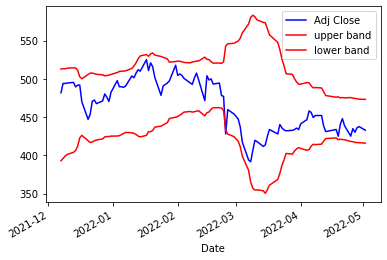

In [221]:
import copy

iilist = []
jjlist = []
narlist = []
srlist = []

#df = yf.download("TATAMOTORS.NS", start="2016-12-31", progress=False)


for ii in range(2, 50):
  for jj in np.arange(0.5, 3, 0.1):
    bajajdf = copy.deepcopy(df)
    bajajdf["20EMA"] = bajajdf["Adj Close"].ewm(span=ii).mean()
    bajajdf["upper band"] = bajajdf["20EMA"] + jj*bajajdf["Adj Close"].rolling(window=20).std()
    bajajdf["lower band"] = bajajdf["20EMA"] - jj*bajajdf["Adj Close"].rolling(window=20).std()
    bajajdf.dropna(inplace=True)
    bajajdf["signal"] = np.where(bajajdf["Adj Close"]>bajajdf["upper band"], 0, 
                                np.where(bajajdf["Adj Close"]<bajajdf["lower band"], 1,
                                          np.nan))

    if (np.isnan(bajajdf["signal"][0])):
      bajajdf["signal"][0] = 0

    bajajdf.signal.fillna(method="ffill", inplace=True)
    bajajdf["signal"] = bajajdf["signal"].shift(1)
    bajajdf.dropna(inplace=True)
    bajajdf["ROC"] = np.log(bajajdf["Adj Close"] / bajajdf["Adj Close"].shift(1))
    bajajdf["Return"] = bajajdf["ROC"]*bajajdf["signal"]
    bajajdf["portfolio"] = np.exp(bajajdf["Return"].cumsum())
    bajajdf.dropna(inplace=True)
    duration_days = bajajdf.index.max()-bajajdf.index.min()
    duration_years = duration_days.days/365.25
    duration_in_trade = duration_years * bajajdf["signal"].mean()

    if (duration_in_trade!=0):
      net_avg_return = bajajdf.iloc[-1]["portfolio"]**(1/duration_in_trade)-1
      returns = bajajdf[bajajdf["Return"]!=0]["Return"]
      sharpe_ratio = (returns.mean()*250 - 0.05)/(returns.std()*np.sqrt(250))

    iilist.append(ii)
    jjlist.append(jj)
    kklist.append(kk)
    narlist.append(net_avg_return)
    srlist.append(sharpe_ratio)

    
    
# net average return based
print(f"n_ema: {iilist[np.argmax(narlist)]}")
print(f"n_sigma: {jjlist[np.argmax(narlist)]:0.2f}")
print(f"nar: {max(narlist)}")

# sharpe ratio return based
print(f"n_ema: {iilist[np.argmax(srlist)]}")
print(f"n_sigma: {jjlist[np.argmax(srlist)]:0.2f}")
print(f"sr: {max(srlist)}")

# resultdf = pd.DataFrame(np.column_stack([iilist, jjlist, narlist, srlist]), columns=["n_ema", "n_sig", "nar", "sr"])
# resultdf[(resultdf["n_ema"]==49) & (resultdf["n_sig"]>2.89) & (resultdf["n_sig"]<2.91) | (resultdf["n_ema"]==11) & (resultdf["n_sig"]>2.69) & (resultdf["n_sig"]<2.71)]
# resultdf[(resultdf["n_ema"]==49) | (resultdf["n_ema"]==11)]

tilist.append("bbands")
bestnarlist.append(max(narlist))
bestsrlist.append(max(srlist))









bajajdf[["Adj Close", "upper band", "lower band"]].tail(100).plot(color=('b','r','r'))




# Relative Strength Index

n_ema: 7
n_sigma: 1.80
nar: 0.47367077658432954
n_ema: 7
n_sigma: 1.80
sr: 0.8701179039817197


<AxesSubplot:xlabel='Date'>

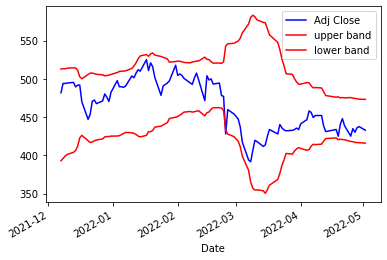

In [222]:
import copy

iilist = []
jjlist = []
narlist = []
srlist = []

#df = yf.download("TATAMOTORS.NS", start="2016-12-31", progress=False)


for ii in range(2, 50):
  for jj in np.arange(0.5, 3, 0.1):
    bajajdf = copy.deepcopy(df)
    bajajdf["20EMA"] = bajajdf["Adj Close"].ewm(span=ii).mean()
    bajajdf["upper band"] = bajajdf["20EMA"] + jj*bajajdf["Adj Close"].rolling(window=20).std()
    bajajdf["lower band"] = bajajdf["20EMA"] - jj*bajajdf["Adj Close"].rolling(window=20).std()
    bajajdf.dropna(inplace=True)
    bajajdf["signal"] = np.where(bajajdf["Adj Close"]>bajajdf["upper band"], 0, 
                                np.where(bajajdf["Adj Close"]<bajajdf["lower band"], 1,
                                          np.nan))

    if (np.isnan(bajajdf["signal"][0])):
      bajajdf["signal"][0] = 0

    bajajdf.signal.fillna(method="ffill", inplace=True)
    bajajdf["signal"] = bajajdf["signal"].shift(1)
    bajajdf.dropna(inplace=True)
    bajajdf["ROC"] = np.log(bajajdf["Adj Close"] / bajajdf["Adj Close"].shift(1))
    bajajdf["Return"] = bajajdf["ROC"]*bajajdf["signal"]
    bajajdf["portfolio"] = np.exp(bajajdf["Return"].cumsum())
    bajajdf.dropna(inplace=True)
    duration_days = bajajdf.index.max()-bajajdf.index.min()
    duration_years = duration_days.days/365.25
    duration_in_trade = duration_years * bajajdf["signal"].mean()

    if (duration_in_trade!=0):
      net_avg_return = bajajdf.iloc[-1]["portfolio"]**(1/duration_in_trade)-1
      returns = bajajdf[bajajdf["Return"]!=0]["Return"]
      sharpe_ratio = (returns.mean()*250 - 0.05)/(returns.std()*np.sqrt(250))

    iilist.append(ii)
    jjlist.append(jj)
    kklist.append(kk)
    narlist.append(net_avg_return)
    srlist.append(sharpe_ratio)

    
    
# net average return based
print(f"n_ema: {iilist[np.argmax(narlist)]}")
print(f"n_sigma: {jjlist[np.argmax(narlist)]:0.2f}")
print(f"nar: {max(narlist)}")

# sharpe ratio return based
print(f"n_ema: {iilist[np.argmax(srlist)]}")
print(f"n_sigma: {jjlist[np.argmax(srlist)]:0.2f}")
print(f"sr: {max(srlist)}")

# resultdf = pd.DataFrame(np.column_stack([iilist, jjlist, narlist, srlist]), columns=["n_ema", "n_sig", "nar", "sr"])
# resultdf[(resultdf["n_ema"]==49) & (resultdf["n_sig"]>2.89) & (resultdf["n_sig"]<2.91) | (resultdf["n_ema"]==11) & (resultdf["n_sig"]>2.69) & (resultdf["n_sig"]<2.71)]
# resultdf[(resultdf["n_ema"]==49) | (resultdf["n_ema"]==11)]

tilist.append("bbands")
bestnarlist.append(max(narlist))
bestsrlist.append(max(srlist))









bajajdf[["Adj Close", "upper band", "lower band"]].tail(100).plot(color=('b','r','r'))






In [223]:
comparisondf = pd.DataFrame(np.column_stack([tilist, bestnarlist, bestsrlist]), columns=["Technical Indicator", "Best NAR", "Best SR"])
comparisondf

,Technical Indicator,Best NAR,Best SR
0,sma,0.49560074931368914,0.8483386502961664
1,ema,0.36053746173897716,0.6782918605705036
2,macd,0.49979372171870273,0.8506844010075149
3,bbands,0.47367077658432954,0.8701179039817197
4,bbands,0.47367077658432954,0.8701179039817197


# Indicators for HEROMOTOCO

In [224]:
tilist, bestnarlist, bestsrlist = [], [], []

# Simple Moving Average

duration in trade: 2.0433
net average return: -0.0991
sharpe ratio: -0.7145
sma1: 95
sma2: 130
nar: 0.189845285461399
sma1: 95
sma2: 130
sr: 0.5051744300714744


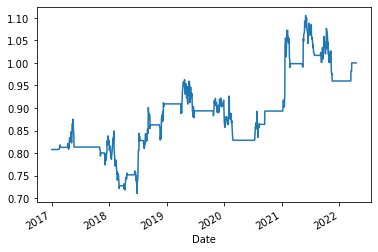

In [225]:
from ta.trend import SMAIndicator
bajajdf = bajajm_df
bajajdf["sma20"] = SMAIndicator(close=bajajdf["Adj Close"], window=20, fillna=True).sma_indicator()
bajajdf["sma50"] = SMAIndicator(close=bajajdf["Adj Close"], window=50, fillna=True).sma_indicator()
bajajdf["signal"] = np.where(bajajdf["sma20"]>bajajdf["sma50"], 1, 0)
bajajdf["signal"] = bajajdf["signal"].shift(1)
bajajdf.dropna(inplace=True)
bajajdf["signal"].describe()






bajajdf["ROC"] = np.log(bajajdf["Adj Close"] / bajajdf["Adj Close"].shift(1))
bajajdf["Return"] = bajajdf["ROC"]*bajajdf["signal"]
bajajdf["portfolio"] = np.exp(bajajdf["Return"].cumsum())
bajajdf.dropna(inplace=True)
bajajdf.tail(3)





bajajdf["portfolio"].plot()







duration_days = bajajdf.index.max()-bajajdf.index.min()
duration_years = duration_days.days/365.25
duration_in_trade = duration_years * bajajdf["signal"].mean()
print(f"duration in trade: {duration_in_trade:.4f}")

net_avg_return = bajajdf.iloc[-1]["portfolio"]**(1/duration_in_trade)-1
print(f"net average return: {net_avg_return:.4f}")

returns = bajajdf[bajajdf["Return"]!=0]["Return"]
sharpe_ratio = (returns.mean()*250 - 0.05)/(returns.std()*np.sqrt(250))
print(f"sharpe ratio: {sharpe_ratio:.4f}")







from ta.trend import SMAIndicator
import copy

iilist = []
jjlist = []
narlist = []
srlist = []

df = yf.download("HEROMOTOCO.NS", start="2010-12-31", progress=False)


for ii in range(10, 295, 5):
  for jj in range(ii+5, 300, 5):
    bajajdf = copy.deepcopy(df)
    bajajdf["sma1"] = SMAIndicator(close=bajajdf["Adj Close"], window=ii, fillna=True).sma_indicator()
    bajajdf["sma2"] = SMAIndicator(close=bajajdf["Adj Close"], window=jj, fillna=True).sma_indicator()
    bajajdf["signal"] = np.where(bajajdf["sma1"]>bajajdf["sma2"], 1, 0)
    bajajdf["signal"] = bajajdf["signal"].shift(1)
    bajajdf.dropna(inplace=True)
    bajajdf["ROC"] = np.log(bajajdf["Adj Close"] / bajajdf["Adj Close"].shift(1))
    bajajdf["Return"] = bajajdf["ROC"]*bajajdf["signal"]
    bajajdf["portfolio"] = np.exp(bajajdf["Return"].cumsum())
    bajajdf.dropna(inplace=True)
    duration_days = bajajdf.index.max()-bajajdf.index.min()
    duration_years = duration_days.days/365.25
    duration_in_trade = duration_years * bajajdf["signal"].mean()

    if (duration_in_trade!=0):
      net_avg_return = bajajdf.iloc[-1]["portfolio"]**(1/duration_in_trade)-1
      returns = bajajdf[bajajdf["Return"]!=0]["Return"]
      sharpe_ratio = (returns.mean()*250 - 0.05)/(returns.std()*np.sqrt(250))

    iilist.append(ii)
    jjlist.append(jj)
    narlist.append(net_avg_return)
    srlist.append(sharpe_ratio)

    
    
# net average return based
print(f"sma1: {iilist[np.argmax(narlist)]}")
print(f"sma2: {jjlist[np.argmax(narlist)]}")
print(f"nar: {max(narlist)}")

# sharpe ratio based
print(f"sma1: {iilist[np.argmax(srlist)]}")
print(f"sma2: {jjlist[np.argmax(srlist)]}")
print(f"sr: {max(srlist)}")

# resultdf = pd.DataFrame(np.column_stack([iilist, jjlist, narlist, srlist]), columns=["sma1", "sma2", "nar", "sr"])
# resultdf[(resultdf["sma1"]==10) & (resultdf["sma2"]==20)]

tilist.append("sma")
bestnarlist.append(max(narlist))
bestsrlist.append(max(srlist))








# Exponential Moving Average

In [226]:
from ta.trend import SMAIndicator, EMAIndicator
import copy

iilist = []
jjlist = []
narlist = []
srlist = []

#df = yf.download("HEROMOTOCO.NS", start="2010-12-31", progress=False)


for ii in range(10, 295, 5):
  for jj in range(ii+5, 300, 5):
    bajajdf = copy.deepcopy(df)
    bajajdf["sma1"] = EMAIndicator(close=bajajdf["Adj Close"], window=ii, fillna=True).ema_indicator()
    bajajdf["sma2"] = EMAIndicator(close=bajajdf["Adj Close"], window=jj, fillna=True).ema_indicator()
    bajajdf["signal"] = np.where(bajajdf["sma1"]>bajajdf["sma2"], 1, 0)
    bajajdf["signal"] = bajajdf["signal"].shift(1)
    bajajdf.dropna(inplace=True)
    bajajdf["ROC"] = np.log(bajajdf["Adj Close"] / bajajdf["Adj Close"].shift(1))
    bajajdf["Return"] = bajajdf["ROC"]*bajajdf["signal"]
    bajajdf["portfolio"] = np.exp(bajajdf["Return"].cumsum())
    bajajdf.dropna(inplace=True)
    duration_days = bajajdf.index.max()-bajajdf.index.min()
    duration_years = duration_days.days/365.25
    duration_in_trade = duration_years * bajajdf["signal"].mean()

    if (duration_in_trade!=0):
      net_avg_return = bajajdf.iloc[-1]["portfolio"]**(1/duration_in_trade)-1
      returns = bajajdf[bajajdf["Return"]!=0]["Return"]
      sharpe_ratio = (returns.mean()*250 - 0.05)/(returns.std()*np.sqrt(250))

    iilist.append(ii)
    jjlist.append(jj)
    narlist.append(net_avg_return)
    srlist.append(sharpe_ratio)

    
# net average return based
print(f"sma1: {iilist[np.argmax(narlist)]}")
print(f"sma2: {jjlist[np.argmax(narlist)]}")
print(f"nar: {max(narlist)}")

# sharpe ratio based
print(f"sma1: {iilist[np.argmax(srlist)]}")
print(f"sma2: {jjlist[np.argmax(srlist)]}")
print(f"sr: {max(srlist)}")

# resultdf = pd.DataFrame(np.column_stack([iilist, jjlist, narlist, srlist]), columns=["sma1", "sma2", "nar", "sr"])
# resultdf[(resultdf["sma1"]==10) & (resultdf["sma2"]==20)]

tilist.append("ema")
bestnarlist.append(max(narlist))
bestsrlist.append(max(srlist))







sma1: 10
sma2: 25
nar: 0.12889373570516938
sma1: 10
sma2: 25
sr: 0.25761455653333204


# Moving Average Convergence Divergence

In [227]:
import copy

iilist = []
jjlist = []
kklist = []
narlist = []
srlist = []

#df = yf.download("HEROMOTOCO.NS", start="2010-12-31", progress=False)


for ii in range(4, 40, 2):
  for jj in range(ii+8, 80, 2):
    for kk in range(3, 20, 1):
      bajajdf = copy.deepcopy(df)
      bajajdf["macd line"] = bajajdf["Adj Close"].ewm(span=ii).mean() - bajajdf["Adj Close"].ewm(span=jj).mean()
      bajajdf["signal line"] = bajajdf["macd line"].ewm(span=kk).mean()
      bajajdf["signal"] = np.where(bajajdf["macd line"]>=bajajdf["signal line"], 1, 0)
      bajajdf["signal"] = bajajdf["signal"].shift(1)
      bajajdf["ROC"] = np.log(bajajdf["Adj Close"] / bajajdf["Adj Close"].shift(1))
      bajajdf["Return"] = bajajdf["ROC"]*bajajdf["signal"]
      bajajdf["portfolio"] = np.exp(bajajdf["Return"].cumsum())
      bajajdf.dropna(inplace=True)
      duration_days = bajajdf.index.max()-bajajdf.index.min()
      duration_years = duration_days.days/365.25
      duration_in_trade = duration_years * bajajdf["signal"].mean()

      if (duration_in_trade!=0):
        net_avg_return = bajajdf.iloc[-1]["portfolio"]**(1/duration_in_trade)-1
        returns = bajajdf[bajajdf["Return"]!=0]["Return"]
        sharpe_ratio = (returns.mean()*250 - 0.05)/(returns.std()*np.sqrt(250))

      iilist.append(ii)
      jjlist.append(jj)
      kklist.append(kk)
      narlist.append(net_avg_return)
      srlist.append(sharpe_ratio)

    
    
# net average return based
print(f"nfast: {iilist[np.argmax(narlist)]}")
print(f"nslow: {jjlist[np.argmax(narlist)]}")
print(f"nsig: {kklist[np.argmax(narlist)]}")
print(f"nar: {max(narlist)}")

# sharpe ratio based
print(f"nfast: {iilist[np.argmax(srlist)]}")
print(f"nslow: {jjlist[np.argmax(srlist)]}")
print(f"nsig: {kklist[np.argmax(srlist)]}")
print(f"sr: {max(srlist)}")

# resultdf = pd.DataFrame(np.column_stack([iilist, jjlist, kklist, narlist, srlist]), columns=["nfast", "nslow", "nsig", "nar", "sr"])
# resultdf[(resultdf["nfast"]==36) & (resultdf["nslow"]==44) & (resultdf["nsig"]==8)]

tilist.append("macd")
bestnarlist.append(max(narlist))
bestsrlist.append(max(srlist))







nfast: 14
nslow: 62
nsig: 3
nar: 0.15811544484367657
nfast: 14
nslow: 62
nsig: 3
sr: 0.35146101502878707


# Bollinger Bands

n_ema: 2
n_sigma: 0.60
nar: 0.24278115961956526
n_ema: 19
n_sigma: 2.20
sr: 0.5399556049479346


<AxesSubplot:xlabel='Date'>

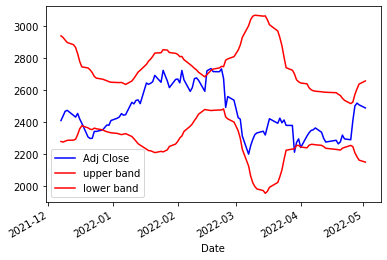

In [228]:
import copy

iilist = []
jjlist = []
narlist = []
srlist = []

#df = yf.download("HEROMOTOCO.NS", start="2016-12-31", progress=False)


for ii in range(2, 50):
  for jj in np.arange(0.5, 3, 0.1):
    bajajdf = copy.deepcopy(df)
    bajajdf["20EMA"] = bajajdf["Adj Close"].ewm(span=ii).mean()
    bajajdf["upper band"] = bajajdf["20EMA"] + jj*bajajdf["Adj Close"].rolling(window=20).std()
    bajajdf["lower band"] = bajajdf["20EMA"] - jj*bajajdf["Adj Close"].rolling(window=20).std()
    bajajdf.dropna(inplace=True)
    bajajdf["signal"] = np.where(bajajdf["Adj Close"]>bajajdf["upper band"], 0, 
                                np.where(bajajdf["Adj Close"]<bajajdf["lower band"], 1,
                                          np.nan))

    if (np.isnan(bajajdf["signal"][0])):
      bajajdf["signal"][0] = 0

    bajajdf.signal.fillna(method="ffill", inplace=True)
    bajajdf["signal"] = bajajdf["signal"].shift(1)
    bajajdf.dropna(inplace=True)
    bajajdf["ROC"] = np.log(bajajdf["Adj Close"] / bajajdf["Adj Close"].shift(1))
    bajajdf["Return"] = bajajdf["ROC"]*bajajdf["signal"]
    bajajdf["portfolio"] = np.exp(bajajdf["Return"].cumsum())
    bajajdf.dropna(inplace=True)
    duration_days = bajajdf.index.max()-bajajdf.index.min()
    duration_years = duration_days.days/365.25
    duration_in_trade = duration_years * bajajdf["signal"].mean()

    if (duration_in_trade!=0):
      net_avg_return = bajajdf.iloc[-1]["portfolio"]**(1/duration_in_trade)-1
      returns = bajajdf[bajajdf["Return"]!=0]["Return"]
      sharpe_ratio = (returns.mean()*250 - 0.05)/(returns.std()*np.sqrt(250))

    iilist.append(ii)
    jjlist.append(jj)
    kklist.append(kk)
    narlist.append(net_avg_return)
    srlist.append(sharpe_ratio)

    
    
# net average return based
print(f"n_ema: {iilist[np.argmax(narlist)]}")
print(f"n_sigma: {jjlist[np.argmax(narlist)]:0.2f}")
print(f"nar: {max(narlist)}")

# sharpe ratio return based
print(f"n_ema: {iilist[np.argmax(srlist)]}")
print(f"n_sigma: {jjlist[np.argmax(srlist)]:0.2f}")
print(f"sr: {max(srlist)}")

# resultdf = pd.DataFrame(np.column_stack([iilist, jjlist, narlist, srlist]), columns=["n_ema", "n_sig", "nar", "sr"])
# resultdf[(resultdf["n_ema"]==49) & (resultdf["n_sig"]>2.89) & (resultdf["n_sig"]<2.91) | (resultdf["n_ema"]==11) & (resultdf["n_sig"]>2.69) & (resultdf["n_sig"]<2.71)]
# resultdf[(resultdf["n_ema"]==49) | (resultdf["n_ema"]==11)]

tilist.append("bbands")
bestnarlist.append(max(narlist))
bestsrlist.append(max(srlist))









bajajdf[["Adj Close", "upper band", "lower band"]].tail(100).plot(color=('b','r','r'))








# Relative Strength Index

In [229]:
from ta.momentum import RSIIndicator
import copy

iilist = []
jjlist = []
kklist = []
narlist = []
srlist = []

#df = yf.download("HEROMOTOCO.NS", start="2016-12-31", progress=False)


for ii in range(10, 50, 2):
  for jj in range(10, 40, 2):
    for kk in range(60, 90, 2):
      bajajdf = copy.deepcopy(df)
      bajajdf["rsi"] = RSIIndicator(close=bajajdf["Adj Close"], window=ii).rsi()
      bajajdf.dropna(inplace=True)
      bajajdf["signal"] = np.where(bajajdf["rsi"]<jj, 1,
                                  np.where(bajajdf["rsi"]>kk, 0,
                                            np.nan))
      if(np.isnan(bajajdf["signal"][0])):
        bajajdf["signal"][0] = 0

      bajajdf.signal.fillna(method='ffill', inplace=True)
      bajajdf["signal"] = bajajdf["signal"].shift(1)
      bajajdf.dropna(inplace=True)
      bajajdf["ROC"] = np.log(bajajdf["Adj Close"] / bajajdf["Adj Close"].shift(1))
      bajajdf["Return"] = bajajdf["ROC"]*bajajdf["signal"]
      bajajdf["portfolio"] = np.exp(bajajdf["Return"].cumsum())
      bajajdf.dropna(inplace=True)
      duration_days = bajajdf.index.max()-bajajdf.index.min()
      duration_years = duration_days.days/365.25
      duration_in_trade = duration_years * bajajdf["signal"].mean()

      if (duration_in_trade!=0):
        net_avg_return = bajajdf.iloc[-1]["portfolio"]**(1/duration_in_trade)-1
        returns = bajajdf[bajajdf["Return"]!=0]["Return"]
        sharpe_ratio = (returns.mean()*250 - 0.05)/(returns.std()*np.sqrt(250))

      iilist.append(ii)
      jjlist.append(jj)
      kklist.append(kk)
      narlist.append(net_avg_return)
      srlist.append(sharpe_ratio)

    
    
    
# net average return based
print(f"n_window: {iilist[np.argmax(narlist)]}")
print(f"n_low: {jjlist[np.argmax(narlist)]}")
print(f"n_high: {kklist[np.argmax(narlist)]}")
print(f"nar: {max(narlist)}")

# sharpe ratio based
print(f"n_window: {iilist[np.argmax(srlist)]}")
print(f"n_low: {jjlist[np.argmax(srlist)]}")
print(f"n_high: {kklist[np.argmax(srlist)]}")
print(f"sr: {max(srlist)}")

# resultdf = pd.DataFrame(np.column_stack([iilist, jjlist, kklist, narlist, srlist]), columns=["n_window", "n_low", "n_high", "nar", "sr"])
# resultdf[(resultdf["n_window"]==10) & (resultdf["n_low"]==10) & (resultdf["n_high"]==84)]

tilist.append("rsi")
bestnarlist.append(max(narlist))
bestsrlist.append(max(srlist))








n_window: 34
n_low: 26
n_high: 62
nar: 6.42755077895728
n_window: 32
n_low: 26
n_high: 64
sr: 6.223399183252606


In [230]:
comparisondf = pd.DataFrame(np.column_stack([tilist, bestnarlist, bestsrlist]), columns=["Technical Indicator", "Best NAR", "Best SR"])
comparisondf

,Technical Indicator,Best NAR,Best SR
0,sma,0.189845285461399,0.5051744300714744
1,ema,0.12889373570516938,0.25761455653333204
2,macd,0.15811544484367657,0.35146101502878707
3,bbands,0.24278115961956526,0.5399556049479346
4,rsi,6.42755077895728,6.223399183252606


# Indicators for TVS Motor

In [231]:
tilist, bestnarlist, bestsrlist = [], [], []

# Simple Moving Average

duration in trade: 2.0400
net average return: -0.1056
sharpe ratio: -0.7443
sma1: 25
sma2: 30
nar: 0.7391638947848058
sma1: 25
sma2: 30
sr: 1.417409419712071


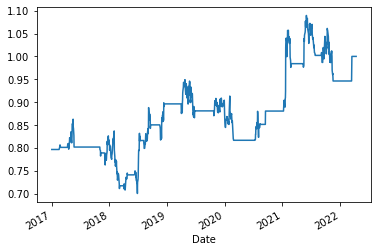

In [232]:
from ta.trend import SMAIndicator
bajajdf = bajajm_df
bajajdf["sma20"] = SMAIndicator(close=bajajdf["Adj Close"], window=20, fillna=True).sma_indicator()
bajajdf["sma50"] = SMAIndicator(close=bajajdf["Adj Close"], window=50, fillna=True).sma_indicator()
bajajdf["signal"] = np.where(bajajdf["sma20"]>bajajdf["sma50"], 1, 0)
bajajdf["signal"] = bajajdf["signal"].shift(1)
bajajdf.dropna(inplace=True)
bajajdf["signal"].describe()






bajajdf["ROC"] = np.log(bajajdf["Adj Close"] / bajajdf["Adj Close"].shift(1))
bajajdf["Return"] = bajajdf["ROC"]*bajajdf["signal"]
bajajdf["portfolio"] = np.exp(bajajdf["Return"].cumsum())
bajajdf.dropna(inplace=True)
bajajdf.tail(3)





bajajdf["portfolio"].plot()







duration_days = bajajdf.index.max()-bajajdf.index.min()
duration_years = duration_days.days/365.25
duration_in_trade = duration_years * bajajdf["signal"].mean()
print(f"duration in trade: {duration_in_trade:.4f}")

net_avg_return = bajajdf.iloc[-1]["portfolio"]**(1/duration_in_trade)-1
print(f"net average return: {net_avg_return:.4f}")

returns = bajajdf[bajajdf["Return"]!=0]["Return"]
sharpe_ratio = (returns.mean()*250 - 0.05)/(returns.std()*np.sqrt(250))
print(f"sharpe ratio: {sharpe_ratio:.4f}")







from ta.trend import SMAIndicator
import copy

iilist = []
jjlist = []
narlist = []
srlist = []

df = yf.download("TVSMOTOR.NS", start="2010-12-31", progress=False)


for ii in range(10, 295, 5):
  for jj in range(ii+5, 300, 5):
    bajajdf = copy.deepcopy(df)
    bajajdf["sma1"] = SMAIndicator(close=bajajdf["Adj Close"], window=ii, fillna=True).sma_indicator()
    bajajdf["sma2"] = SMAIndicator(close=bajajdf["Adj Close"], window=jj, fillna=True).sma_indicator()
    bajajdf["signal"] = np.where(bajajdf["sma1"]>bajajdf["sma2"], 1, 0)
    bajajdf["signal"] = bajajdf["signal"].shift(1)
    bajajdf.dropna(inplace=True)
    bajajdf["ROC"] = np.log(bajajdf["Adj Close"] / bajajdf["Adj Close"].shift(1))
    bajajdf["Return"] = bajajdf["ROC"]*bajajdf["signal"]
    bajajdf["portfolio"] = np.exp(bajajdf["Return"].cumsum())
    bajajdf.dropna(inplace=True)
    duration_days = bajajdf.index.max()-bajajdf.index.min()
    duration_years = duration_days.days/365.25
    duration_in_trade = duration_years * bajajdf["signal"].mean()

    if (duration_in_trade!=0):
      net_avg_return = bajajdf.iloc[-1]["portfolio"]**(1/duration_in_trade)-1
      returns = bajajdf[bajajdf["Return"]!=0]["Return"]
      sharpe_ratio = (returns.mean()*250 - 0.05)/(returns.std()*np.sqrt(250))

    iilist.append(ii)
    jjlist.append(jj)
    narlist.append(net_avg_return)
    srlist.append(sharpe_ratio)

    
    
    
# net average return based
print(f"sma1: {iilist[np.argmax(narlist)]}")
print(f"sma2: {jjlist[np.argmax(narlist)]}")
print(f"nar: {max(narlist)}")

# sharpe ratio based
print(f"sma1: {iilist[np.argmax(srlist)]}")
print(f"sma2: {jjlist[np.argmax(srlist)]}")
print(f"sr: {max(srlist)}")

# resultdf = pd.DataFrame(np.column_stack([iilist, jjlist, narlist, srlist]), columns=["sma1", "sma2", "nar", "sr"])
# resultdf[(resultdf["sma1"]==10) & (resultdf["sma2"]==20)]

tilist.append("sma")
bestnarlist.append(max(narlist))
bestsrlist.append(max(srlist))









# Exponential Moving Average

In [233]:
from ta.trend import SMAIndicator, EMAIndicator
import copy

iilist = []
jjlist = []
narlist = []
srlist = []

#df = yf.download("TVSMOTOR.NS", start="2010-12-31", progress=False)


for ii in range(10, 295, 5):
  for jj in range(ii+5, 300, 5):
    bajajdf = copy.deepcopy(df)
    bajajdf["sma1"] = EMAIndicator(close=bajajdf["Adj Close"], window=ii, fillna=True).ema_indicator()
    bajajdf["sma2"] = EMAIndicator(close=bajajdf["Adj Close"], window=jj, fillna=True).ema_indicator()
    bajajdf["signal"] = np.where(bajajdf["sma1"]>bajajdf["sma2"], 1, 0)
    bajajdf["signal"] = bajajdf["signal"].shift(1)
    bajajdf.dropna(inplace=True)
    bajajdf["ROC"] = np.log(bajajdf["Adj Close"] / bajajdf["Adj Close"].shift(1))
    bajajdf["Return"] = bajajdf["ROC"]*bajajdf["signal"]
    bajajdf["portfolio"] = np.exp(bajajdf["Return"].cumsum())
    bajajdf.dropna(inplace=True)
    duration_days = bajajdf.index.max()-bajajdf.index.min()
    duration_years = duration_days.days/365.25
    duration_in_trade = duration_years * bajajdf["signal"].mean()

    if (duration_in_trade!=0):
      net_avg_return = bajajdf.iloc[-1]["portfolio"]**(1/duration_in_trade)-1
      returns = bajajdf[bajajdf["Return"]!=0]["Return"]
      sharpe_ratio = (returns.mean()*250 - 0.05)/(returns.std()*np.sqrt(250))

    iilist.append(ii)
    jjlist.append(jj)
    narlist.append(net_avg_return)
    srlist.append(sharpe_ratio)

    
# net average return based
print(f"sma1: {iilist[np.argmax(narlist)]}")
print(f"sma2: {jjlist[np.argmax(narlist)]}")
print(f"nar: {max(narlist)}")

# sharpe ratio based
print(f"sma1: {iilist[np.argmax(srlist)]}")
print(f"sma2: {jjlist[np.argmax(srlist)]}")
print(f"sr: {max(srlist)}")

# resultdf = pd.DataFrame(np.column_stack([iilist, jjlist, narlist, srlist]), columns=["sma1", "sma2", "nar", "sr"])
# resultdf[(resultdf["sma1"]==10) & (resultdf["sma2"]==20)]

tilist.append("ema")
bestnarlist.append(max(narlist))
bestsrlist.append(max(srlist))












sma1: 170
sma2: 230
nar: 0.5592703064488849
sma1: 170
sma2: 230
sr: 1.149893757788948


# Moving Average Convergence Divergence

In [234]:
import copy

iilist = []
jjlist = []
kklist = []
narlist = []
srlist = []

#df = yf.download("TVSMOTOR.NS", start="2010-12-31", progress=False)


for ii in range(4, 40, 2):
  for jj in range(ii+8, 80, 2):
    for kk in range(3, 20, 1):
      bajajdf = copy.deepcopy(df)
      bajajdf["macd line"] = bajajdf["Adj Close"].ewm(span=ii).mean() - bajajdf["Adj Close"].ewm(span=jj).mean()
      bajajdf["signal line"] = bajajdf["macd line"].ewm(span=kk).mean()
      bajajdf["signal"] = np.where(bajajdf["macd line"]>=bajajdf["signal line"], 1, 0)
      bajajdf["signal"] = bajajdf["signal"].shift(1)
      bajajdf["ROC"] = np.log(bajajdf["Adj Close"] / bajajdf["Adj Close"].shift(1))
      bajajdf["Return"] = bajajdf["ROC"]*bajajdf["signal"]
      bajajdf["portfolio"] = np.exp(bajajdf["Return"].cumsum())
      bajajdf.dropna(inplace=True)
      duration_days = bajajdf.index.max()-bajajdf.index.min()
      duration_years = duration_days.days/365.25
      duration_in_trade = duration_years * bajajdf["signal"].mean()

      if (duration_in_trade!=0):
        net_avg_return = bajajdf.iloc[-1]["portfolio"]**(1/duration_in_trade)-1
        returns = bajajdf[bajajdf["Return"]!=0]["Return"]
        sharpe_ratio = (returns.mean()*250 - 0.05)/(returns.std()*np.sqrt(250))

      iilist.append(ii)
      jjlist.append(jj)
      kklist.append(kk)
      narlist.append(net_avg_return)
      srlist.append(sharpe_ratio)

    
    
# net average return based
print(f"nfast: {iilist[np.argmax(narlist)]}")
print(f"nslow: {jjlist[np.argmax(narlist)]}")
print(f"nsig: {kklist[np.argmax(narlist)]}")
print(f"nar: {max(narlist)}")

# sharpe ratio based
print(f"nfast: {iilist[np.argmax(srlist)]}")
print(f"nslow: {jjlist[np.argmax(srlist)]}")
print(f"nsig: {kklist[np.argmax(srlist)]}")
print(f"sr: {max(srlist)}")

# resultdf = pd.DataFrame(np.column_stack([iilist, jjlist, kklist, narlist, srlist]), columns=["nfast", "nslow", "nsig", "nar", "sr"])
# resultdf[(resultdf["nfast"]==36) & (resultdf["nslow"]==44) & (resultdf["nsig"]==8)]

tilist.append("macd")
bestnarlist.append(max(narlist))
bestsrlist.append(max(srlist))










nfast: 10
nslow: 42
nsig: 3
nar: 0.5049945239666958
nfast: 20
nslow: 48
nsig: 3
sr: 1.0004402186913812


# Bollinger Bands

n_ema: 28
n_sigma: 2.90
nar: 0.7348589533858401
n_ema: 19
n_sigma: 2.50
sr: 1.38069554983104


<AxesSubplot:xlabel='Date'>

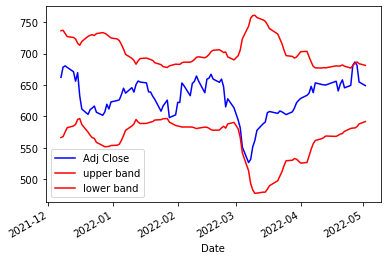

In [235]:
import copy

iilist = []
jjlist = []
narlist = []
srlist = []

#df = yf.download("TVSMOTOR.NS", start="2016-12-31", progress=False)


for ii in range(2, 50):
  for jj in np.arange(0.5, 3, 0.1):
    bajajdf = copy.deepcopy(df)
    bajajdf["20EMA"] = bajajdf["Adj Close"].ewm(span=ii).mean()
    bajajdf["upper band"] = bajajdf["20EMA"] + jj*bajajdf["Adj Close"].rolling(window=20).std()
    bajajdf["lower band"] = bajajdf["20EMA"] - jj*bajajdf["Adj Close"].rolling(window=20).std()
    bajajdf.dropna(inplace=True)
    bajajdf["signal"] = np.where(bajajdf["Adj Close"]>bajajdf["upper band"], 0, 
                                np.where(bajajdf["Adj Close"]<bajajdf["lower band"], 1,
                                          np.nan))

    if (np.isnan(bajajdf["signal"][0])):
      bajajdf["signal"][0] = 0

    bajajdf.signal.fillna(method="ffill", inplace=True)
    bajajdf["signal"] = bajajdf["signal"].shift(1)
    bajajdf.dropna(inplace=True)
    bajajdf["ROC"] = np.log(bajajdf["Adj Close"] / bajajdf["Adj Close"].shift(1))
    bajajdf["Return"] = bajajdf["ROC"]*bajajdf["signal"]
    bajajdf["portfolio"] = np.exp(bajajdf["Return"].cumsum())
    bajajdf.dropna(inplace=True)
    duration_days = bajajdf.index.max()-bajajdf.index.min()
    duration_years = duration_days.days/365.25
    duration_in_trade = duration_years * bajajdf["signal"].mean()

    if (duration_in_trade!=0):
      net_avg_return = bajajdf.iloc[-1]["portfolio"]**(1/duration_in_trade)-1
      returns = bajajdf[bajajdf["Return"]!=0]["Return"]
      sharpe_ratio = (returns.mean()*250 - 0.05)/(returns.std()*np.sqrt(250))

    iilist.append(ii)
    jjlist.append(jj)
    kklist.append(kk)
    narlist.append(net_avg_return)
    srlist.append(sharpe_ratio)

    
# net average return based
print(f"n_ema: {iilist[np.argmax(narlist)]}")
print(f"n_sigma: {jjlist[np.argmax(narlist)]:0.2f}")
print(f"nar: {max(narlist)}")

# sharpe ratio return based
print(f"n_ema: {iilist[np.argmax(srlist)]}")
print(f"n_sigma: {jjlist[np.argmax(srlist)]:0.2f}")
print(f"sr: {max(srlist)}")

# resultdf = pd.DataFrame(np.column_stack([iilist, jjlist, narlist, srlist]), columns=["n_ema", "n_sig", "nar", "sr"])
# resultdf[(resultdf["n_ema"]==49) & (resultdf["n_sig"]>2.89) & (resultdf["n_sig"]<2.91) | (resultdf["n_ema"]==11) & (resultdf["n_sig"]>2.69) & (resultdf["n_sig"]<2.71)]
# resultdf[(resultdf["n_ema"]==49) | (resultdf["n_ema"]==11)]

tilist.append("bbands")
bestnarlist.append(max(narlist))
bestsrlist.append(max(srlist))









bajajdf[["Adj Close", "upper band", "lower band"]].tail(100).plot(color=('b','r','r'))









# Relative Strength Index

In [236]:
from ta.momentum import RSIIndicator
import copy

iilist = []
jjlist = []
kklist = []
narlist = []
srlist = []

#df = yf.download("TVSMOTOR.NS", start="2016-12-31", progress=False)


for ii in range(10, 50, 2):
  for jj in range(10, 40, 2):
    for kk in range(60, 90, 2):
      bajajdf = copy.deepcopy(df)
      bajajdf["rsi"] = RSIIndicator(close=bajajdf["Adj Close"], window=ii).rsi()
      bajajdf.dropna(inplace=True)
      bajajdf["signal"] = np.where(bajajdf["rsi"]<jj, 1,
                                  np.where(bajajdf["rsi"]>kk, 0,
                                            np.nan))
      if(np.isnan(bajajdf["signal"][0])):
        bajajdf["signal"][0] = 0

      bajajdf.signal.fillna(method='ffill', inplace=True)
      bajajdf["signal"] = bajajdf["signal"].shift(1)
      bajajdf.dropna(inplace=True)
      bajajdf["ROC"] = np.log(bajajdf["Adj Close"] / bajajdf["Adj Close"].shift(1))
      bajajdf["Return"] = bajajdf["ROC"]*bajajdf["signal"]
      bajajdf["portfolio"] = np.exp(bajajdf["Return"].cumsum())
      bajajdf.dropna(inplace=True)
      duration_days = bajajdf.index.max()-bajajdf.index.min()
      duration_years = duration_days.days/365.25
      duration_in_trade = duration_years * bajajdf["signal"].mean()

      if (duration_in_trade!=0):
        net_avg_return = bajajdf.iloc[-1]["portfolio"]**(1/duration_in_trade)-1
        returns = bajajdf[bajajdf["Return"]!=0]["Return"]
        sharpe_ratio = (returns.mean()*250 - 0.05)/(returns.std()*np.sqrt(250))

      iilist.append(ii)
      jjlist.append(jj)
      kklist.append(kk)
      narlist.append(net_avg_return)
      srlist.append(sharpe_ratio)

    
    
# net average return based
print(f"n_window: {iilist[np.argmax(narlist)]}")
print(f"n_low: {jjlist[np.argmax(narlist)]}")
print(f"n_high: {kklist[np.argmax(narlist)]}")
print(f"nar: {max(narlist)}")

# sharpe ratio based
print(f"n_window: {iilist[np.argmax(srlist)]}")
print(f"n_low: {jjlist[np.argmax(srlist)]}")
print(f"n_high: {kklist[np.argmax(srlist)]}")
print(f"sr: {max(srlist)}")

# resultdf = pd.DataFrame(np.column_stack([iilist, jjlist, kklist, narlist, srlist]), columns=["n_window", "n_low", "n_high", "nar", "sr"])
# resultdf[(resultdf["n_window"]==10) & (resultdf["n_low"]==10) & (resultdf["n_high"]==84)]

tilist.append("rsi")
bestnarlist.append(max(narlist))
bestsrlist.append(max(srlist))








n_window: 18
n_low: 20
n_high: 60
nar: 7.837121260643434
n_window: 12
n_low: 16
n_high: 88
sr: 6.2776788883073795


In [237]:
comparisondf = pd.DataFrame(np.column_stack([tilist, bestnarlist, bestsrlist]), columns=["Technical Indicator", "Best NAR", "Best SR"])
comparisondf

,Technical Indicator,Best NAR,Best SR
0,sma,0.7391638947848058,1.417409419712071
1,ema,0.5592703064488849,1.149893757788948
2,macd,0.5049945239666958,1.0004402186913812
3,bbands,0.7348589533858401,1.38069554983104
4,rsi,7.837121260643434,6.2776788883073795


# Indicators for INR=X

In [238]:
tilist, bestnarlist, bestsrlist = [], [], []

# Simple Moving Average

duration in trade: 2.0330
net average return: -0.0813
sharpe ratio: -0.6244
sma1: 15
sma2: 20
nar: 0.08236190140919164
sma1: 15
sma2: 20
sr: 0.3217339490708745


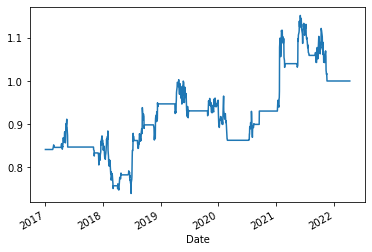

In [239]:
from ta.trend import SMAIndicator
bajajdf = bajajm_df
bajajdf["sma20"] = SMAIndicator(close=bajajdf["Adj Close"], window=20, fillna=True).sma_indicator()
bajajdf["sma50"] = SMAIndicator(close=bajajdf["Adj Close"], window=50, fillna=True).sma_indicator()
bajajdf["signal"] = np.where(bajajdf["sma20"]>bajajdf["sma50"], 1, 0)
bajajdf["signal"] = bajajdf["signal"].shift(1)
bajajdf.dropna(inplace=True)
bajajdf["signal"].describe()






bajajdf["ROC"] = np.log(bajajdf["Adj Close"] / bajajdf["Adj Close"].shift(1))
bajajdf["Return"] = bajajdf["ROC"]*bajajdf["signal"]
bajajdf["portfolio"] = np.exp(bajajdf["Return"].cumsum())
bajajdf.dropna(inplace=True)
bajajdf.tail(3)





bajajdf["portfolio"].plot()







duration_days = bajajdf.index.max()-bajajdf.index.min()
duration_years = duration_days.days/365.25
duration_in_trade = duration_years * bajajdf["signal"].mean()
print(f"duration in trade: {duration_in_trade:.4f}")

net_avg_return = bajajdf.iloc[-1]["portfolio"]**(1/duration_in_trade)-1
print(f"net average return: {net_avg_return:.4f}")

returns = bajajdf[bajajdf["Return"]!=0]["Return"]
sharpe_ratio = (returns.mean()*250 - 0.05)/(returns.std()*np.sqrt(250))
print(f"sharpe ratio: {sharpe_ratio:.4f}")







from ta.trend import SMAIndicator
import copy

iilist = []
jjlist = []
narlist = []
srlist = []

df = yf.download("INR=X", start="2010-12-31", progress=False)


for ii in range(10, 295, 5):
  for jj in range(ii+5, 300, 5):
    bajajdf = copy.deepcopy(df)
    bajajdf["sma1"] = SMAIndicator(close=bajajdf["Adj Close"], window=ii, fillna=True).sma_indicator()
    bajajdf["sma2"] = SMAIndicator(close=bajajdf["Adj Close"], window=jj, fillna=True).sma_indicator()
    bajajdf["signal"] = np.where(bajajdf["sma1"]>bajajdf["sma2"], 1, 0)
    bajajdf["signal"] = bajajdf["signal"].shift(1)
    bajajdf.dropna(inplace=True)
    bajajdf["ROC"] = np.log(bajajdf["Adj Close"] / bajajdf["Adj Close"].shift(1))
    bajajdf["Return"] = bajajdf["ROC"]*bajajdf["signal"]
    bajajdf["portfolio"] = np.exp(bajajdf["Return"].cumsum())
    bajajdf.dropna(inplace=True)
    duration_days = bajajdf.index.max()-bajajdf.index.min()
    duration_years = duration_days.days/365.25
    duration_in_trade = duration_years * bajajdf["signal"].mean()

    if (duration_in_trade!=0):
      net_avg_return = bajajdf.iloc[-1]["portfolio"]**(1/duration_in_trade)-1
      returns = bajajdf[bajajdf["Return"]!=0]["Return"]
      sharpe_ratio = (returns.mean()*250 - 0.05)/(returns.std()*np.sqrt(250))

    iilist.append(ii)
    jjlist.append(jj)
    narlist.append(net_avg_return)
    srlist.append(sharpe_ratio)

    
    
    
# net average return based
print(f"sma1: {iilist[np.argmax(narlist)]}")
print(f"sma2: {jjlist[np.argmax(narlist)]}")
print(f"nar: {max(narlist)}")

# sharpe ratio based
print(f"sma1: {iilist[np.argmax(srlist)]}")
print(f"sma2: {jjlist[np.argmax(srlist)]}")
print(f"sr: {max(srlist)}")

# resultdf = pd.DataFrame(np.column_stack([iilist, jjlist, narlist, srlist]), columns=["sma1", "sma2", "nar", "sr"])
# resultdf[(resultdf["sma1"]==10) & (resultdf["sma2"]==20)]

tilist.append("sma")
bestnarlist.append(max(narlist))
bestsrlist.append(max(srlist))









# Exponential Moving Average

In [240]:
from ta.trend import SMAIndicator, EMAIndicator
import copy

iilist = []
jjlist = []
narlist = []
srlist = []

#df = yf.download("INR=X", start="2010-12-31", progress=False)


for ii in range(10, 295, 5):
  for jj in range(ii+5, 300, 5):
    bajajdf = copy.deepcopy(df)
    bajajdf["sma1"] = EMAIndicator(close=bajajdf["Adj Close"], window=ii, fillna=True).ema_indicator()
    bajajdf["sma2"] = EMAIndicator(close=bajajdf["Adj Close"], window=jj, fillna=True).ema_indicator()
    bajajdf["signal"] = np.where(bajajdf["sma1"]>bajajdf["sma2"], 1, 0)
    bajajdf["signal"] = bajajdf["signal"].shift(1)
    bajajdf.dropna(inplace=True)
    bajajdf["ROC"] = np.log(bajajdf["Adj Close"] / bajajdf["Adj Close"].shift(1))
    bajajdf["Return"] = bajajdf["ROC"]*bajajdf["signal"]
    bajajdf["portfolio"] = np.exp(bajajdf["Return"].cumsum())
    bajajdf.dropna(inplace=True)
    duration_days = bajajdf.index.max()-bajajdf.index.min()
    duration_years = duration_days.days/365.25
    duration_in_trade = duration_years * bajajdf["signal"].mean()

    if (duration_in_trade!=0):
      net_avg_return = bajajdf.iloc[-1]["portfolio"]**(1/duration_in_trade)-1
      returns = bajajdf[bajajdf["Return"]!=0]["Return"]
      sharpe_ratio = (returns.mean()*250 - 0.05)/(returns.std()*np.sqrt(250))

    iilist.append(ii)
    jjlist.append(jj)
    narlist.append(net_avg_return)
    srlist.append(sharpe_ratio)

    
    
    
# net average return based
print(f"sma1: {iilist[np.argmax(narlist)]}")
print(f"sma2: {jjlist[np.argmax(narlist)]}")
print(f"nar: {max(narlist)}")

# sharpe ratio based
print(f"sma1: {iilist[np.argmax(srlist)]}")
print(f"sma2: {jjlist[np.argmax(srlist)]}")
print(f"sr: {max(srlist)}")

# resultdf = pd.DataFrame(np.column_stack([iilist, jjlist, narlist, srlist]), columns=["sma1", "sma2", "nar", "sr"])
# resultdf[(resultdf["sma1"]==10) & (resultdf["sma2"]==20)]

tilist.append("ema")
bestnarlist.append(max(narlist))
bestsrlist.append(max(srlist))














sma1: 10
sma2: 30
nar: 0.06611944268033443
sma1: 10
sma2: 30
sr: 0.14294534705272796


# Moving Average Convergence Divergence

In [241]:
import copy

iilist = []
jjlist = []
kklist = []
narlist = []
srlist = []

#df = yf.download("INR=X", start="2010-12-31", progress=False)


for ii in range(4, 40, 2):
  for jj in range(ii+8, 80, 2):
    for kk in range(3, 20, 1):
      bajajdf = copy.deepcopy(df)
      bajajdf["macd line"] = bajajdf["Adj Close"].ewm(span=ii).mean() - bajajdf["Adj Close"].ewm(span=jj).mean()
      bajajdf["signal line"] = bajajdf["macd line"].ewm(span=kk).mean()
      bajajdf["signal"] = np.where(bajajdf["macd line"]>=bajajdf["signal line"], 1, 0)
      bajajdf["signal"] = bajajdf["signal"].shift(1)
      bajajdf["ROC"] = np.log(bajajdf["Adj Close"] / bajajdf["Adj Close"].shift(1))
      bajajdf["Return"] = bajajdf["ROC"]*bajajdf["signal"]
      bajajdf["portfolio"] = np.exp(bajajdf["Return"].cumsum())
      bajajdf.dropna(inplace=True)
      duration_days = bajajdf.index.max()-bajajdf.index.min()
      duration_years = duration_days.days/365.25
      duration_in_trade = duration_years * bajajdf["signal"].mean()

      if (duration_in_trade!=0):
        net_avg_return = bajajdf.iloc[-1]["portfolio"]**(1/duration_in_trade)-1
        returns = bajajdf[bajajdf["Return"]!=0]["Return"]
        sharpe_ratio = (returns.mean()*250 - 0.05)/(returns.std()*np.sqrt(250))

      iilist.append(ii)
      jjlist.append(jj)
      kklist.append(kk)
      narlist.append(net_avg_return)
      srlist.append(sharpe_ratio)

    
    
# net average return based
print(f"nfast: {iilist[np.argmax(narlist)]}")
print(f"nslow: {jjlist[np.argmax(narlist)]}")
print(f"nsig: {kklist[np.argmax(narlist)]}")
print(f"nar: {max(narlist)}")

# sharpe ratio based
print(f"nfast: {iilist[np.argmax(srlist)]}")
print(f"nslow: {jjlist[np.argmax(srlist)]}")
print(f"nsig: {kklist[np.argmax(srlist)]}")
print(f"sr: {max(srlist)}")

# resultdf = pd.DataFrame(np.column_stack([iilist, jjlist, kklist, narlist, srlist]), columns=["nfast", "nslow", "nsig", "nar", "sr"])
# resultdf[(resultdf["nfast"]==36) & (resultdf["nslow"]==44) & (resultdf["nsig"]==8)]

tilist.append("macd")
bestnarlist.append(max(narlist))
bestsrlist.append(max(srlist))









nfast: 18
nslow: 28
nsig: 18
nar: 0.10508749626607639
nfast: 18
nslow: 28
nsig: 18
sr: 0.5810806529107688


# Bollinger Bands

n_ema: 3
n_sigma: 1.70
nar: 5.838715280965232
n_ema: 3
n_sigma: 1.70
sr: 25.147960465235613


<AxesSubplot:xlabel='Date'>

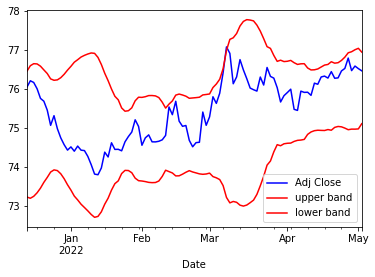

In [242]:
import copy

iilist = []
jjlist = []
narlist = []
srlist = []

#df = yf.download("INR=X", start="2016-12-31", progress=False)


for ii in range(2, 50):
  for jj in np.arange(0.5, 3, 0.1):
    bajajdf = copy.deepcopy(df)
    bajajdf["20EMA"] = bajajdf["Adj Close"].ewm(span=ii).mean()
    bajajdf["upper band"] = bajajdf["20EMA"] + jj*bajajdf["Adj Close"].rolling(window=20).std()
    bajajdf["lower band"] = bajajdf["20EMA"] - jj*bajajdf["Adj Close"].rolling(window=20).std()
    bajajdf.dropna(inplace=True)
    bajajdf["signal"] = np.where(bajajdf["Adj Close"]>bajajdf["upper band"], 0, 
                                np.where(bajajdf["Adj Close"]<bajajdf["lower band"], 1,
                                          np.nan))

    if (np.isnan(bajajdf["signal"][0])):
      bajajdf["signal"][0] = 0

    bajajdf.signal.fillna(method="ffill", inplace=True)
    bajajdf["signal"] = bajajdf["signal"].shift(1)
    bajajdf.dropna(inplace=True)
    bajajdf["ROC"] = np.log(bajajdf["Adj Close"] / bajajdf["Adj Close"].shift(1))
    bajajdf["Return"] = bajajdf["ROC"]*bajajdf["signal"]
    bajajdf["portfolio"] = np.exp(bajajdf["Return"].cumsum())
    bajajdf.dropna(inplace=True)
    duration_days = bajajdf.index.max()-bajajdf.index.min()
    duration_years = duration_days.days/365.25
    duration_in_trade = duration_years * bajajdf["signal"].mean()

    if (duration_in_trade!=0):
      net_avg_return = bajajdf.iloc[-1]["portfolio"]**(1/duration_in_trade)-1
      returns = bajajdf[bajajdf["Return"]!=0]["Return"]
      sharpe_ratio = (returns.mean()*250 - 0.05)/(returns.std()*np.sqrt(250))

    iilist.append(ii)
    jjlist.append(jj)
    kklist.append(kk)
    narlist.append(net_avg_return)
    srlist.append(sharpe_ratio)

    
    
# net average return based
print(f"n_ema: {iilist[np.argmax(narlist)]}")
print(f"n_sigma: {jjlist[np.argmax(narlist)]:0.2f}")
print(f"nar: {max(narlist)}")

# sharpe ratio return based
print(f"n_ema: {iilist[np.argmax(srlist)]}")
print(f"n_sigma: {jjlist[np.argmax(srlist)]:0.2f}")
print(f"sr: {max(srlist)}")

# resultdf = pd.DataFrame(np.column_stack([iilist, jjlist, narlist, srlist]), columns=["n_ema", "n_sig", "nar", "sr"])
# resultdf[(resultdf["n_ema"]==49) & (resultdf["n_sig"]>2.89) & (resultdf["n_sig"]<2.91) | (resultdf["n_ema"]==11) & (resultdf["n_sig"]>2.69) & (resultdf["n_sig"]<2.71)]
# resultdf[(resultdf["n_ema"]==49) | (resultdf["n_ema"]==11)]

tilist.append("bbands")
bestnarlist.append(max(narlist))
bestsrlist.append(max(srlist))









bajajdf[["Adj Close", "upper band", "lower band"]].tail(100).plot(color=('b','r','r'))









# Relative Strength Index

In [243]:
from ta.momentum import RSIIndicator
import copy

iilist = []
jjlist = []
kklist = []
narlist = []
srlist = []

#df = yf.download("INR=X", start="2016-12-31", progress=False)


for ii in range(10, 50, 2):
  for jj in range(10, 40, 2):
    for kk in range(60, 90, 2):
      bajajdf = copy.deepcopy(df)
      bajajdf["rsi"] = RSIIndicator(close=bajajdf["Adj Close"], window=ii).rsi()
      bajajdf.dropna(inplace=True)
      bajajdf["signal"] = np.where(bajajdf["rsi"]<jj, 1,
                                  np.where(bajajdf["rsi"]>kk, 0,
                                            np.nan))
      if(np.isnan(bajajdf["signal"][0])):
        bajajdf["signal"][0] = 0

      bajajdf.signal.fillna(method='ffill', inplace=True)
      bajajdf["signal"] = bajajdf["signal"].shift(1)
      bajajdf.dropna(inplace=True)
      bajajdf["ROC"] = np.log(bajajdf["Adj Close"] / bajajdf["Adj Close"].shift(1))
      bajajdf["Return"] = bajajdf["ROC"]*bajajdf["signal"]
      bajajdf["portfolio"] = np.exp(bajajdf["Return"].cumsum())
      bajajdf.dropna(inplace=True)
      duration_days = bajajdf.index.max()-bajajdf.index.min()
      duration_years = duration_days.days/365.25
      duration_in_trade = duration_years * bajajdf["signal"].mean()

      if (duration_in_trade!=0):
        net_avg_return = bajajdf.iloc[-1]["portfolio"]**(1/duration_in_trade)-1
        returns = bajajdf[bajajdf["Return"]!=0]["Return"]
        sharpe_ratio = (returns.mean()*250 - 0.05)/(returns.std()*np.sqrt(250))

      iilist.append(ii)
      jjlist.append(jj)
      kklist.append(kk)
      narlist.append(net_avg_return)
      srlist.append(sharpe_ratio)

    
    
# net average return based
print(f"n_window: {iilist[np.argmax(narlist)]}")
print(f"n_low: {jjlist[np.argmax(narlist)]}")
print(f"n_high: {kklist[np.argmax(narlist)]}")
print(f"nar: {max(narlist)}")

# sharpe ratio based
print(f"n_window: {iilist[np.argmax(srlist)]}")
print(f"n_low: {jjlist[np.argmax(srlist)]}")
print(f"n_high: {kklist[np.argmax(srlist)]}")
print(f"sr: {max(srlist)}")

# resultdf = pd.DataFrame(np.column_stack([iilist, jjlist, kklist, narlist, srlist]), columns=["n_window", "n_low", "n_high", "nar", "sr"])
# resultdf[(resultdf["n_window"]==10) & (resultdf["n_low"]==10) & (resultdf["n_high"]==84)]

tilist.append("rsi")
bestnarlist.append(max(narlist))
bestsrlist.append(max(srlist))









n_window: 10
n_low: 14
n_high: 60
nar: 1.5653528653812292
n_window: 10
n_low: 14
n_high: 60
sr: 9.788619114455619


In [244]:
comparisondf = pd.DataFrame(np.column_stack([tilist, bestnarlist, bestsrlist]), columns=["Technical Indicator", "Best NAR", "Best SR"])
comparisondf

,Technical Indicator,Best NAR,Best SR
0,sma,0.08236190140919164,0.3217339490708745
1,ema,0.06611944268033443,0.14294534705272796
2,macd,0.10508749626607639,0.5810806529107688
3,bbands,5.838715280965232,25.147960465235613
4,rsi,1.5653528653812292,9.788619114455619


# Indicators for S&P500

In [245]:
tilist, bestnarlist, bestsrlist = [], [], []

# Simple Moving Average

duration in trade: 2.0319
net average return: -0.0813
sharpe ratio: -0.6244
sma1: 195
sma2: 215
nar: 0.14651218661988286
sma1: 195
sma2: 215
sr: 0.5054872222598451


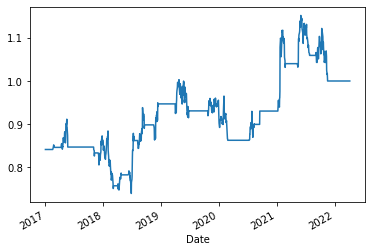

In [246]:
from ta.trend import SMAIndicator
bajajdf = bajajm_df
bajajdf["sma20"] = SMAIndicator(close=bajajdf["Adj Close"], window=20, fillna=True).sma_indicator()
bajajdf["sma50"] = SMAIndicator(close=bajajdf["Adj Close"], window=50, fillna=True).sma_indicator()
bajajdf["signal"] = np.where(bajajdf["sma20"]>bajajdf["sma50"], 1, 0)
bajajdf["signal"] = bajajdf["signal"].shift(1)
bajajdf.dropna(inplace=True)
bajajdf["signal"].describe()






bajajdf["ROC"] = np.log(bajajdf["Adj Close"] / bajajdf["Adj Close"].shift(1))
bajajdf["Return"] = bajajdf["ROC"]*bajajdf["signal"]
bajajdf["portfolio"] = np.exp(bajajdf["Return"].cumsum())
bajajdf.dropna(inplace=True)
bajajdf.tail(3)





bajajdf["portfolio"].plot()







duration_days = bajajdf.index.max()-bajajdf.index.min()
duration_years = duration_days.days/365.25
duration_in_trade = duration_years * bajajdf["signal"].mean()
print(f"duration in trade: {duration_in_trade:.4f}")

net_avg_return = bajajdf.iloc[-1]["portfolio"]**(1/duration_in_trade)-1
print(f"net average return: {net_avg_return:.4f}")

returns = bajajdf[bajajdf["Return"]!=0]["Return"]
sharpe_ratio = (returns.mean()*250 - 0.05)/(returns.std()*np.sqrt(250))
print(f"sharpe ratio: {sharpe_ratio:.4f}")







from ta.trend import SMAIndicator
import copy

iilist = []
jjlist = []
narlist = []
srlist = []

df = yf.download("^GSPC", start="2010-12-31", progress=False)


for ii in range(10, 295, 5):
  for jj in range(ii+5, 300, 5):
    bajajdf = copy.deepcopy(df)
    bajajdf["sma1"] = SMAIndicator(close=bajajdf["Adj Close"], window=ii, fillna=True).sma_indicator()
    bajajdf["sma2"] = SMAIndicator(close=bajajdf["Adj Close"], window=jj, fillna=True).sma_indicator()
    bajajdf["signal"] = np.where(bajajdf["sma1"]>bajajdf["sma2"], 1, 0)
    bajajdf["signal"] = bajajdf["signal"].shift(1)
    bajajdf.dropna(inplace=True)
    bajajdf["ROC"] = np.log(bajajdf["Adj Close"] / bajajdf["Adj Close"].shift(1))
    bajajdf["Return"] = bajajdf["ROC"]*bajajdf["signal"]
    bajajdf["portfolio"] = np.exp(bajajdf["Return"].cumsum())
    bajajdf.dropna(inplace=True)
    duration_days = bajajdf.index.max()-bajajdf.index.min()
    duration_years = duration_days.days/365.25
    duration_in_trade = duration_years * bajajdf["signal"].mean()

    if (duration_in_trade!=0):
      net_avg_return = bajajdf.iloc[-1]["portfolio"]**(1/duration_in_trade)-1
      returns = bajajdf[bajajdf["Return"]!=0]["Return"]
      sharpe_ratio = (returns.mean()*250 - 0.05)/(returns.std()*np.sqrt(250))

    iilist.append(ii)
    jjlist.append(jj)
    narlist.append(net_avg_return)
    srlist.append(sharpe_ratio)

    
    
# net average return based
print(f"sma1: {iilist[np.argmax(narlist)]}")
print(f"sma2: {jjlist[np.argmax(narlist)]}")
print(f"nar: {max(narlist)}")

# sharpe ratio based
print(f"sma1: {iilist[np.argmax(srlist)]}")
print(f"sma2: {jjlist[np.argmax(srlist)]}")
print(f"sr: {max(srlist)}")

# resultdf = pd.DataFrame(np.column_stack([iilist, jjlist, narlist, srlist]), columns=["sma1", "sma2", "nar", "sr"])
# resultdf[(resultdf["sma1"]==10) & (resultdf["sma2"]==20)]

tilist.append("sma")
bestnarlist.append(max(narlist))
bestsrlist.append(max(srlist))








# Exponential Moving Average

In [247]:
from ta.trend import SMAIndicator, EMAIndicator
import copy

iilist = []
jjlist = []
narlist = []
srlist = []

#df = yf.download("^GSPC", start="2010-12-31", progress=False)


for ii in range(10, 295, 5):
  for jj in range(ii+5, 300, 5):
    bajajdf = copy.deepcopy(df)
    bajajdf["sma1"] = EMAIndicator(close=bajajdf["Adj Close"], window=ii, fillna=True).ema_indicator()
    bajajdf["sma2"] = EMAIndicator(close=bajajdf["Adj Close"], window=jj, fillna=True).ema_indicator()
    bajajdf["signal"] = np.where(bajajdf["sma1"]>bajajdf["sma2"], 1, 0)
    bajajdf["signal"] = bajajdf["signal"].shift(1)
    bajajdf.dropna(inplace=True)
    bajajdf["ROC"] = np.log(bajajdf["Adj Close"] / bajajdf["Adj Close"].shift(1))
    bajajdf["Return"] = bajajdf["ROC"]*bajajdf["signal"]
    bajajdf["portfolio"] = np.exp(bajajdf["Return"].cumsum())
    bajajdf.dropna(inplace=True)
    duration_days = bajajdf.index.max()-bajajdf.index.min()
    duration_years = duration_days.days/365.25
    duration_in_trade = duration_years * bajajdf["signal"].mean()

    if (duration_in_trade!=0):
      net_avg_return = bajajdf.iloc[-1]["portfolio"]**(1/duration_in_trade)-1
      returns = bajajdf[bajajdf["Return"]!=0]["Return"]
      sharpe_ratio = (returns.mean()*250 - 0.05)/(returns.std()*np.sqrt(250))

    iilist.append(ii)
    jjlist.append(jj)
    narlist.append(net_avg_return)
    srlist.append(sharpe_ratio)

    
    
    
# net average return based
print(f"sma1: {iilist[np.argmax(narlist)]}")
print(f"sma2: {jjlist[np.argmax(narlist)]}")
print(f"nar: {max(narlist)}")

# sharpe ratio based
print(f"sma1: {iilist[np.argmax(srlist)]}")
print(f"sma2: {jjlist[np.argmax(srlist)]}")
print(f"sr: {max(srlist)}")

# resultdf = pd.DataFrame(np.column_stack([iilist, jjlist, narlist, srlist]), columns=["sma1", "sma2", "nar", "sr"])
# resultdf[(resultdf["sma1"]==10) & (resultdf["sma2"]==20)]

tilist.append("ema")
bestnarlist.append(max(narlist))
bestsrlist.append(max(srlist))










sma1: 200
sma2: 295
nar: 0.10564380830539344
sma1: 20
sma2: 60
sr: 0.3828293149885534


# Moving Average Convergence Divergence

In [248]:
import copy

iilist = []
jjlist = []
kklist = []
narlist = []
srlist = []

#df = yf.download("^GSPC", start="2010-12-31", progress=False)


for ii in range(4, 40, 2):
  for jj in range(ii+8, 80, 2):
    for kk in range(3, 20, 1):
      bajajdf = copy.deepcopy(df)
      bajajdf["macd line"] = bajajdf["Adj Close"].ewm(span=ii).mean() - bajajdf["Adj Close"].ewm(span=jj).mean()
      bajajdf["signal line"] = bajajdf["macd line"].ewm(span=kk).mean()
      bajajdf["signal"] = np.where(bajajdf["macd line"]>=bajajdf["signal line"], 1, 0)
      bajajdf["signal"] = bajajdf["signal"].shift(1)
      bajajdf["ROC"] = np.log(bajajdf["Adj Close"] / bajajdf["Adj Close"].shift(1))
      bajajdf["Return"] = bajajdf["ROC"]*bajajdf["signal"]
      bajajdf["portfolio"] = np.exp(bajajdf["Return"].cumsum())
      bajajdf.dropna(inplace=True)
      duration_days = bajajdf.index.max()-bajajdf.index.min()
      duration_years = duration_days.days/365.25
      duration_in_trade = duration_years * bajajdf["signal"].mean()

      if (duration_in_trade!=0):
        net_avg_return = bajajdf.iloc[-1]["portfolio"]**(1/duration_in_trade)-1
        returns = bajajdf[bajajdf["Return"]!=0]["Return"]
        sharpe_ratio = (returns.mean()*250 - 0.05)/(returns.std()*np.sqrt(250))

      iilist.append(ii)
      jjlist.append(jj)
      kklist.append(kk)
      narlist.append(net_avg_return)
      srlist.append(sharpe_ratio)

    
    
# net average return based
print(f"nfast: {iilist[np.argmax(narlist)]}")
print(f"nslow: {jjlist[np.argmax(narlist)]}")
print(f"nsig: {kklist[np.argmax(narlist)]}")
print(f"nar: {max(narlist)}")

# sharpe ratio based
print(f"nfast: {iilist[np.argmax(srlist)]}")
print(f"nslow: {jjlist[np.argmax(srlist)]}")
print(f"nsig: {kklist[np.argmax(srlist)]}")
print(f"sr: {max(srlist)}")

# resultdf = pd.DataFrame(np.column_stack([iilist, jjlist, kklist, narlist, srlist]), columns=["nfast", "nslow", "nsig", "nar", "sr"])
# resultdf[(resultdf["nfast"]==36) & (resultdf["nslow"]==44) & (resultdf["nsig"]==8)]

tilist.append("macd")
bestnarlist.append(max(narlist))
bestsrlist.append(max(srlist))







nfast: 6
nslow: 60
nsig: 3
nar: 0.14357923144149387
nfast: 6
nslow: 60
nsig: 3
sr: 0.6045446268754029


# Bollinger Bands

n_ema: 32
n_sigma: 0.80
nar: 0.32798922651396345
n_ema: 32
n_sigma: 0.80
sr: 0.8956080931976166


<AxesSubplot:xlabel='Date'>

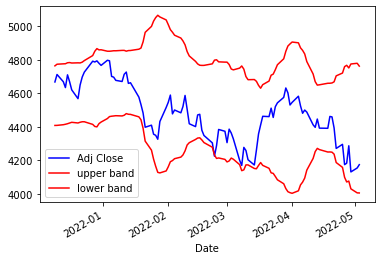

In [249]:
import copy

iilist = []
jjlist = []
narlist = []
srlist = []

#df = yf.download("^GSPC", start="2016-12-31", progress=False)


for ii in range(2, 50):
  for jj in np.arange(0.5, 3, 0.1):
    bajajdf = copy.deepcopy(df)
    bajajdf["20EMA"] = bajajdf["Adj Close"].ewm(span=ii).mean()
    bajajdf["upper band"] = bajajdf["20EMA"] + jj*bajajdf["Adj Close"].rolling(window=20).std()
    bajajdf["lower band"] = bajajdf["20EMA"] - jj*bajajdf["Adj Close"].rolling(window=20).std()
    bajajdf.dropna(inplace=True)
    bajajdf["signal"] = np.where(bajajdf["Adj Close"]>bajajdf["upper band"], 0, 
                                np.where(bajajdf["Adj Close"]<bajajdf["lower band"], 1,
                                          np.nan))

    if (np.isnan(bajajdf["signal"][0])):
      bajajdf["signal"][0] = 0

    bajajdf.signal.fillna(method="ffill", inplace=True)
    bajajdf["signal"] = bajajdf["signal"].shift(1)
    bajajdf.dropna(inplace=True)
    bajajdf["ROC"] = np.log(bajajdf["Adj Close"] / bajajdf["Adj Close"].shift(1))
    bajajdf["Return"] = bajajdf["ROC"]*bajajdf["signal"]
    bajajdf["portfolio"] = np.exp(bajajdf["Return"].cumsum())
    bajajdf.dropna(inplace=True)
    duration_days = bajajdf.index.max()-bajajdf.index.min()
    duration_years = duration_days.days/365.25
    duration_in_trade = duration_years * bajajdf["signal"].mean()

    if (duration_in_trade!=0):
      net_avg_return = bajajdf.iloc[-1]["portfolio"]**(1/duration_in_trade)-1
      returns = bajajdf[bajajdf["Return"]!=0]["Return"]
      sharpe_ratio = (returns.mean()*250 - 0.05)/(returns.std()*np.sqrt(250))

    iilist.append(ii)
    jjlist.append(jj)
    kklist.append(kk)
    narlist.append(net_avg_return)
    srlist.append(sharpe_ratio)

    
    
# net average return based
print(f"n_ema: {iilist[np.argmax(narlist)]}")
print(f"n_sigma: {jjlist[np.argmax(narlist)]:0.2f}")
print(f"nar: {max(narlist)}")

# sharpe ratio return based
print(f"n_ema: {iilist[np.argmax(srlist)]}")
print(f"n_sigma: {jjlist[np.argmax(srlist)]:0.2f}")
print(f"sr: {max(srlist)}")

# resultdf = pd.DataFrame(np.column_stack([iilist, jjlist, narlist, srlist]), columns=["n_ema", "n_sig", "nar", "sr"])
# resultdf[(resultdf["n_ema"]==49) & (resultdf["n_sig"]>2.89) & (resultdf["n_sig"]<2.91) | (resultdf["n_ema"]==11) & (resultdf["n_sig"]>2.69) & (resultdf["n_sig"]<2.71)]
# resultdf[(resultdf["n_ema"]==49) | (resultdf["n_ema"]==11)]

tilist.append("bbands")
bestnarlist.append(max(narlist))
bestsrlist.append(max(srlist))









bajajdf[["Adj Close", "upper band", "lower band"]].tail(100).plot(color=('b','r','r'))








# Relative Strength Index

In [250]:
from ta.momentum import RSIIndicator
import copy

iilist = []
jjlist = []
kklist = []
narlist = []
srlist = []

#df = yf.download("^GSPC", start="2016-12-31", progress=False)


for ii in range(10, 50, 2):
  for jj in range(10, 40, 2):
    for kk in range(60, 90, 2):
      bajajdf = copy.deepcopy(df)
      bajajdf["rsi"] = RSIIndicator(close=bajajdf["Adj Close"], window=ii).rsi()
      bajajdf.dropna(inplace=True)
      bajajdf["signal"] = np.where(bajajdf["rsi"]<jj, 1,
                                  np.where(bajajdf["rsi"]>kk, 0,
                                            np.nan))
      if(np.isnan(bajajdf["signal"][0])):
        bajajdf["signal"][0] = 0

      bajajdf.signal.fillna(method='ffill', inplace=True)
      bajajdf["signal"] = bajajdf["signal"].shift(1)
      bajajdf.dropna(inplace=True)
      bajajdf["ROC"] = np.log(bajajdf["Adj Close"] / bajajdf["Adj Close"].shift(1))
      bajajdf["Return"] = bajajdf["ROC"]*bajajdf["signal"]
      bajajdf["portfolio"] = np.exp(bajajdf["Return"].cumsum())
      bajajdf.dropna(inplace=True)
      duration_days = bajajdf.index.max()-bajajdf.index.min()
      duration_years = duration_days.days/365.25
      duration_in_trade = duration_years * bajajdf["signal"].mean()

      if (duration_in_trade!=0):
        net_avg_return = bajajdf.iloc[-1]["portfolio"]**(1/duration_in_trade)-1
        returns = bajajdf[bajajdf["Return"]!=0]["Return"]
        sharpe_ratio = (returns.mean()*250 - 0.05)/(returns.std()*np.sqrt(250))

      iilist.append(ii)
      jjlist.append(jj)
      kklist.append(kk)
      narlist.append(net_avg_return)
      srlist.append(sharpe_ratio)

    
    
# net average return based
print(f"n_window: {iilist[np.argmax(narlist)]}")
print(f"n_low: {jjlist[np.argmax(narlist)]}")
print(f"n_high: {kklist[np.argmax(narlist)]}")
print(f"nar: {max(narlist)}")

# sharpe ratio based
print(f"n_window: {iilist[np.argmax(srlist)]}")
print(f"n_low: {jjlist[np.argmax(srlist)]}")
print(f"n_high: {kklist[np.argmax(srlist)]}")
print(f"sr: {max(srlist)}")

# resultdf = pd.DataFrame(np.column_stack([iilist, jjlist, kklist, narlist, srlist]), columns=["n_window", "n_low", "n_high", "nar", "sr"])
# resultdf[(resultdf["n_window"]==10) & (resultdf["n_low"]==10) & (resultdf["n_high"]==84)]

tilist.append("rsi")
bestnarlist.append(max(narlist))
bestsrlist.append(max(srlist))









n_window: 22
n_low: 26
n_high: 60
nar: 1.1183758414609208
n_window: 22
n_low: 26
n_high: 60
sr: 2.5549447470307487


In [251]:
comparisondf = pd.DataFrame(np.column_stack([tilist, bestnarlist, bestsrlist]), columns=["Technical Indicator", "Best NAR", "Best SR"])
comparisondf

,Technical Indicator,Best NAR,Best SR
0,sma,0.14651218661988286,0.5054872222598451
1,ema,0.10564380830539344,0.3828293149885534
2,macd,0.14357923144149387,0.6045446268754029
3,bbands,0.32798922651396345,0.8956080931976166
4,rsi,1.1183758414609208,2.5549447470307487


# Indicators for Nifty

In [252]:
tilist, bestnarlist, bestsrlist = [], [], []

# Simple Moving Average

duration in trade: 2.0369
net average return: -0.0853
sharpe ratio: -0.6450
sma1: 160
sma2: 170
nar: 0.16682586496507978
sma1: 170
sma2: 180
sr: 0.6983010019742835


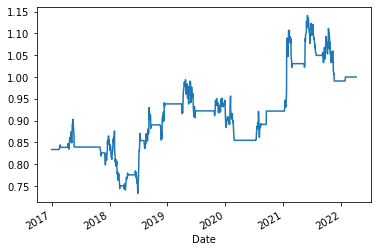

In [253]:
from ta.trend import SMAIndicator
bajajdf = bajajm_df
bajajdf["sma20"] = SMAIndicator(close=bajajdf["Adj Close"], window=20, fillna=True).sma_indicator()
bajajdf["sma50"] = SMAIndicator(close=bajajdf["Adj Close"], window=50, fillna=True).sma_indicator()
bajajdf["signal"] = np.where(bajajdf["sma20"]>bajajdf["sma50"], 1, 0)
bajajdf["signal"] = bajajdf["signal"].shift(1)
bajajdf.dropna(inplace=True)
bajajdf["signal"].describe()






bajajdf["ROC"] = np.log(bajajdf["Adj Close"] / bajajdf["Adj Close"].shift(1))
bajajdf["Return"] = bajajdf["ROC"]*bajajdf["signal"]
bajajdf["portfolio"] = np.exp(bajajdf["Return"].cumsum())
bajajdf.dropna(inplace=True)
bajajdf.tail(3)





bajajdf["portfolio"].plot()







duration_days = bajajdf.index.max()-bajajdf.index.min()
duration_years = duration_days.days/365.25
duration_in_trade = duration_years * bajajdf["signal"].mean()
print(f"duration in trade: {duration_in_trade:.4f}")

net_avg_return = bajajdf.iloc[-1]["portfolio"]**(1/duration_in_trade)-1
print(f"net average return: {net_avg_return:.4f}")

returns = bajajdf[bajajdf["Return"]!=0]["Return"]
sharpe_ratio = (returns.mean()*250 - 0.05)/(returns.std()*np.sqrt(250))
print(f"sharpe ratio: {sharpe_ratio:.4f}")







from ta.trend import SMAIndicator
import copy

iilist = []
jjlist = []
narlist = []
srlist = []

df = yf.download("^NSEI", start="2010-12-31", progress=False)


for ii in range(10, 295, 5):
  for jj in range(ii+5, 300, 5):
    bajajdf = copy.deepcopy(df)
    bajajdf["sma1"] = SMAIndicator(close=bajajdf["Adj Close"], window=ii, fillna=True).sma_indicator()
    bajajdf["sma2"] = SMAIndicator(close=bajajdf["Adj Close"], window=jj, fillna=True).sma_indicator()
    bajajdf["signal"] = np.where(bajajdf["sma1"]>bajajdf["sma2"], 1, 0)
    bajajdf["signal"] = bajajdf["signal"].shift(1)
    bajajdf.dropna(inplace=True)
    bajajdf["ROC"] = np.log(bajajdf["Adj Close"] / bajajdf["Adj Close"].shift(1))
    bajajdf["Return"] = bajajdf["ROC"]*bajajdf["signal"]
    bajajdf["portfolio"] = np.exp(bajajdf["Return"].cumsum())
    bajajdf.dropna(inplace=True)
    duration_days = bajajdf.index.max()-bajajdf.index.min()
    duration_years = duration_days.days/365.25
    duration_in_trade = duration_years * bajajdf["signal"].mean()

    if (duration_in_trade!=0):
      net_avg_return = bajajdf.iloc[-1]["portfolio"]**(1/duration_in_trade)-1
      returns = bajajdf[bajajdf["Return"]!=0]["Return"]
      sharpe_ratio = (returns.mean()*250 - 0.05)/(returns.std()*np.sqrt(250))

    iilist.append(ii)
    jjlist.append(jj)
    narlist.append(net_avg_return)
    srlist.append(sharpe_ratio)

    
    
# net average return based
print(f"sma1: {iilist[np.argmax(narlist)]}")
print(f"sma2: {jjlist[np.argmax(narlist)]}")
print(f"nar: {max(narlist)}")

# sharpe ratio based
print(f"sma1: {iilist[np.argmax(srlist)]}")
print(f"sma2: {jjlist[np.argmax(srlist)]}")
print(f"sr: {max(srlist)}")

# resultdf = pd.DataFrame(np.column_stack([iilist, jjlist, narlist, srlist]), columns=["sma1", "sma2", "nar", "sr"])
# resultdf[(resultdf["sma1"]==10) & (resultdf["sma2"]==20)]

tilist.append("sma")
bestnarlist.append(max(narlist))
bestsrlist.append(max(srlist))










# Exponential Moving Average

In [254]:
from ta.trend import SMAIndicator, EMAIndicator
import copy

iilist = []
jjlist = []
narlist = []
srlist = []

#df = yf.download("^NSEI", start="2010-12-31", progress=False)


for ii in range(10, 295, 5):
  for jj in range(ii+5, 300, 5):
    bajajdf = copy.deepcopy(df)
    bajajdf["sma1"] = EMAIndicator(close=bajajdf["Adj Close"], window=ii, fillna=True).ema_indicator()
    bajajdf["sma2"] = EMAIndicator(close=bajajdf["Adj Close"], window=jj, fillna=True).ema_indicator()
    bajajdf["signal"] = np.where(bajajdf["sma1"]>bajajdf["sma2"], 1, 0)
    bajajdf["signal"] = bajajdf["signal"].shift(1)
    bajajdf.dropna(inplace=True)
    bajajdf["ROC"] = np.log(bajajdf["Adj Close"] / bajajdf["Adj Close"].shift(1))
    bajajdf["Return"] = bajajdf["ROC"]*bajajdf["signal"]
    bajajdf["portfolio"] = np.exp(bajajdf["Return"].cumsum())
    bajajdf.dropna(inplace=True)
    duration_days = bajajdf.index.max()-bajajdf.index.min()
    duration_years = duration_days.days/365.25
    duration_in_trade = duration_years * bajajdf["signal"].mean()

    if (duration_in_trade!=0):
      net_avg_return = bajajdf.iloc[-1]["portfolio"]**(1/duration_in_trade)-1
      returns = bajajdf[bajajdf["Return"]!=0]["Return"]
      sharpe_ratio = (returns.mean()*250 - 0.05)/(returns.std()*np.sqrt(250))

    iilist.append(ii)
    jjlist.append(jj)
    narlist.append(net_avg_return)
    srlist.append(sharpe_ratio)

    
    
# net average return based
print(f"sma1: {iilist[np.argmax(narlist)]}")
print(f"sma2: {jjlist[np.argmax(narlist)]}")
print(f"nar: {max(narlist)}")

# sharpe ratio based
print(f"sma1: {iilist[np.argmax(srlist)]}")
print(f"sma2: {jjlist[np.argmax(srlist)]}")
print(f"sr: {max(srlist)}")

# resultdf = pd.DataFrame(np.column_stack([iilist, jjlist, narlist, srlist]), columns=["sma1", "sma2", "nar", "sr"])
# resultdf[(resultdf["sma1"]==10) & (resultdf["sma2"]==20)]

tilist.append("ema")
bestnarlist.append(max(narlist))
bestsrlist.append(max(srlist))










sma1: 10
sma2: 30
nar: 0.1459644192762275
sma1: 10
sma2: 30
sr: 0.6690828628899


# Moving Average Convergence Divergence

In [255]:
import copy

iilist = []
jjlist = []
kklist = []
narlist = []
srlist = []

#df = yf.download("^NSEI", start="2010-12-31", progress=False)


for ii in range(4, 40, 2):
  for jj in range(ii+8, 80, 2):
    for kk in range(3, 20, 1):
      bajajdf = copy.deepcopy(df)
      bajajdf["macd line"] = bajajdf["Adj Close"].ewm(span=ii).mean() - bajajdf["Adj Close"].ewm(span=jj).mean()
      bajajdf["signal line"] = bajajdf["macd line"].ewm(span=kk).mean()
      bajajdf["signal"] = np.where(bajajdf["macd line"]>=bajajdf["signal line"], 1, 0)
      bajajdf["signal"] = bajajdf["signal"].shift(1)
      bajajdf["ROC"] = np.log(bajajdf["Adj Close"] / bajajdf["Adj Close"].shift(1))
      bajajdf["Return"] = bajajdf["ROC"]*bajajdf["signal"]
      bajajdf["portfolio"] = np.exp(bajajdf["Return"].cumsum())
      bajajdf.dropna(inplace=True)
      duration_days = bajajdf.index.max()-bajajdf.index.min()
      duration_years = duration_days.days/365.25
      duration_in_trade = duration_years * bajajdf["signal"].mean()

      if (duration_in_trade!=0):
        net_avg_return = bajajdf.iloc[-1]["portfolio"]**(1/duration_in_trade)-1
        returns = bajajdf[bajajdf["Return"]!=0]["Return"]
        sharpe_ratio = (returns.mean()*250 - 0.05)/(returns.std()*np.sqrt(250))

      iilist.append(ii)
      jjlist.append(jj)
      kklist.append(kk)
      narlist.append(net_avg_return)
      srlist.append(sharpe_ratio)

    
    
    
# net average return based
print(f"nfast: {iilist[np.argmax(narlist)]}")
print(f"nslow: {jjlist[np.argmax(narlist)]}")
print(f"nsig: {kklist[np.argmax(narlist)]}")
print(f"nar: {max(narlist)}")

# sharpe ratio based
print(f"nfast: {iilist[np.argmax(srlist)]}")
print(f"nslow: {jjlist[np.argmax(srlist)]}")
print(f"nsig: {kklist[np.argmax(srlist)]}")
print(f"sr: {max(srlist)}")

# resultdf = pd.DataFrame(np.column_stack([iilist, jjlist, kklist, narlist, srlist]), columns=["nfast", "nslow", "nsig", "nar", "sr"])
# resultdf[(resultdf["nfast"]==36) & (resultdf["nslow"]==44) & (resultdf["nsig"]==8)]

tilist.append("macd")
bestnarlist.append(max(narlist))
bestsrlist.append(max(srlist))










nfast: 4
nslow: 50
nsig: 3
nar: 0.22945743836559984
nfast: 4
nslow: 50
nsig: 3
sr: 1.030443110446647


# Bollinger Bands

n_ema: 3
n_sigma: 1.20
nar: 0.27306137822556575
n_ema: 3
n_sigma: 1.20
sr: 1.2173628462184376


<AxesSubplot:xlabel='Date'>

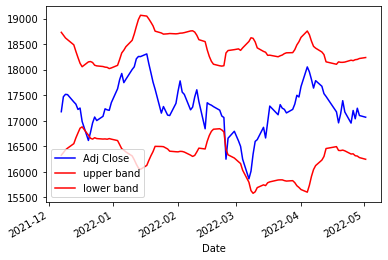

In [256]:
import copy

iilist = []
jjlist = []
narlist = []
srlist = []

#df = yf.download("^NSEI", start="2016-12-31", progress=False)


for ii in range(2, 50):
  for jj in np.arange(0.5, 3, 0.1):
    bajajdf = copy.deepcopy(df)
    bajajdf["20EMA"] = bajajdf["Adj Close"].ewm(span=ii).mean()
    bajajdf["upper band"] = bajajdf["20EMA"] + jj*bajajdf["Adj Close"].rolling(window=20).std()
    bajajdf["lower band"] = bajajdf["20EMA"] - jj*bajajdf["Adj Close"].rolling(window=20).std()
    bajajdf.dropna(inplace=True)
    bajajdf["signal"] = np.where(bajajdf["Adj Close"]>bajajdf["upper band"], 0, 
                                np.where(bajajdf["Adj Close"]<bajajdf["lower band"], 1,
                                          np.nan))

    if (np.isnan(bajajdf["signal"][0])):
      bajajdf["signal"][0] = 0

    bajajdf.signal.fillna(method="ffill", inplace=True)
    bajajdf["signal"] = bajajdf["signal"].shift(1)
    bajajdf.dropna(inplace=True)
    bajajdf["ROC"] = np.log(bajajdf["Adj Close"] / bajajdf["Adj Close"].shift(1))
    bajajdf["Return"] = bajajdf["ROC"]*bajajdf["signal"]
    bajajdf["portfolio"] = np.exp(bajajdf["Return"].cumsum())
    bajajdf.dropna(inplace=True)
    duration_days = bajajdf.index.max()-bajajdf.index.min()
    duration_years = duration_days.days/365.25
    duration_in_trade = duration_years * bajajdf["signal"].mean()

    if (duration_in_trade!=0):
      net_avg_return = bajajdf.iloc[-1]["portfolio"]**(1/duration_in_trade)-1
      returns = bajajdf[bajajdf["Return"]!=0]["Return"]
      sharpe_ratio = (returns.mean()*250 - 0.05)/(returns.std()*np.sqrt(250))

    iilist.append(ii)
    jjlist.append(jj)
    kklist.append(kk)
    narlist.append(net_avg_return)
    srlist.append(sharpe_ratio)

    
    
# net average return based
print(f"n_ema: {iilist[np.argmax(narlist)]}")
print(f"n_sigma: {jjlist[np.argmax(narlist)]:0.2f}")
print(f"nar: {max(narlist)}")

# sharpe ratio return based
print(f"n_ema: {iilist[np.argmax(srlist)]}")
print(f"n_sigma: {jjlist[np.argmax(srlist)]:0.2f}")
print(f"sr: {max(srlist)}")

# resultdf = pd.DataFrame(np.column_stack([iilist, jjlist, narlist, srlist]), columns=["n_ema", "n_sig", "nar", "sr"])
# resultdf[(resultdf["n_ema"]==49) & (resultdf["n_sig"]>2.89) & (resultdf["n_sig"]<2.91) | (resultdf["n_ema"]==11) & (resultdf["n_sig"]>2.69) & (resultdf["n_sig"]<2.71)]
# resultdf[(resultdf["n_ema"]==49) | (resultdf["n_ema"]==11)]

tilist.append("bbands")
bestnarlist.append(max(narlist))
bestsrlist.append(max(srlist))









bajajdf[["Adj Close", "upper band", "lower band"]].tail(100).plot(color=('b','r','r'))








# Relative Strength Index

In [257]:
from ta.momentum import RSIIndicator
import copy

iilist = []
jjlist = []
kklist = []
narlist = []
srlist = []

#df = yf.download("^NSEI", start="2016-12-31", progress=False)


for ii in range(10, 50, 2):
  for jj in range(10, 40, 2):
    for kk in range(60, 90, 2):
      bajajdf = copy.deepcopy(df)
      bajajdf["rsi"] = RSIIndicator(close=bajajdf["Adj Close"], window=ii).rsi()
      bajajdf.dropna(inplace=True)
      bajajdf["signal"] = np.where(bajajdf["rsi"]<jj, 1,
                                  np.where(bajajdf["rsi"]>kk, 0,
                                            np.nan))
      if(np.isnan(bajajdf["signal"][0])):
        bajajdf["signal"][0] = 0

      bajajdf.signal.fillna(method='ffill', inplace=True)
      bajajdf["signal"] = bajajdf["signal"].shift(1)
      bajajdf.dropna(inplace=True)
      bajajdf["ROC"] = np.log(bajajdf["Adj Close"] / bajajdf["Adj Close"].shift(1))
      bajajdf["Return"] = bajajdf["ROC"]*bajajdf["signal"]
      bajajdf["portfolio"] = np.exp(bajajdf["Return"].cumsum())
      bajajdf.dropna(inplace=True)
      duration_days = bajajdf.index.max()-bajajdf.index.min()
      duration_years = duration_days.days/365.25
      duration_in_trade = duration_years * bajajdf["signal"].mean()

      if (duration_in_trade!=0):
        net_avg_return = bajajdf.iloc[-1]["portfolio"]**(1/duration_in_trade)-1
        returns = bajajdf[bajajdf["Return"]!=0]["Return"]
        sharpe_ratio = (returns.mean()*250 - 0.05)/(returns.std()*np.sqrt(250))

      iilist.append(ii)
      jjlist.append(jj)
      kklist.append(kk)
      narlist.append(net_avg_return)
      srlist.append(sharpe_ratio)

    
    
# net average return based
print(f"n_window: {iilist[np.argmax(narlist)]}")
print(f"n_low: {jjlist[np.argmax(narlist)]}")
print(f"n_high: {kklist[np.argmax(narlist)]}")
print(f"nar: {max(narlist)}")

# sharpe ratio based
print(f"n_window: {iilist[np.argmax(srlist)]}")
print(f"n_low: {jjlist[np.argmax(srlist)]}")
print(f"n_high: {kklist[np.argmax(srlist)]}")
print(f"sr: {max(srlist)}")

# resultdf = pd.DataFrame(np.column_stack([iilist, jjlist, kklist, narlist, srlist]), columns=["n_window", "n_low", "n_high", "nar", "sr"])
# resultdf[(resultdf["n_window"]==10) & (resultdf["n_low"]==10) & (resultdf["n_high"]==84)]

tilist.append("rsi")
bestnarlist.append(max(narlist))
bestsrlist.append(max(srlist))









n_window: 22
n_low: 18
n_high: 60
nar: 1.5451447531307179
n_window: 32
n_low: 22
n_high: 74
sr: 2.1839324966872256


In [258]:
comparisondf = pd.DataFrame(np.column_stack([tilist, bestnarlist, bestsrlist]), columns=["Technical Indicator", "Best NAR", "Best SR"])
comparisondf

,Technical Indicator,Best NAR,Best SR
0,sma,0.16682586496507978,0.6983010019742835
1,ema,0.1459644192762275,0.6690828628899
2,macd,0.22945743836559984,1.030443110446647
3,bbands,0.27306137822556575,1.2173628462184376
4,rsi,1.5451447531307179,2.1839324966872256


# Indicators for Bajaj Motors

In [259]:
tilist, bestnarlist, bestsrlist = [], [], []

# Simple Moving Average

In [260]:
from ta.trend import SMAIndicator
bajajdf = bajajm_df
bajajdf["sma20"] = SMAIndicator(close=bajajdf["Adj Close"], window=20, fillna=True).sma_indicator()
bajajdf["sma50"] = SMAIndicator(close=bajajdf["Adj Close"], window=50, fillna=True).sma_indicator()
bajajdf["signal"] = np.where(bajajdf["sma20"]>bajajdf["sma50"], 1, 0)
bajajdf["signal"] = bajajdf["signal"].shift(1)
bajajdf.dropna(inplace=True)
bajajdf["signal"].describe()

count    1299.000000
mean        0.392610
std         0.488519
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: signal, dtype: float64

In [261]:
bajajdf["ROC"] = np.log(bajajdf["Adj Close"] / bajajdf["Adj Close"].shift(1))
bajajdf["Return"] = bajajdf["ROC"]*bajajdf["signal"]
bajajdf["portfolio"] = np.exp(bajajdf["Return"].cumsum())
bajajdf.dropna(inplace=True)
bajajdf.tail(3)

,Open,High,Low,Close,Adj Close,Volume,Return,sma20,sma50,signal,ROC,portfolio
Date,,,,,,,,,,,,
2017-01-04,2625.199951,2698.550049,2615.949951,2684.100098,2332.380127,343922,-0.0,2390.139807,2426.935991,0.0,-0.014517,0.814213
2017-01-03,2594.000000,2632.199951,2561.449951,2619.199951,2275.984375,420196,-0.0,2379.931702,2421.838662,0.0,-0.024477,0.814213
2017-01-02,2642.699951,2654.300049,2552.000000,2598.500000,2257.996826,323342,-0.0,2369.723572,2415.966221,0.0,-0.007935,0.814213


<AxesSubplot:xlabel='Date'>

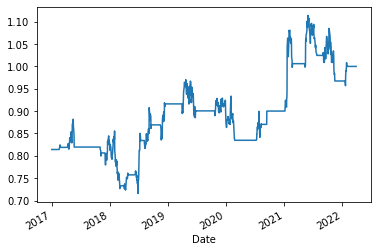

In [262]:
bajajdf["portfolio"].plot()

In [263]:
duration_days = bajajdf.index.max()-bajajdf.index.min()
duration_years = duration_days.days/365.25
duration_in_trade = duration_years * bajajdf["signal"].mean()
print(f"duration in trade: {duration_in_trade:.4f}")

net_avg_return = bajajdf.iloc[-1]["portfolio"]**(1/duration_in_trade)-1
print(f"net average return: {net_avg_return:.4f}")

returns = bajajdf[bajajdf["Return"]!=0]["Return"]
sharpe_ratio = (returns.mean()*250 - 0.05)/(returns.std()*np.sqrt(250))
print(f"sharpe ratio: {sharpe_ratio:.4f}")

duration in trade: 2.0600
net average return: -0.0950
sharpe ratio: -0.6939


In [264]:
from ta.trend import SMAIndicator
import copy

iilist = []
jjlist = []
narlist = []
srlist = []

df = yf.download("BAJAJFINSV.NS", start="2010-12-31", progress=False)


for ii in range(10, 295, 5):
  for jj in range(ii+5, 300, 5):
    bajajdf = copy.deepcopy(df)
    bajajdf["sma1"] = SMAIndicator(close=bajajdf["Adj Close"], window=ii, fillna=True).sma_indicator()
    bajajdf["sma2"] = SMAIndicator(close=bajajdf["Adj Close"], window=jj, fillna=True).sma_indicator()
    bajajdf["signal"] = np.where(bajajdf["sma1"]>bajajdf["sma2"], 1, 0)
    bajajdf["signal"] = bajajdf["signal"].shift(1)
    bajajdf.dropna(inplace=True)
    bajajdf["ROC"] = np.log(bajajdf["Adj Close"] / bajajdf["Adj Close"].shift(1))
    bajajdf["Return"] = bajajdf["ROC"]*bajajdf["signal"]
    bajajdf["portfolio"] = np.exp(bajajdf["Return"].cumsum())
    bajajdf.dropna(inplace=True)
    duration_days = bajajdf.index.max()-bajajdf.index.min()
    duration_years = duration_days.days/365.25
    duration_in_trade = duration_years * bajajdf["signal"].mean()

    if (duration_in_trade!=0):
      net_avg_return = bajajdf.iloc[-1]["portfolio"]**(1/duration_in_trade)-1
      returns = bajajdf[bajajdf["Return"]!=0]["Return"]
      sharpe_ratio = (returns.mean()*250 - 0.05)/(returns.std()*np.sqrt(250))

    iilist.append(ii)
    jjlist.append(jj)
    narlist.append(net_avg_return)
    srlist.append(sharpe_ratio)


In [265]:
# net average return based
print(f"sma1: {iilist[np.argmax(narlist)]}")
print(f"sma2: {jjlist[np.argmax(narlist)]}")
print(f"nar: {max(narlist)}")

# sharpe ratio based
print(f"sma1: {iilist[np.argmax(srlist)]}")
print(f"sma2: {jjlist[np.argmax(srlist)]}")
print(f"sr: {max(srlist)}")

# resultdf = pd.DataFrame(np.column_stack([iilist, jjlist, narlist, srlist]), columns=["sma1", "sma2", "nar", "sr"])
# resultdf[(resultdf["sma1"]==10) & (resultdf["sma2"]==20)]

tilist.append("sma")
bestnarlist.append(max(narlist))
bestsrlist.append(max(srlist))

sma1: 35
sma2: 40
nar: 0.6742823379677836
sma1: 30
sma2: 40
sr: 1.4961644266910694


# Exponential Moving Average

In [266]:
from ta.trend import SMAIndicator, EMAIndicator
import copy

iilist = []
jjlist = []
narlist = []
srlist = []

#df = yf.download("BAJAJFINSV.NS", start="2010-12-31", progress=False)


for ii in range(10, 295, 5):
  for jj in range(ii+5, 300, 5):
    bajajdf = copy.deepcopy(df)
    bajajdf["sma1"] = EMAIndicator(close=bajajdf["Adj Close"], window=ii, fillna=True).ema_indicator()
    bajajdf["sma2"] = EMAIndicator(close=bajajdf["Adj Close"], window=jj, fillna=True).ema_indicator()
    bajajdf["signal"] = np.where(bajajdf["sma1"]>bajajdf["sma2"], 1, 0)
    bajajdf["signal"] = bajajdf["signal"].shift(1)
    bajajdf.dropna(inplace=True)
    bajajdf["ROC"] = np.log(bajajdf["Adj Close"] / bajajdf["Adj Close"].shift(1))
    bajajdf["Return"] = bajajdf["ROC"]*bajajdf["signal"]
    bajajdf["portfolio"] = np.exp(bajajdf["Return"].cumsum())
    bajajdf.dropna(inplace=True)
    duration_days = bajajdf.index.max()-bajajdf.index.min()
    duration_years = duration_days.days/365.25
    duration_in_trade = duration_years * bajajdf["signal"].mean()

    if (duration_in_trade!=0):
      net_avg_return = bajajdf.iloc[-1]["portfolio"]**(1/duration_in_trade)-1
      returns = bajajdf[bajajdf["Return"]!=0]["Return"]
      sharpe_ratio = (returns.mean()*250 - 0.05)/(returns.std()*np.sqrt(250))

    iilist.append(ii)
    jjlist.append(jj)
    narlist.append(net_avg_return)
    srlist.append(sharpe_ratio)

In [267]:
# net average return based
print(f"sma1: {iilist[np.argmax(narlist)]}")
print(f"sma2: {jjlist[np.argmax(narlist)]}")
print(f"nar: {max(narlist)}")

# sharpe ratio based
print(f"sma1: {iilist[np.argmax(srlist)]}")
print(f"sma2: {jjlist[np.argmax(srlist)]}")
print(f"sr: {max(srlist)}")

# resultdf = pd.DataFrame(np.column_stack([iilist, jjlist, narlist, srlist]), columns=["sma1", "sma2", "nar", "sr"])
# resultdf[(resultdf["sma1"]==10) & (resultdf["sma2"]==20)]

tilist.append("ema")
bestnarlist.append(max(narlist))
bestsrlist.append(max(srlist))

sma1: 10
sma2: 20
nar: 0.5946800369823044
sma1: 10
sma2: 20
sr: 1.2914045548206434


# Moving Average Convergence Divergence

In [268]:
import copy

iilist = []
jjlist = []
kklist = []
narlist = []
srlist = []

#df = yf.download("BAJAJFINSV.NS", start="2010-12-31", progress=False)


for ii in range(4, 40, 2):
  for jj in range(ii+8, 80, 2):
    for kk in range(3, 20, 1):
      bajajdf = copy.deepcopy(df)
      bajajdf["macd line"] = bajajdf["Adj Close"].ewm(span=ii).mean() - bajajdf["Adj Close"].ewm(span=jj).mean()
      bajajdf["signal line"] = bajajdf["macd line"].ewm(span=kk).mean()
      bajajdf["signal"] = np.where(bajajdf["macd line"]>=bajajdf["signal line"], 1, 0)
      bajajdf["signal"] = bajajdf["signal"].shift(1)
      bajajdf["ROC"] = np.log(bajajdf["Adj Close"] / bajajdf["Adj Close"].shift(1))
      bajajdf["Return"] = bajajdf["ROC"]*bajajdf["signal"]
      bajajdf["portfolio"] = np.exp(bajajdf["Return"].cumsum())
      bajajdf.dropna(inplace=True)
      duration_days = bajajdf.index.max()-bajajdf.index.min()
      duration_years = duration_days.days/365.25
      duration_in_trade = duration_years * bajajdf["signal"].mean()

      if (duration_in_trade!=0):
        net_avg_return = bajajdf.iloc[-1]["portfolio"]**(1/duration_in_trade)-1
        returns = bajajdf[bajajdf["Return"]!=0]["Return"]
        sharpe_ratio = (returns.mean()*250 - 0.05)/(returns.std()*np.sqrt(250))

      iilist.append(ii)
      jjlist.append(jj)
      kklist.append(kk)
      narlist.append(net_avg_return)
      srlist.append(sharpe_ratio)

In [269]:
# net average return based
print(f"nfast: {iilist[np.argmax(narlist)]}")
print(f"nslow: {jjlist[np.argmax(narlist)]}")
print(f"nsig: {kklist[np.argmax(narlist)]}")
print(f"nar: {max(narlist)}")

# sharpe ratio based
print(f"nfast: {iilist[np.argmax(srlist)]}")
print(f"nslow: {jjlist[np.argmax(srlist)]}")
print(f"nsig: {kklist[np.argmax(srlist)]}")
print(f"sr: {max(srlist)}")

# resultdf = pd.DataFrame(np.column_stack([iilist, jjlist, kklist, narlist, srlist]), columns=["nfast", "nslow", "nsig", "nar", "sr"])
# resultdf[(resultdf["nfast"]==36) & (resultdf["nslow"]==44) & (resultdf["nsig"]==8)]

tilist.append("macd")
bestnarlist.append(max(narlist))
bestsrlist.append(max(srlist))

nfast: 36
nslow: 44
nsig: 8
nar: 0.8091387970836463
nfast: 34
nslow: 72
nsig: 3
sr: 1.641921396341961


# Bollinger Bands

In [270]:
import copy

iilist = []
jjlist = []
narlist = []
srlist = []

#df = yf.download("BAJAJFINSV.NS", start="2016-12-31", progress=False)


for ii in range(2, 50):
  for jj in np.arange(0.5, 3, 0.1):
    bajajdf = copy.deepcopy(df)
    bajajdf["20EMA"] = bajajdf["Adj Close"].ewm(span=ii).mean()
    bajajdf["upper band"] = bajajdf["20EMA"] + jj*bajajdf["Adj Close"].rolling(window=20).std()
    bajajdf["lower band"] = bajajdf["20EMA"] - jj*bajajdf["Adj Close"].rolling(window=20).std()
    bajajdf.dropna(inplace=True)
    bajajdf["signal"] = np.where(bajajdf["Adj Close"]>bajajdf["upper band"], 0, 
                                np.where(bajajdf["Adj Close"]<bajajdf["lower band"], 1,
                                          np.nan))

    if (np.isnan(bajajdf["signal"][0])):
      bajajdf["signal"][0] = 0

    bajajdf.signal.fillna(method="ffill", inplace=True)
    bajajdf["signal"] = bajajdf["signal"].shift(1)
    bajajdf.dropna(inplace=True)
    bajajdf["ROC"] = np.log(bajajdf["Adj Close"] / bajajdf["Adj Close"].shift(1))
    bajajdf["Return"] = bajajdf["ROC"]*bajajdf["signal"]
    bajajdf["portfolio"] = np.exp(bajajdf["Return"].cumsum())
    bajajdf.dropna(inplace=True)
    duration_days = bajajdf.index.max()-bajajdf.index.min()
    duration_years = duration_days.days/365.25
    duration_in_trade = duration_years * bajajdf["signal"].mean()

    if (duration_in_trade!=0):
      net_avg_return = bajajdf.iloc[-1]["portfolio"]**(1/duration_in_trade)-1
      returns = bajajdf[bajajdf["Return"]!=0]["Return"]
      sharpe_ratio = (returns.mean()*250 - 0.05)/(returns.std()*np.sqrt(250))

    iilist.append(ii)
    jjlist.append(jj)
    kklist.append(kk)
    narlist.append(net_avg_return)
    srlist.append(sharpe_ratio)

In [271]:
# net average return based
print(f"n_ema: {iilist[np.argmax(narlist)]}")
print(f"n_sigma: {jjlist[np.argmax(narlist)]:0.2f}")
print(f"nar: {max(narlist)}")

# sharpe ratio return based
print(f"n_ema: {iilist[np.argmax(srlist)]}")
print(f"n_sigma: {jjlist[np.argmax(srlist)]:0.2f}")
print(f"sr: {max(srlist)}")

# resultdf = pd.DataFrame(np.column_stack([iilist, jjlist, narlist, srlist]), columns=["n_ema", "n_sig", "nar", "sr"])
# resultdf[(resultdf["n_ema"]==49) & (resultdf["n_sig"]>2.89) & (resultdf["n_sig"]<2.91) | (resultdf["n_ema"]==11) & (resultdf["n_sig"]>2.69) & (resultdf["n_sig"]<2.71)]
# resultdf[(resultdf["n_ema"]==49) | (resultdf["n_ema"]==11)]

tilist.append("bbands")
bestnarlist.append(max(narlist))
bestsrlist.append(max(srlist))

n_ema: 11
n_sigma: 2.70
nar: 1.1007218737050941
n_ema: 11
n_sigma: 2.70
sr: 2.124203100305224


<AxesSubplot:xlabel='Date'>

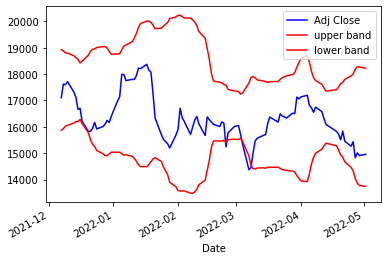

In [272]:
bajajdf[["Adj Close", "upper band", "lower band"]].tail(100).plot(color=('b','r','r'))

# Relative Strength Index

In [273]:
from ta.momentum import RSIIndicator
import copy

iilist = []
jjlist = []
kklist = []
narlist = []
srlist = []

#df = yf.download("BAJAJFINSV.NS", start="2016-12-31", progress=False)


for ii in range(10, 50, 2):
  for jj in range(10, 40, 2):
    for kk in range(60, 90, 2):
      bajajdf = copy.deepcopy(df)
      bajajdf["rsi"] = RSIIndicator(close=bajajdf["Adj Close"], window=ii).rsi()
      bajajdf.dropna(inplace=True)
      bajajdf["signal"] = np.where(bajajdf["rsi"]<jj, 1,
                                  np.where(bajajdf["rsi"]>kk, 0,
                                            np.nan))
      if(np.isnan(bajajdf["signal"][0])):
        bajajdf["signal"][0] = 0

      bajajdf.signal.fillna(method='ffill', inplace=True)
      bajajdf["signal"] = bajajdf["signal"].shift(1)
      bajajdf.dropna(inplace=True)
      bajajdf["ROC"] = np.log(bajajdf["Adj Close"] / bajajdf["Adj Close"].shift(1))
      bajajdf["Return"] = bajajdf["ROC"]*bajajdf["signal"]
      bajajdf["portfolio"] = np.exp(bajajdf["Return"].cumsum())
      bajajdf.dropna(inplace=True)
      duration_days = bajajdf.index.max()-bajajdf.index.min()
      duration_years = duration_days.days/365.25
      duration_in_trade = duration_years * bajajdf["signal"].mean()

      if (duration_in_trade!=0):
        net_avg_return = bajajdf.iloc[-1]["portfolio"]**(1/duration_in_trade)-1
        returns = bajajdf[bajajdf["Return"]!=0]["Return"]
        sharpe_ratio = (returns.mean()*250 - 0.05)/(returns.std()*np.sqrt(250))

      iilist.append(ii)
      jjlist.append(jj)
      kklist.append(kk)
      narlist.append(net_avg_return)
      srlist.append(sharpe_ratio)

In [274]:
# net average return based
print(f"n_window: {iilist[np.argmax(narlist)]}")
print(f"n_low: {jjlist[np.argmax(narlist)]}")
print(f"n_high: {kklist[np.argmax(narlist)]}")
print(f"nar: {max(narlist)}")

# sharpe ratio based
print(f"n_window: {iilist[np.argmax(srlist)]}")
print(f"n_low: {jjlist[np.argmax(srlist)]}")
print(f"n_high: {kklist[np.argmax(srlist)]}")
print(f"sr: {max(srlist)}")

# resultdf = pd.DataFrame(np.column_stack([iilist, jjlist, kklist, narlist, srlist]), columns=["n_window", "n_low", "n_high", "nar", "sr"])
# resultdf[(resultdf["n_window"]==10) & (resultdf["n_low"]==10) & (resultdf["n_high"]==84)]

tilist.append("rsi")
bestnarlist.append(max(narlist))
bestsrlist.append(max(srlist))

n_window: 10
n_low: 10
n_high: 84
nar: 5.717581450700281
n_window: 10
n_low: 10
n_high: 84
sr: 3.1661522359942307


In [275]:
comparisondf = pd.DataFrame(np.column_stack([tilist, bestnarlist, bestsrlist]), columns=["Technical Indicator", "Best NAR", "Best SR"])
comparisondf

,Technical Indicator,Best NAR,Best SR
0,sma,0.6742823379677836,1.4961644266910694
1,ema,0.5946800369823044,1.2914045548206434
2,macd,0.8091387970836463,1.641921396341961
3,bbands,1.1007218737050941,2.124203100305224
4,rsi,5.717581450700281,3.1661522359942307


# Thank you